In [1]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import scipy.stats as stats
from scipy.stats import pointbiserialr
from scipy.stats import chi2_contingency
#wrapper methods
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV


from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score


from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#scaler methods
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# embedded methods
from sklearn.linear_model import LassoCV

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier

# Importing the datasets

In [2]:
sample_submission = pd.read_csv('https://raw.githubusercontent.com/Sebastiao199/Project_Group18_ML/main/sample_submission.csv')
sample_submission.head()

,encounter_id,readmitted_binary
0,499502,No
1,447319,No
2,309126,Yes
3,181183,Yes
4,359339,No


In [3]:
test = pd.read_csv('https://raw.githubusercontent.com/Sebastiao199/Project_Group18_ML/main/test.csv', na_values=['?', ''], index_col='encounter_id')
test.head()

,country,patient_id,race,gender,age,weight,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,...,number_of_medications,primary_diagnosis,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication
encounter_id,,,,,,,,,,,,,,,,,,,,,
499502,USA,103232799,Caucasian,Male,[80-90),NaN,HM,0,0,0,...,14,491,414,250,6,NaN,NaN,No,Yes,['metformin']
447319,USA,93395304,Caucasian,Male,[20-30),NaN,HM,0,0,1,...,7,250.13,70,794,7,>300,NaN,No,No,[]
309126,USA,6281586,AfricanAmerican,Male,[30-40),NaN,NaN,0,0,0,...,12,786,250.6,536,6,NaN,NaN,No,Yes,['insulin']
181183,USA,67381308,Caucasian,Male,[50-60),NaN,BC,0,0,0,...,16,820,873,E884,9,NaN,NaN,Ch,Yes,"['metformin', 'glyburide', 'insulin']"
359339,USA,71670204,Caucasian,Male,[60-70),NaN,NaN,0,0,0,...,10,599,427,414,9,NaN,NaN,No,Yes,['metformin']


In [4]:
train = pd.read_csv('https://raw.githubusercontent.com/Sebastiao199/Project_Group18_ML/main/train.csv', na_values=['?', ''], index_col='encounter_id')
train.head()

,country,patient_id,race,gender,age,weight,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,...,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication,readmitted_binary,readmitted_multiclass
encounter_id,,,,,,,,,,,,,,,,,,,,,
533253,USA,70110,Caucasian,Female,[70-80),NaN,NaN,0,0,2,...,276,466,8,NaN,NaN,No,No,[],No,>30 days
426224,USA,29775006,AfricanAmerican,Male,[50-60),NaN,NaN,0,0,0,...,785,162,9,NaN,NaN,No,Yes,['insulin'],No,No
634063,USA,80729253,Caucasian,Female,[60-70),NaN,NaN,0,0,1,...,135,250,6,NaN,NaN,Ch,Yes,"['glimepiride', 'insulin']",No,No
890610,USA,2919042,AfricanAmerican,Male,[60-70),NaN,MC,0,0,1,...,562,455,5,NaN,NaN,No,No,[],No,No
654194,USA,84871971,Caucasian,Female,[70-80),NaN,HM,1,0,0,...,599,428,9,NaN,NaN,No,No,[],No,>30 days


In [5]:
train.drop(['country','weight'], axis=1, inplace=True)

In [6]:
train.isna().sum()

patient_id                                   0
race                                      5070
gender                                       0
age                                       3557
payer_code                               28201
outpatient_visits_in_previous_year           0
emergency_visits_in_previous_year            0
inpatient_visits_in_previous_year            0
admission_type                            3706
medical_specialty                        34922
average_pulse_bpm                            0
discharge_disposition                     2590
admission_source                          4718
length_of_stay_in_hospital                   0
number_lab_tests                             0
non_lab_procedures                           0
number_of_medications                        0
primary_diagnosis                           16
secondary_diagnosis                        262
additional_diagnosis                      1008
number_diagnoses                             0
glucose_test_

In [7]:
train['race'].fillna('Unknown', inplace=True)
train['medical_specialty'].fillna('Unknown', inplace=True)
train['admission_source'].fillna('Unknown', inplace=True)
train['payer_code'].fillna('None', inplace=True)
train['glucose_test_result'].fillna('None', inplace=True)
train['a1c_test_result'].fillna('None', inplace=True)
train['admission_type'].fillna('Unknown', inplace=True)
train['age'].fillna('Unknown', inplace=True)
train['discharge_disposition'].fillna('Unknown', inplace=True)
train['primary_diagnosis'].fillna('Unknown', inplace=True)
train['secondary_diagnosis'].fillna('Unknown', inplace=True)
train['additional_diagnosis'].fillna('Unknown', inplace=True)

In [8]:
train.isna().sum()

patient_id                               0
race                                     0
gender                                   0
age                                      0
payer_code                               0
outpatient_visits_in_previous_year       0
emergency_visits_in_previous_year        0
inpatient_visits_in_previous_year        0
admission_type                           0
medical_specialty                        0
average_pulse_bpm                        0
discharge_disposition                    0
admission_source                         0
length_of_stay_in_hospital               0
number_lab_tests                         0
non_lab_procedures                       0
number_of_medications                    0
primary_diagnosis                        0
secondary_diagnosis                      0
additional_diagnosis                     0
number_diagnoses                         0
glucose_test_result                      0
a1c_test_result                          0
change_in_m

In [9]:
new_column_names = {'outpatient_visits_in_previous_year': 'outpatient_visits', 
                    'emergency_visits_in_previous_year': 'emergency_visits',
                    'inpatient_visits_in_previous_year': 'inpatient_visits',
                    'change_in_meds_during_hospitalization': 'change_in_meds',
                    'length_of_stay_in_hospital': 'length_of_stay',
                    'prescribed_diabetes_meds': 'diabetes_meds'
                   }
train = train.rename(columns=new_column_names)

In [10]:
train['length_of_stay']

encounter_id
533253     2
426224    14
634063     6
890610     6
654194     6
          ..
660160     7
826429     9
332030     5
757560     2
459757     5
Name: length_of_stay, Length: 71236, dtype: int64

In [11]:
def bar_charts_categorical(df, feature, target):
    cont_tab = pd.crosstab(df[feature], df[target], margins=True)
    categories = cont_tab.index[:-1]
    fig = plt.figure(figsize=(50, 10))
    # auxiliary data for 122
    obs_pct = np.array([np.divide(cont_tab.iloc[:-1, 0].values, cont_tab.iloc[:-1, 2].values), 
                        np.divide(cont_tab.iloc[:-1, 1].values, cont_tab.iloc[:-1, 2].values)])
    plt.subplot(122)
    p1 = plt.bar(categories, obs_pct[0], 0.55, color="gray")
    p2 = plt.bar(categories, obs_pct[1], 0.55, bottom=obs_pct[0], color="yellowgreen")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Proportion bar chart")
    plt.xlabel(feature)
    plt.ylabel("$p$")
 
    #Rotacionar os rótulos do eixo x
    plt.xticks(rotation=45, ha="right")
 
    plt.show()

In [12]:
train['race'].value_counts()

race
Caucasian          50693
AfricanAmerican    12693
Unknown             5070
Hispanic            1364
Other                995
Asian                421
Name: count, dtype: int64

In [13]:
len(train[train['race']== '94306932'])

0

In [14]:
unknown = train[train['race']== 'Unknown']['patient_id'].unique()
train[train['patient_id'].isin(unknown)]

,patient_id,race,gender,age,payer_code,outpatient_visits,emergency_visits,inpatient_visits,admission_type,medical_specialty,...,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds,diabetes_meds,medication,readmitted_binary,readmitted_multiclass
encounter_id,,,,,,,,,,,,,,,,,,,,,
727104,94306932,Caucasian,Male,[70-80),SP,0,0,0,Urgent,Hematology,...,157,197,9,None,None,No,No,[],No,>30 days
992230,57344247,Unknown,Male,[80-90),MC,0,0,0,Elective,Orthopedics,...,715,250,8,None,None,Ch,Yes,['insulin'],No,No
353655,28219392,Unknown,Female,[60-70),MC,1,0,0,Urgent,InternalMedicine,...,E935,197,9,None,None,No,Yes,['glyburide'],No,No
911403,88363836,Unknown,Female,[60-70),MC,0,0,0,Emergency,Unknown,...,414,401,9,None,>8,No,No,[],No,No
811707,23388138,Caucasian,Female,[70-80),None,1,1,0,Not Available,Family/GeneralPractice,...,473,250.4,5,Norm,None,Ch,Yes,['insulin'],No,>30 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631812,23213772,Unknown,Female,[70-80),MC,0,0,1,Elective,InternalMedicine,...,357,787,7,None,None,Ch,Yes,"['metformin', 'glimepiride']",No,No
714110,38516562,Unknown,Male,[80-90),MC,0,0,0,Emergency,Unknown,...,496,250,5,None,None,No,No,[],No,>30 days
398947,59167503,Unknown,Female,[60-70),MC,0,0,0,Emergency,Unknown,...,403,250,9,None,None,Ch,Yes,['insulin'],No,No


In [15]:
train[train['patient_id']== 23904909]

,patient_id,race,gender,age,payer_code,outpatient_visits,emergency_visits,inpatient_visits,admission_type,medical_specialty,...,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds,diabetes_meds,medication,readmitted_binary,readmitted_multiclass
encounter_id,,,,,,,,,,,,,,,,,,,,,
282627,23904909,Unknown,Female,[80-90),None,0,0,2,Not Available,Family/GeneralPractice,...,599,413,7,>200,None,Ch,Yes,['insulin'],No,No
537873,23904909,Caucasian,Female,[80-90),None,0,0,1,Not Available,InternalMedicine,...,599,250,8,>200,None,Ch,Yes,['insulin'],No,>30 days


In [16]:
unknown = train[train['race']== 'Unknown']['patient_id'].unique()

known_race = train[train['patient_id'].isin(unknown) & train['race']!= 'Unknown']

In [17]:
def fill_race(df):
    for i, row in df.iterrows():
        if row['race'] == 'Unknown':
            # Check if there are any other rows with the same 'person_id' and 'race' not equal to 'Unknown'
            other_rows = df[(df['patient_id'] == row['patient_id']) & (df['race'] != 'Unknown')]
            if not other_rows.empty:
                # If such a row is found, replace the 'race' of the current row with the 'race' of the found row
                df.at[i, 'race'] = other_rows.iloc[0]['race']
    return df

fill_race(train)

,patient_id,race,gender,age,payer_code,outpatient_visits,emergency_visits,inpatient_visits,admission_type,medical_specialty,...,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds,diabetes_meds,medication,readmitted_binary,readmitted_multiclass
encounter_id,,,,,,,,,,,,,,,,,,,,,
533253,70110,Caucasian,Female,[70-80),None,0,0,2,Emergency,Family/GeneralPractice,...,276,466,8,None,None,No,No,[],No,>30 days
426224,29775006,AfricanAmerican,Male,[50-60),None,0,0,0,Emergency,Unknown,...,785,162,9,None,None,No,Yes,['insulin'],No,No
634063,80729253,Caucasian,Female,[60-70),None,0,0,1,Unknown,Family/GeneralPractice,...,135,250,6,None,None,Ch,Yes,"['glimepiride', 'insulin']",No,No
890610,2919042,AfricanAmerican,Male,[60-70),MC,0,0,1,Emergency,InternalMedicine,...,562,455,5,None,None,No,No,[],No,No
654194,84871971,Caucasian,Female,[70-80),HM,1,0,0,Elective,Unknown,...,599,428,9,None,None,No,No,[],No,>30 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660160,24531381,AfricanAmerican,Female,[80-90),MC,0,1,0,Elective,InternalMedicine,...,786,250,9,None,>7,Ch,Yes,"['metformin', 'glyburide', 'insulin']",No,No
826429,4663818,AfricanAmerican,Female,[70-80),None,0,0,0,Urgent,Unknown,...,197,V66,6,None,>7,Ch,Yes,"['metformin', 'glyburide']",No,No
332030,23397147,Caucasian,Female,[60-70),None,0,2,2,Unknown,Unknown,...,491,276,9,>300,None,Ch,Yes,"['glyburide', 'insulin']",Yes,<30 days


In [18]:
train[train['patient_id']== 23904909]

,patient_id,race,gender,age,payer_code,outpatient_visits,emergency_visits,inpatient_visits,admission_type,medical_specialty,...,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds,diabetes_meds,medication,readmitted_binary,readmitted_multiclass
encounter_id,,,,,,,,,,,,,,,,,,,,,
282627,23904909,Caucasian,Female,[80-90),None,0,0,2,Not Available,Family/GeneralPractice,...,599,413,7,>200,None,Ch,Yes,['insulin'],No,No
537873,23904909,Caucasian,Female,[80-90),None,0,0,1,Not Available,InternalMedicine,...,599,250,8,>200,None,Ch,Yes,['insulin'],No,>30 days


In [19]:
len(train[train['race']== 'Unknown'])

3648

In [20]:
replace_race = {
    'Unknown': 'Other',
    'Hispanic': 'Other',
    'Asian': 'Other'}

train['race'] = train['race'].replace(replace_race)

In [21]:
train['race'].value_counts()

race
Caucasian          51779
AfricanAmerican    12977
Other               6480
Name: count, dtype: int64

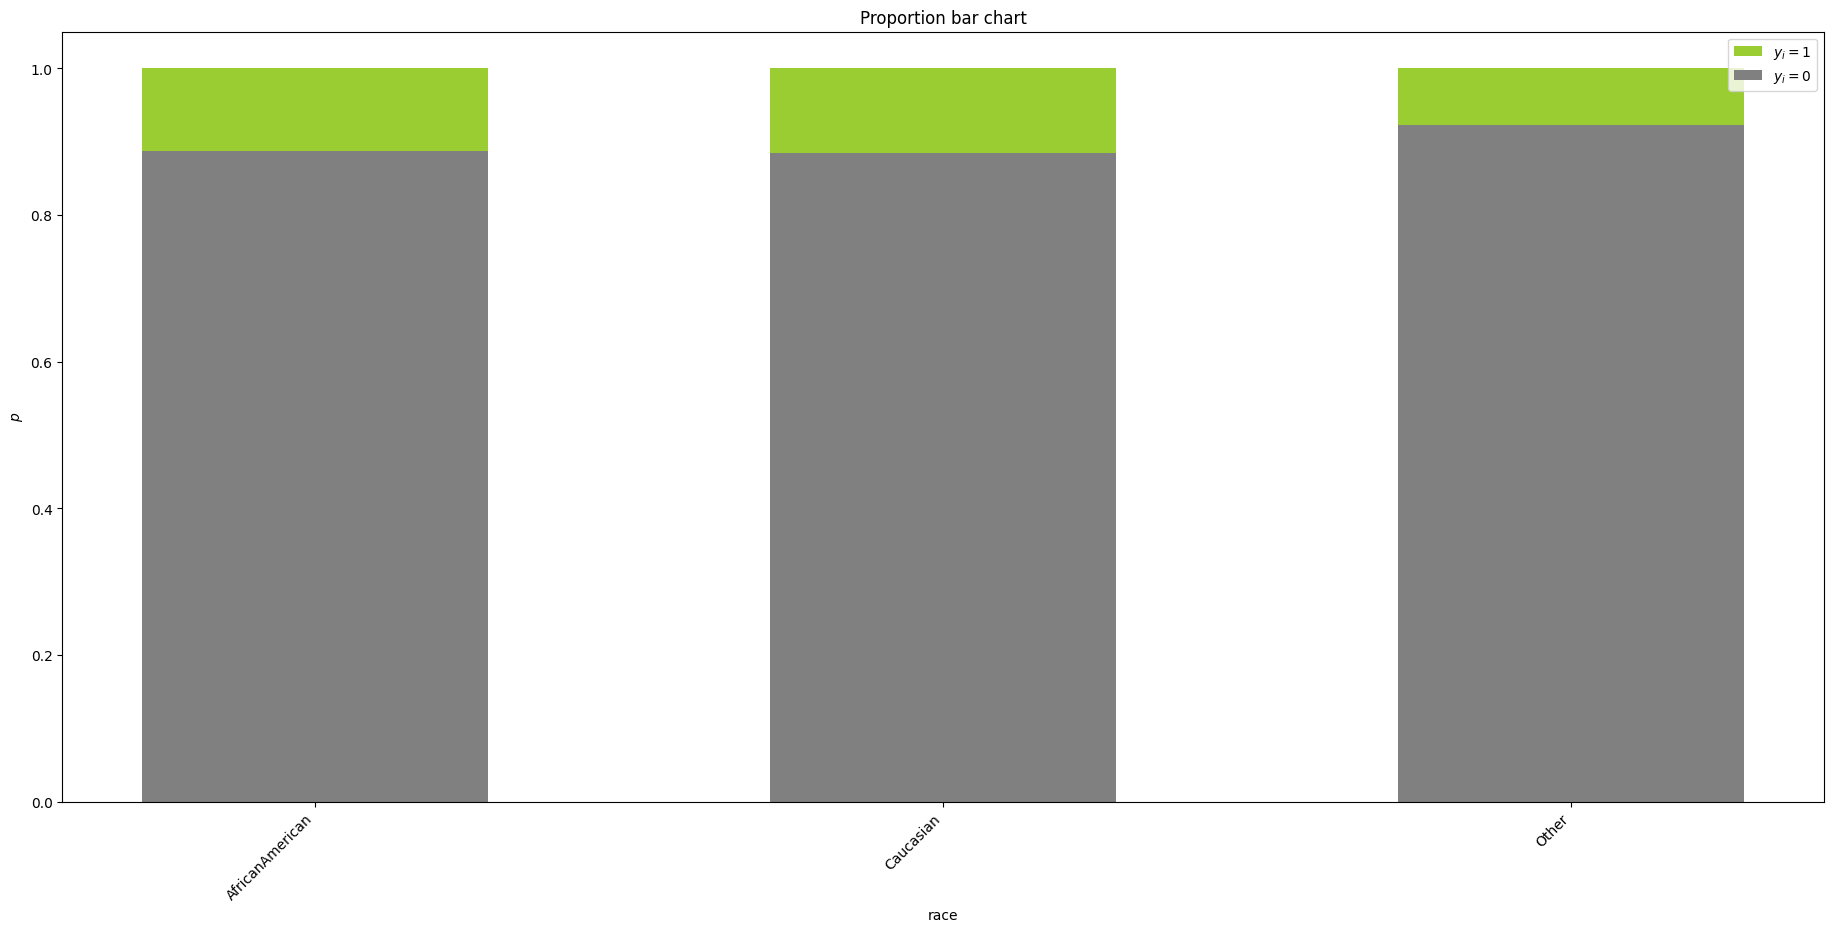

In [22]:
bar_charts_categorical(train, "race", "readmitted_binary")

In [23]:
# train['medication'].value_counts(normalize=True)

In [24]:
train['medication'] = train['medication'].str.replace('[]', 'no medication')

In [25]:
train['number_prescriptions'] = train['medication'].apply(lambda x: 0 if x=='no medication' else len((x.replace("[", "").replace("]", "")).split(',')))

In [26]:
#no medication = 0 | medication taken=1
train['medication'] = np.where(train['medication']== 'no medication',0,1)

In [27]:
train['medication'].value_counts(normalize=True)

medication
1    0.770537
0    0.229463
Name: proportion, dtype: float64

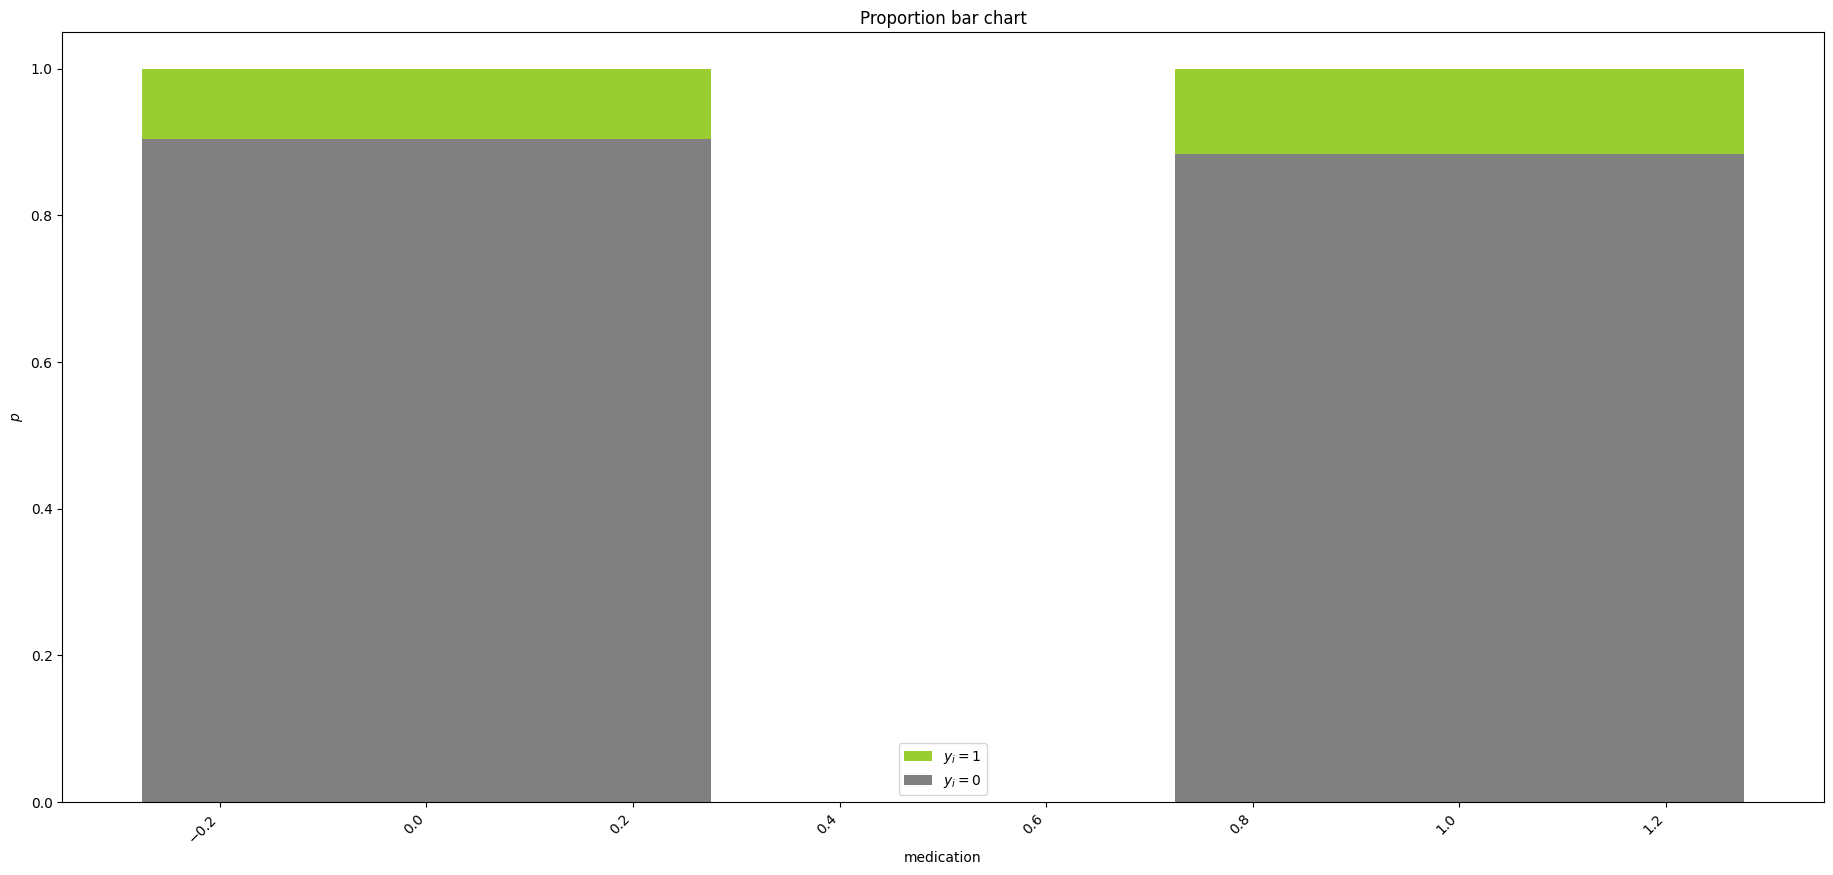

In [28]:
bar_charts_categorical(train, "medication", "readmitted_binary")

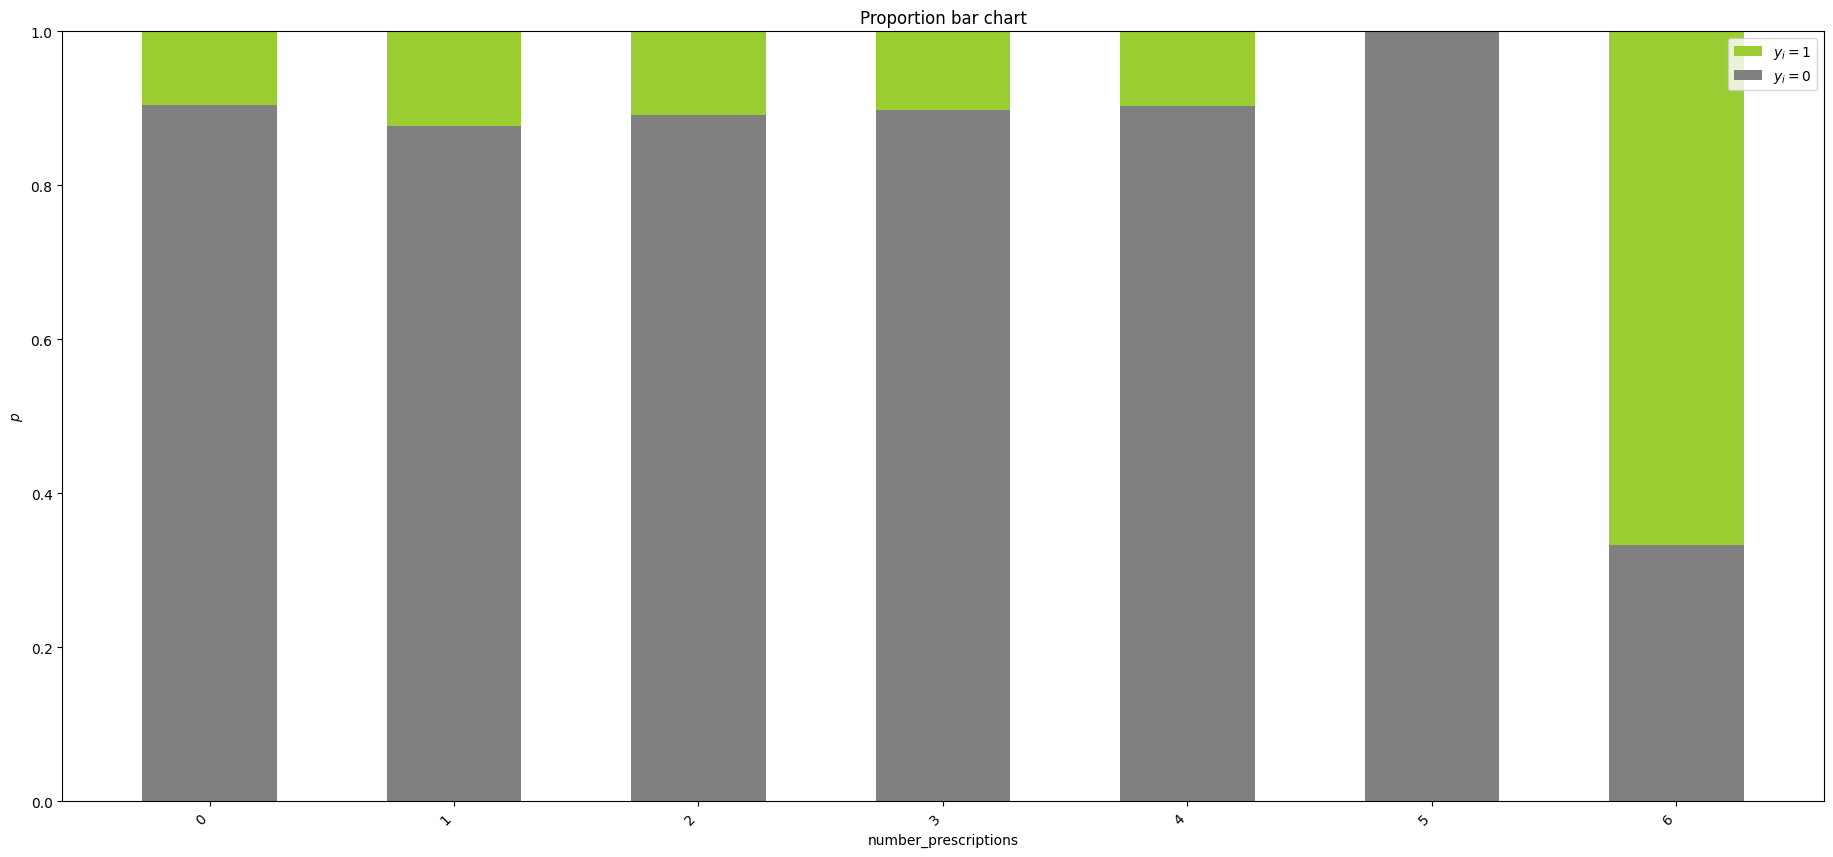

In [29]:
bar_charts_categorical(train, "number_prescriptions", "readmitted_binary")

In [30]:
# pd.set_option('display.max_colwidth', None)
train[train['number_prescriptions']==5]['medication']

encounter_id
552573    1
123846    1
582550    1
779718    1
933380    1
447982    1
692561    1
589216    1
999052    1
451372    1
997560    1
994513    1
162953    1
531851    1
448305    1
456910    1
607305    1
949581    1
245459    1
235867    1
682270    1
957372    1
949034    1
410008    1
476361    1
346271    1
800891    1
982268    1
126332    1
692552    1
695395    1
472794    1
247216    1
731504    1
357162    1
886759    1
398539    1
826243    1
805062    1
986521    1
857791    1
Name: medication, dtype: int32

In [31]:
# pd.set_option('display.max_colwidth', None)
train[train['number_prescriptions']==6][['medication','readmitted_binary']]

,medication,readmitted_binary
encounter_id,,
308794,1,Yes
837132,1,Yes
890037,1,No


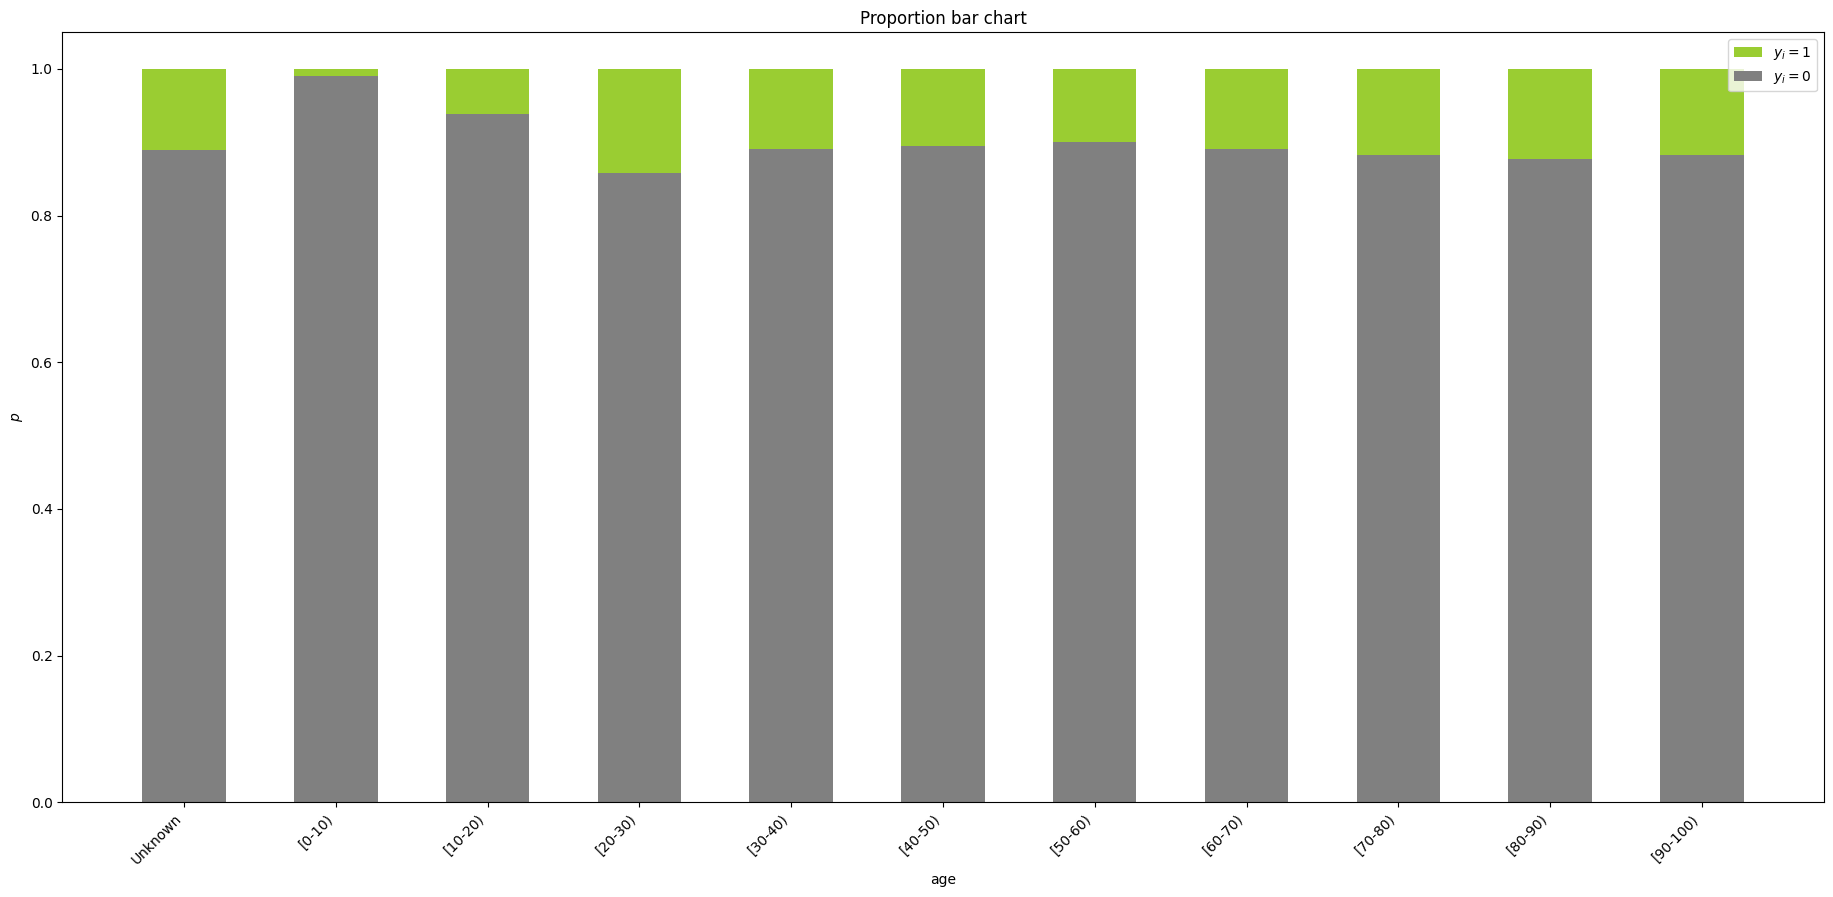

In [32]:
bar_charts_categorical(train, "age", "readmitted_binary")

In [33]:
data = train['age']
df = pd.DataFrame(data)

# Extract the lower and upper age values as separate columns
df[['Lower_Age', 'Upper_Age']] = df['age'].str.extract(r'\[(\d+)-(\d+)\)')

df['Lower_Age'] = pd.to_numeric(df['Lower_Age'], errors='coerce', downcast='integer')
df['Upper_Age'] = pd.to_numeric(df['Upper_Age'], errors='coerce', downcast='integer')


df['Midpoint_Age'] = average_age = np.where(df['Lower_Age'].notna() & df['Upper_Age'].notna(),
                       (df['Lower_Age'] + df['Upper_Age']) / 2,
                       np.nan)
train['Midpoint_Age'] = df['Midpoint_Age']
train.drop('age', axis=1, inplace=True)

In [34]:
train['gender'].value_counts()

gender
Female             38228
Male               33005
Unknown/Invalid        3
Name: count, dtype: int64

In [35]:
#Female = 0 Male = 1 and the Unknown/Invalid becomes Female because it is the mode
train['gender_binary'] = np.where(train['gender']== 'Male',1,0)
train.drop('gender', axis=1, inplace=True)

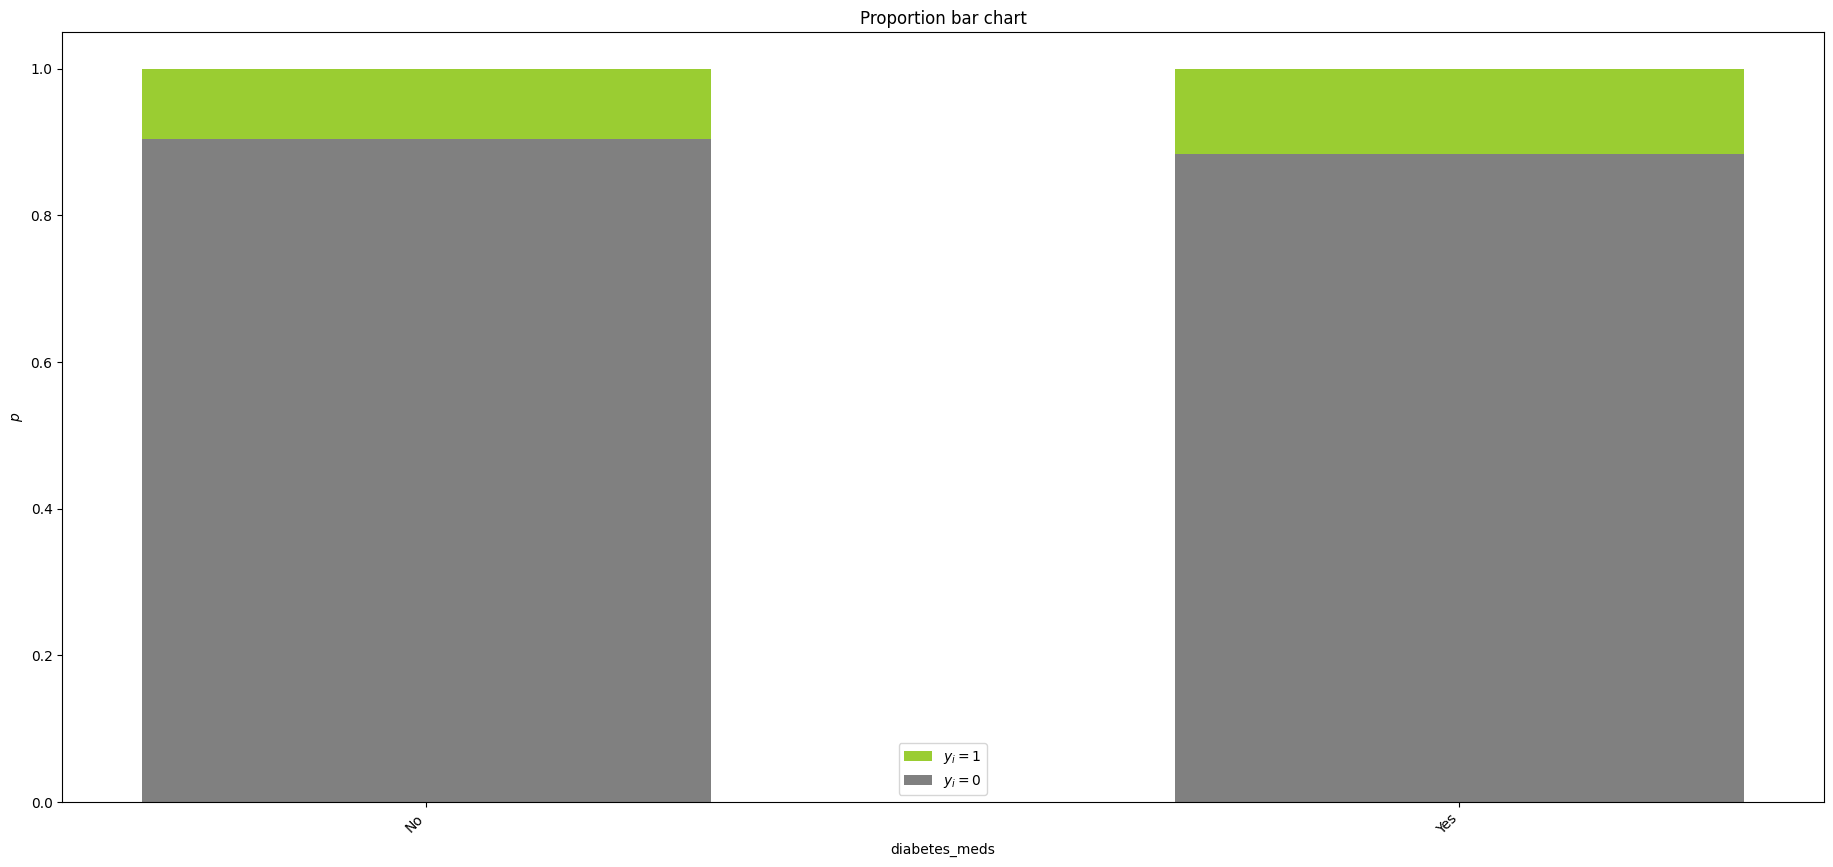

In [36]:
bar_charts_categorical(train, "diabetes_meds", "readmitted_binary")

In [37]:
#No = 0 Yes = 1
train['diabetes_meds_binary'] = np.where(train['diabetes_meds']== 'Yes',1,0)
train.drop('diabetes_meds', axis=1, inplace=True)

In [38]:
#no change = 0 change = 1
train['change_in_meds_binary'] = np.where(train['change_in_meds']== 'Ch',1,0)
train.drop('change_in_meds', axis=1, inplace=True)

In [39]:
n_categorical_columns= len(train.select_dtypes(exclude=np.number).columns)
categorical_columns = list(train.select_dtypes(exclude=np.number).columns)

print('There are',n_categorical_columns, 'columns with categorical values:')
print()
print(categorical_columns)

There are 13 columns with categorical values:

['race', 'payer_code', 'admission_type', 'medical_specialty', 'discharge_disposition', 'admission_source', 'primary_diagnosis', 'secondary_diagnosis', 'additional_diagnosis', 'glucose_test_result', 'a1c_test_result', 'readmitted_binary', 'readmitted_multiclass']


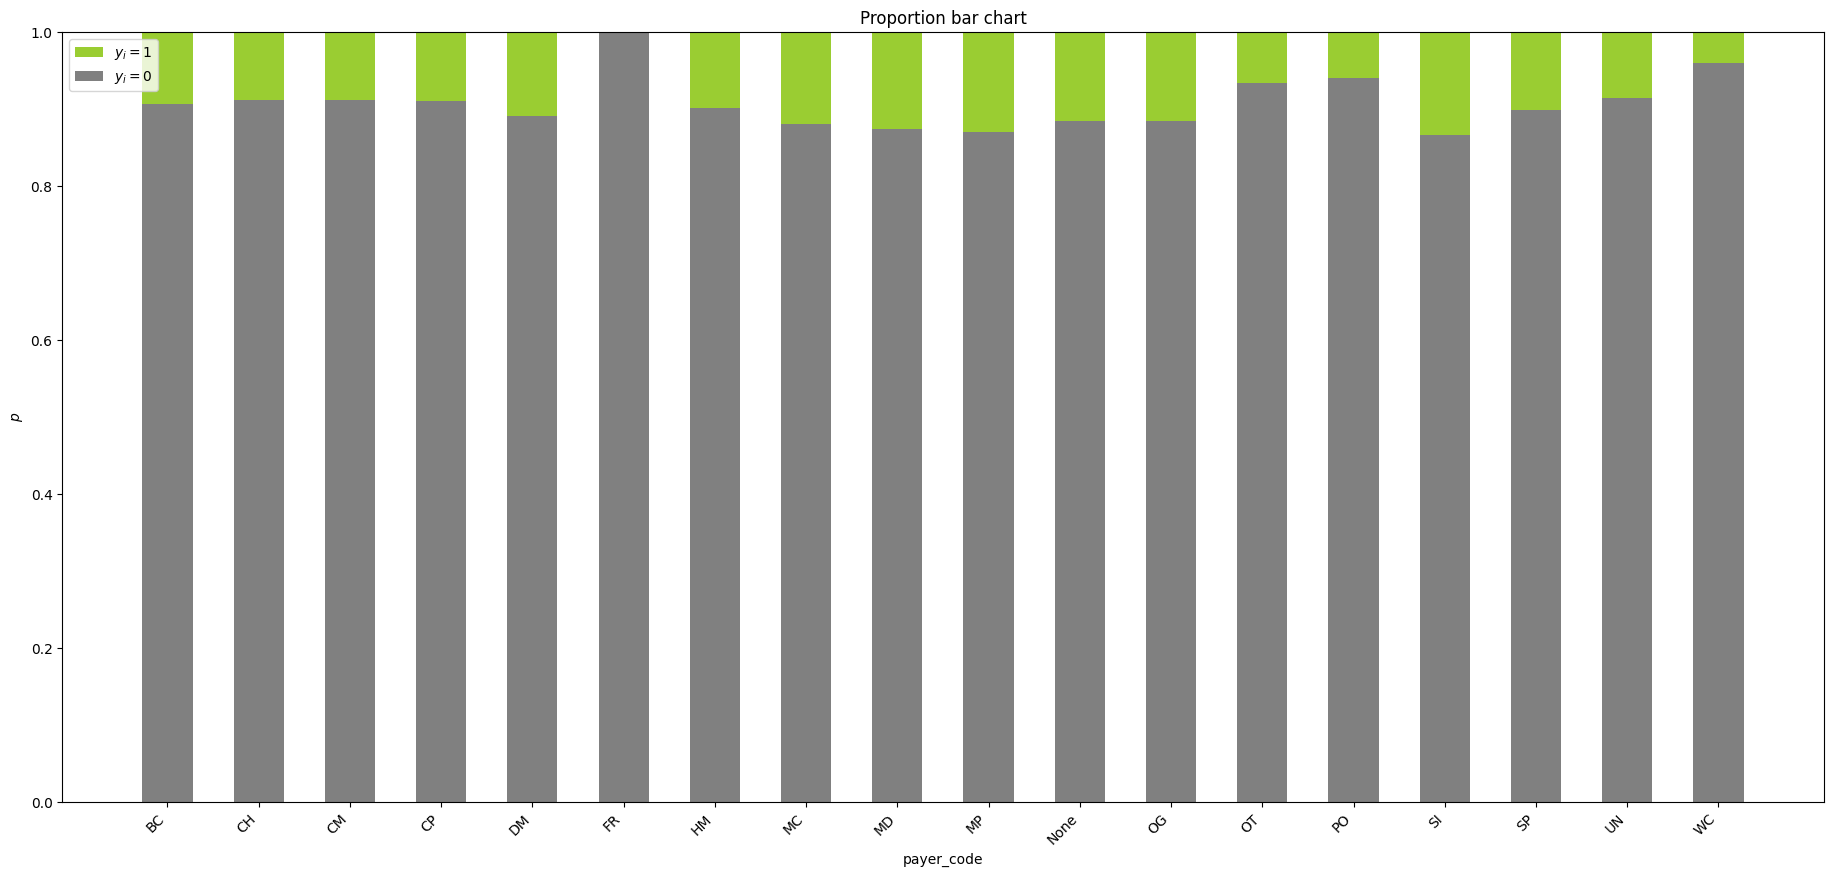

In [40]:
bar_charts_categorical(train, "payer_code", "readmitted_binary")

In [41]:
value_counts = train['payer_code'].value_counts(normalize=True)
replace_payer_code = value_counts[value_counts < 0.05].index

train['payer_code'] = train['payer_code'].replace(replace_payer_code, 'Other_code')
train['payer_code'].value_counts(normalize=True)

payer_code
None          0.395881
MC            0.318420
Other_code    0.225069
HM            0.060629
Name: proportion, dtype: float64

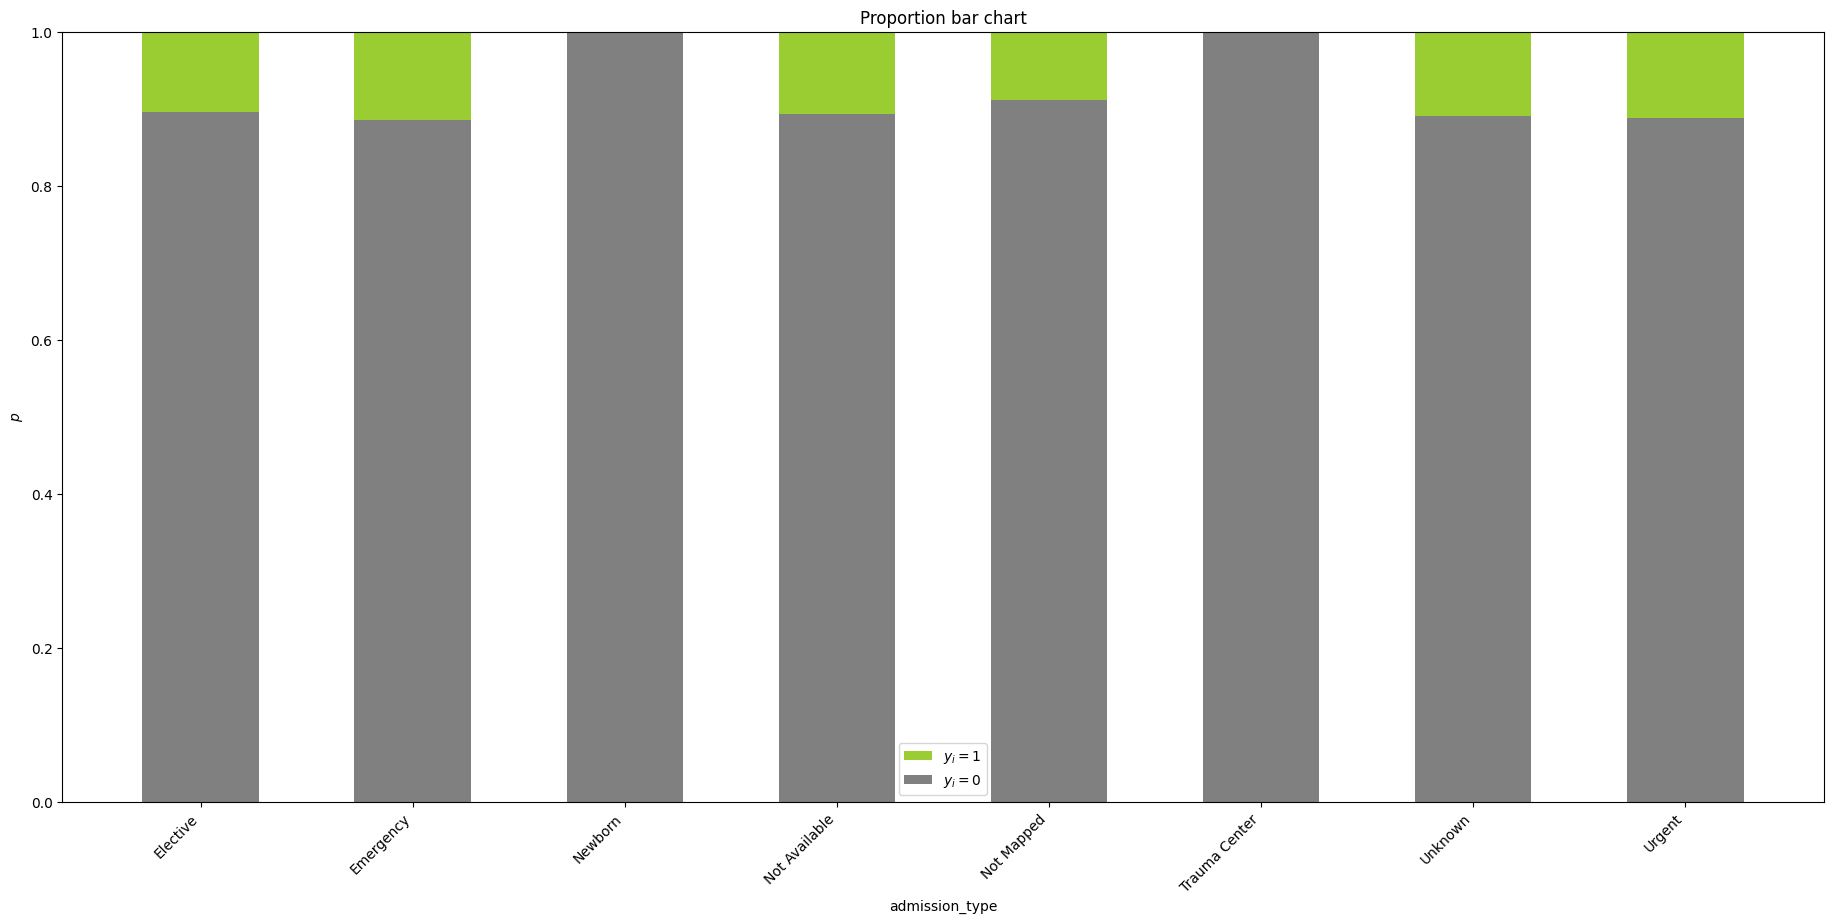

In [42]:
bar_charts_categorical(train, "admission_type", "readmitted_binary")

In [43]:
train["admission_type"].value_counts()

admission_type
Emergency        37742
Elective         13211
Urgent           13024
Unknown           3706
Not Available     3320
Not Mapped         214
Trauma Center       13
Newborn              6
Name: count, dtype: int64

In [44]:
train[train["admission_type"]=='Newborn'][['Midpoint_Age',"admission_type"]]

,Midpoint_Age,admission_type
encounter_id,,
268572,85.0,Newborn
531496,75.0,Newborn
129737,45.0,Newborn
394366,75.0,Newborn
203219,5.0,Newborn
792408,55.0,Newborn


In [45]:
train[train["admission_type"]=='Trauma Center'][['Midpoint_Age',"admission_type"]]

,Midpoint_Age,admission_type
encounter_id,,
693982,55.0,Trauma Center
150293,NaN,Trauma Center
477599,55.0,Trauma Center
764141,85.0,Trauma Center
694176,55.0,Trauma Center
658996,75.0,Trauma Center
203632,45.0,Trauma Center
444992,55.0,Trauma Center
674039,55.0,Trauma Center


In [46]:
train[train["admission_type"]=='Newborn'][['Midpoint_Age','readmitted_binary',"admission_type"]]

,Midpoint_Age,readmitted_binary,admission_type
encounter_id,,,
268572,85.0,No,Newborn
531496,75.0,No,Newborn
129737,45.0,No,Newborn
394366,75.0,No,Newborn
203219,5.0,No,Newborn
792408,55.0,No,Newborn


In [47]:
train[train["admission_type"]=='Trauma Center'][['Midpoint_Age','readmitted_binary',"admission_type"]]

,Midpoint_Age,readmitted_binary,admission_type
encounter_id,,,
693982,55.0,No,Trauma Center
150293,NaN,No,Trauma Center
477599,55.0,No,Trauma Center
764141,85.0,No,Trauma Center
694176,55.0,No,Trauma Center
658996,75.0,No,Trauma Center
203632,45.0,No,Trauma Center
444992,55.0,No,Trauma Center
674039,55.0,No,Trauma Center


In [48]:
value_counts = train['admission_type'].value_counts(normalize=True)
replace_admission_type = value_counts[value_counts < 0.05].index

train['admission_type'] = train['admission_type'].replace('Unknown', 'Other_type')
train['admission_type'] = train['admission_type'].replace(replace_admission_type, 'Other_type')
train['admission_type'].value_counts(normalize=True)

admission_type
Emergency     0.529816
Elective      0.185454
Urgent        0.182829
Other_type    0.101901
Name: proportion, dtype: float64

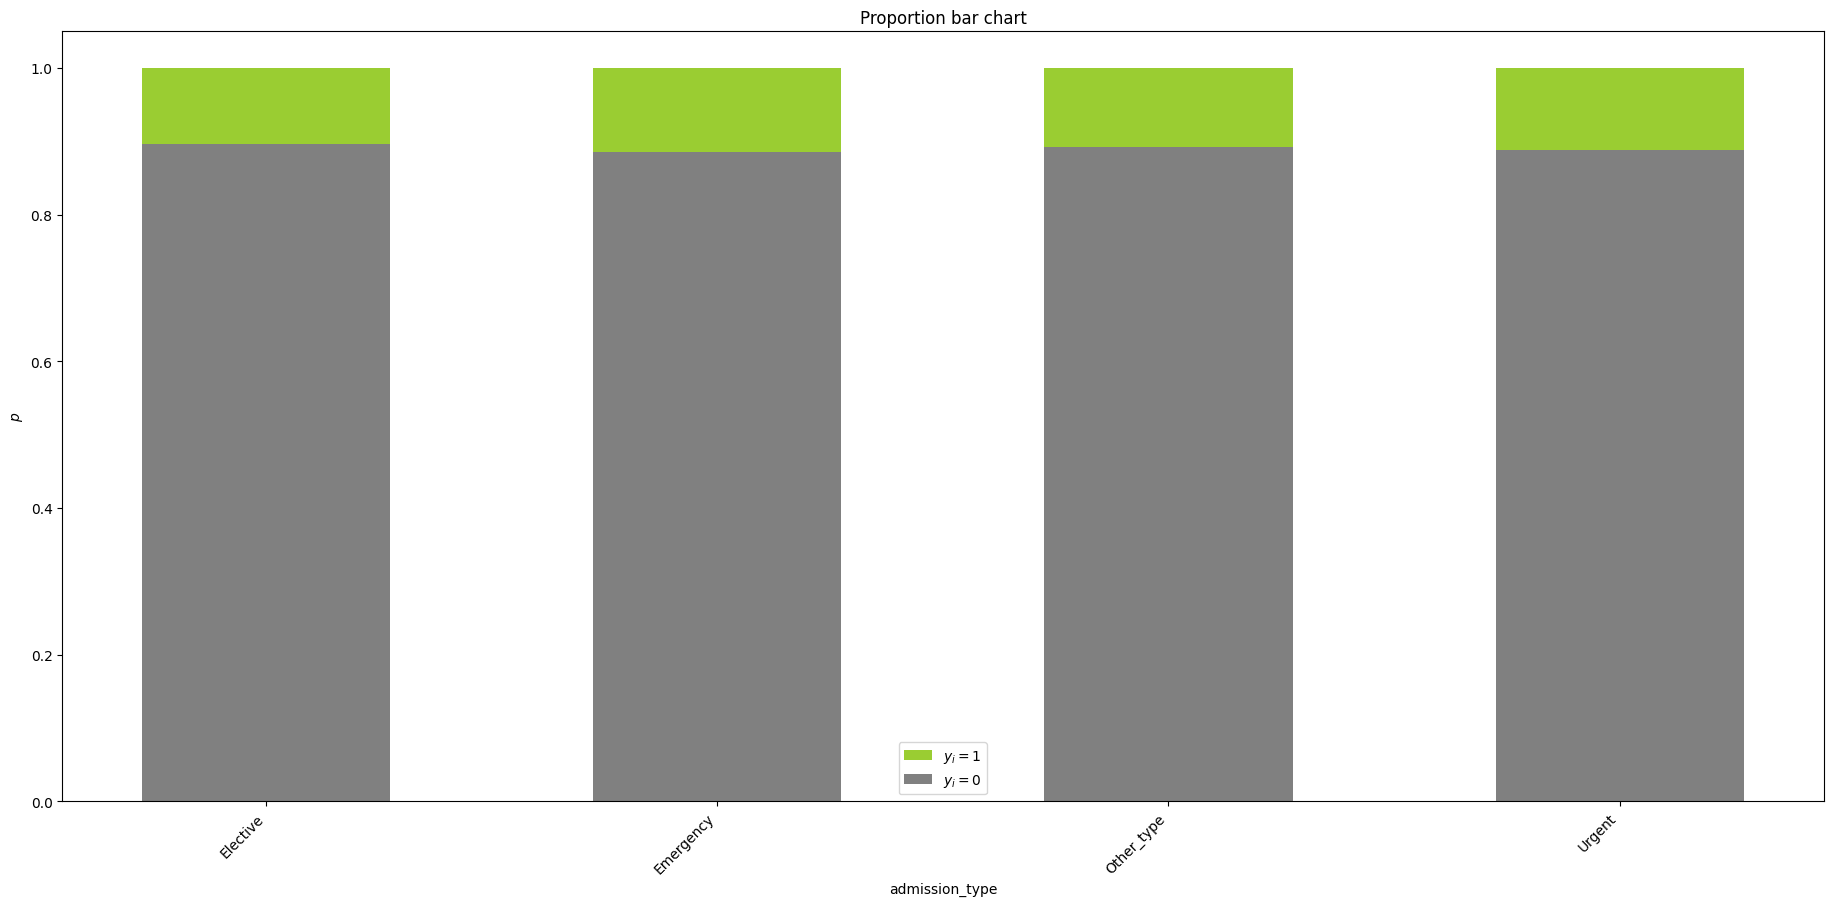

In [49]:
bar_charts_categorical(train, "admission_type", "readmitted_binary")

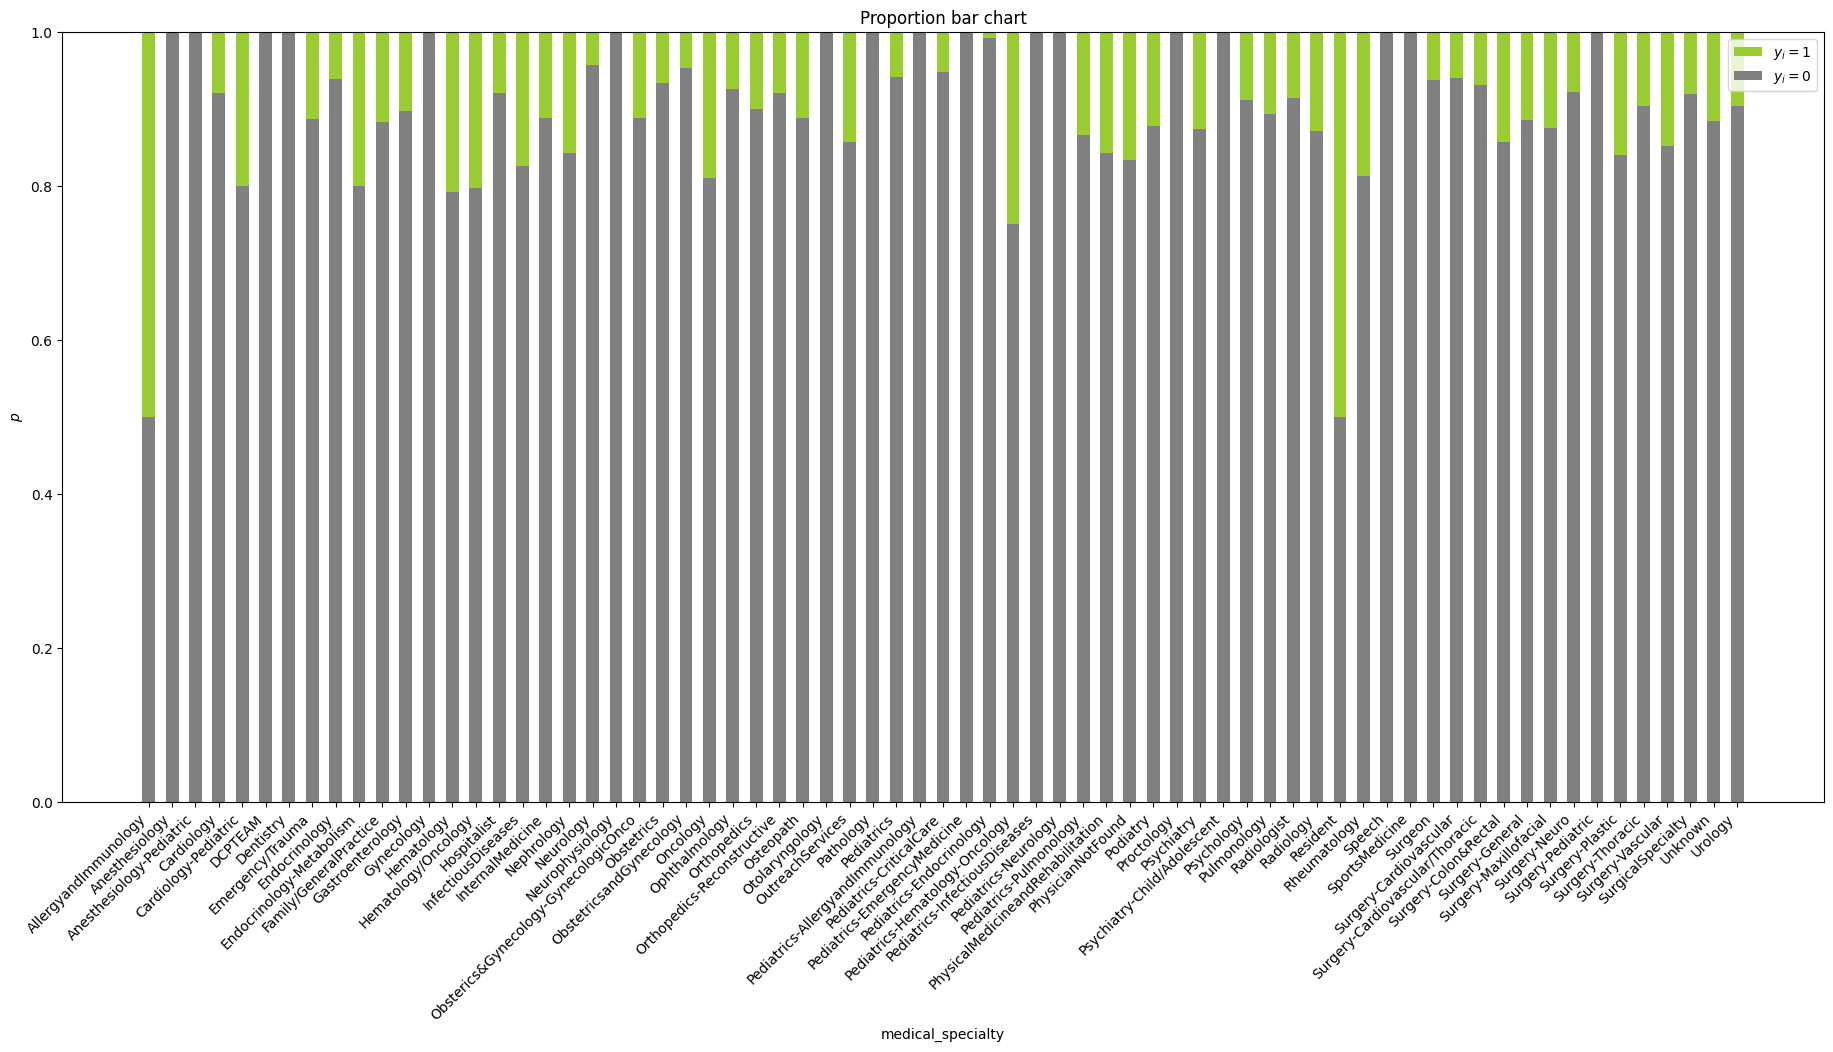

In [50]:
bar_charts_categorical(train, "medical_specialty", "readmitted_binary")

In [51]:
surgery = train[train['medical_specialty'].str.contains('Surgery|Surgeon|Reconstructive')]
train.loc[surgery.index, 'medical_specialty'] = 'Surgery'

pediatric = train[train['medical_specialty'].str.contains('Pediatrics|Pediatric')]
train.loc[pediatric.index, 'medical_specialty'] = 'Pediatric'

train['medical_specialty'].value_counts(normalize=True)

medical_specialty
Unknown                                 0.490230
InternalMedicine                        0.144478
Emergency/Trauma                        0.074667
Family/GeneralPractice                  0.073235
Surgery                                 0.061556
Cardiology                              0.052165
Nephrology                              0.015947
Orthopedics                             0.013392
Radiologist                             0.011469
Pulmonology                             0.008577
Psychiatry                              0.008395
Urology                                 0.006710
ObstetricsandGynecology                 0.006570
Pediatric                               0.005784
Gastroenterology                        0.005573
PhysicalMedicineandRehabilitation       0.003931
Oncology                                0.003411
Hematology/Oncology                     0.002148
Neurology                               0.001937
Otolaryngology                          0.001207
En

In [52]:
value_counts = train['medical_specialty'].value_counts(normalize=True)
replace_medical_specialty = value_counts[value_counts < 0.05].index

train['medical_specialty'] = train['medical_specialty'].replace('Unknown', 'Other_specialty')
train['medical_specialty'] = train['medical_specialty'].replace(replace_medical_specialty, 'Other_specialty')
train['medical_specialty'].value_counts(normalize=True)

medical_specialty
Other_specialty           0.593899
InternalMedicine          0.144478
Emergency/Trauma          0.074667
Family/GeneralPractice    0.073235
Surgery                   0.061556
Cardiology                0.052165
Name: proportion, dtype: float64

In [53]:
train['medical_specialty'] = train['medical_specialty'].str.strip().str.replace('/', '_')

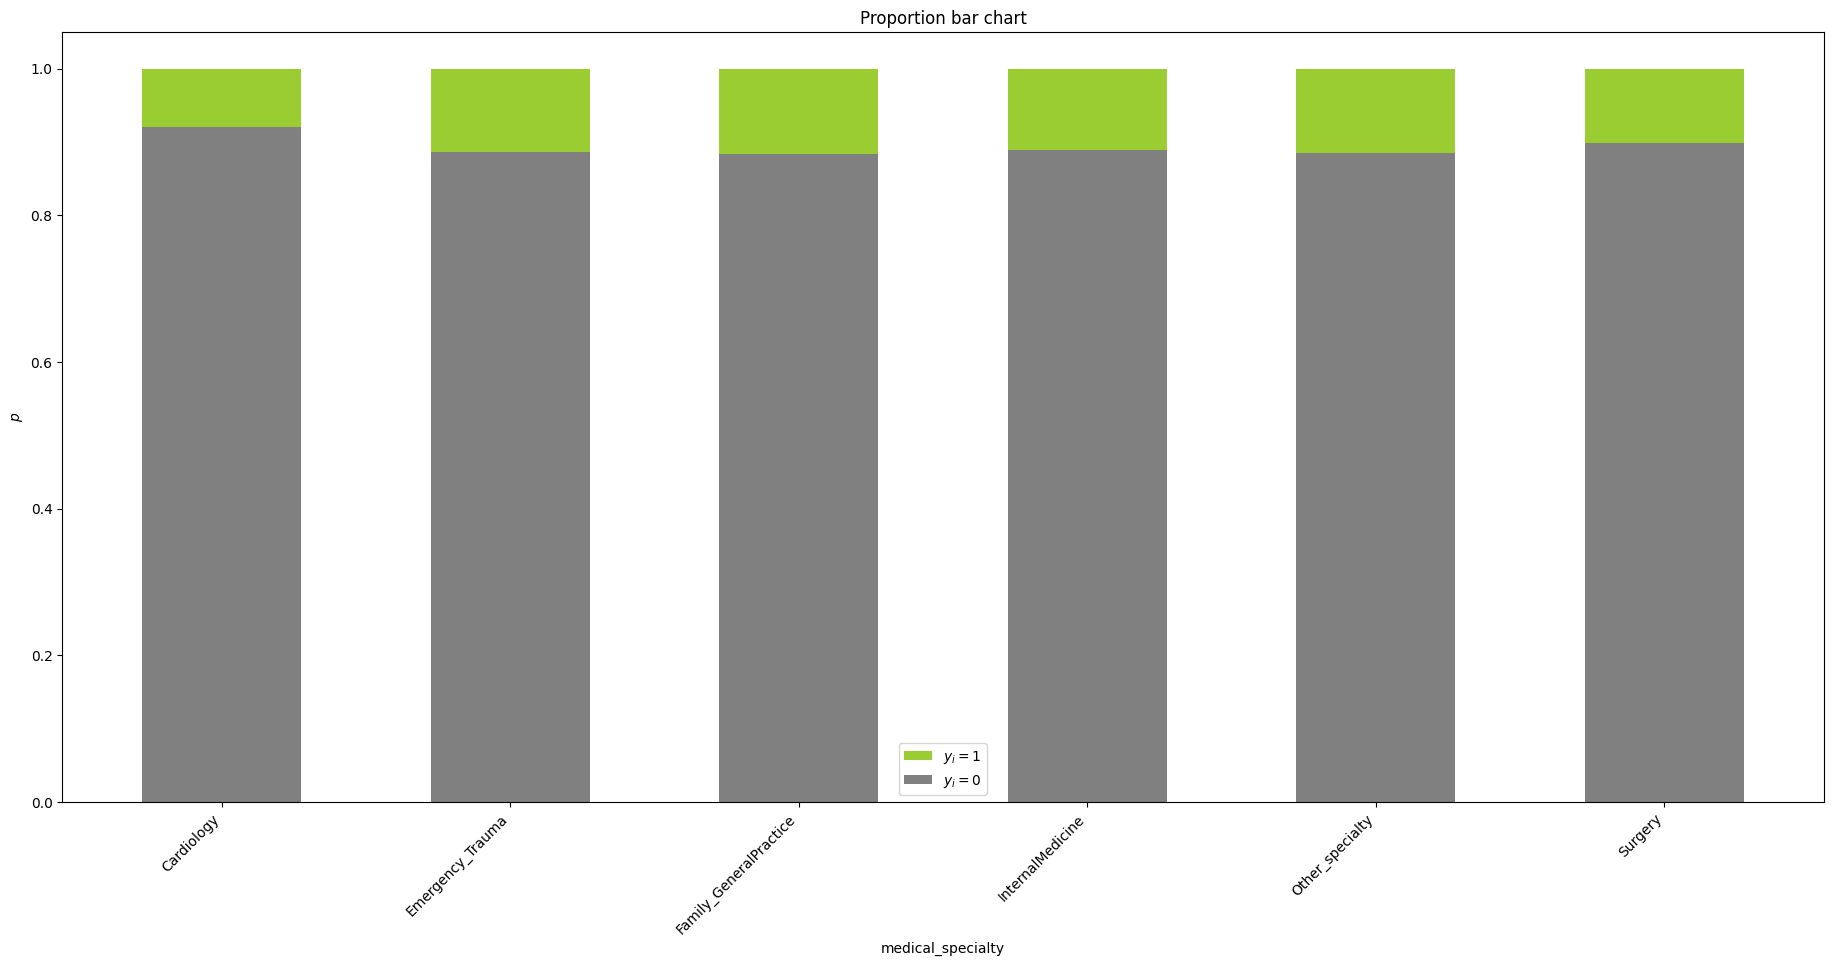

In [54]:
bar_charts_categorical(train, "medical_specialty", "readmitted_binary")

In [55]:
train['discharge_disposition'].value_counts(normalize=True)

discharge_disposition
Discharged to home                                                                                           0.593183
Discharged/transferred to SNF                                                                                0.137290
Discharged/transferred to home with home health service                                                      0.126411
Unknown                                                                                                      0.036358
Discharged/transferred to another short term hospital                                                        0.020888
Discharged/transferred to another rehab fac including rehab units of a hospital .                            0.019555
Expired                                                                                                      0.015933
Discharged/transferred to another type of inpatient care institution                                         0.011539
Not Mapped                        

In [56]:
expired = train[train['discharge_disposition'].str.contains('Expired')]
train.loc[expired.index, 'discharge_disposition'] = 'Expired'

hospice = train[train['discharge_disposition'].str.contains('Hospice')]
train.loc[hospice.index, 'discharge_disposition'] = 'Hospice'

another_medical_facility = ['Discharged/transferred to SNF', 'Discharged/transferred to another short term hospital', 'Discharged/transferred to another rehab fac including rehab units of a hospital', 'Discharged/transferred to another type of inpatient care institution', 'Discharged/transferred to a long term care hospital', 'Discharged/transferred to a federal health care facility','Neonate discharged to another hospital for neonatal aftercare']
train['discharge_disposition'] = train['discharge_disposition'].replace(another_medical_facility, 'Transferred_to_another_medical_facility')

outpatient = ['Discharged/transferred/referred to this institution for outpatient services','Discharged/transferred/referred another institution for outpatient services']
train['discharge_disposition'] = train['discharge_disposition'].replace(outpatient, 'Discharged_transferred_referred_another_this_institution_for_outpatient_services')

home = train[train['discharge_disposition'].str.contains('home')]
train.loc[home.index, 'discharge_disposition'] = 'Discharged_to_home'

other = ['Discharged/transferred to another rehab fac including rehab units of a hospital','Discharged/transferred to ICF','Hospice',
         'Left AMA','Discharged/transferred to a long term care hospital.','Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital',
         'Discharged/transferred within this institution to Medicare approved swing bed','Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.',
         'Discharged/transferred/referred another/this institution for outpatient services',
         'Discharged/transferred to a federal health care facility.','Discharged/transferred to another rehab fac including rehab units of a hospital .','Unknown',
         'Admitted as an inpatient to this hospital', 'Still patient or expected to return for outpatient services']

train['discharge_disposition'] = train['discharge_disposition'].replace(other, 'Other')


train['discharge_disposition'] = train['discharge_disposition'].replace('Not Mapped', 'Unknown')

train['discharge_disposition'].value_counts(normalize=True)

discharge_disposition
Discharged_to_home                                                                  0.720731
Transferred_to_another_medical_facility                                             0.169746
Other                                                                               0.083750
Expired                                                                             0.016031
Unknown                                                                             0.009532
Discharged_transferred_referred_another_this_institution_for_outpatient_services    0.000211
Name: proportion, dtype: float64

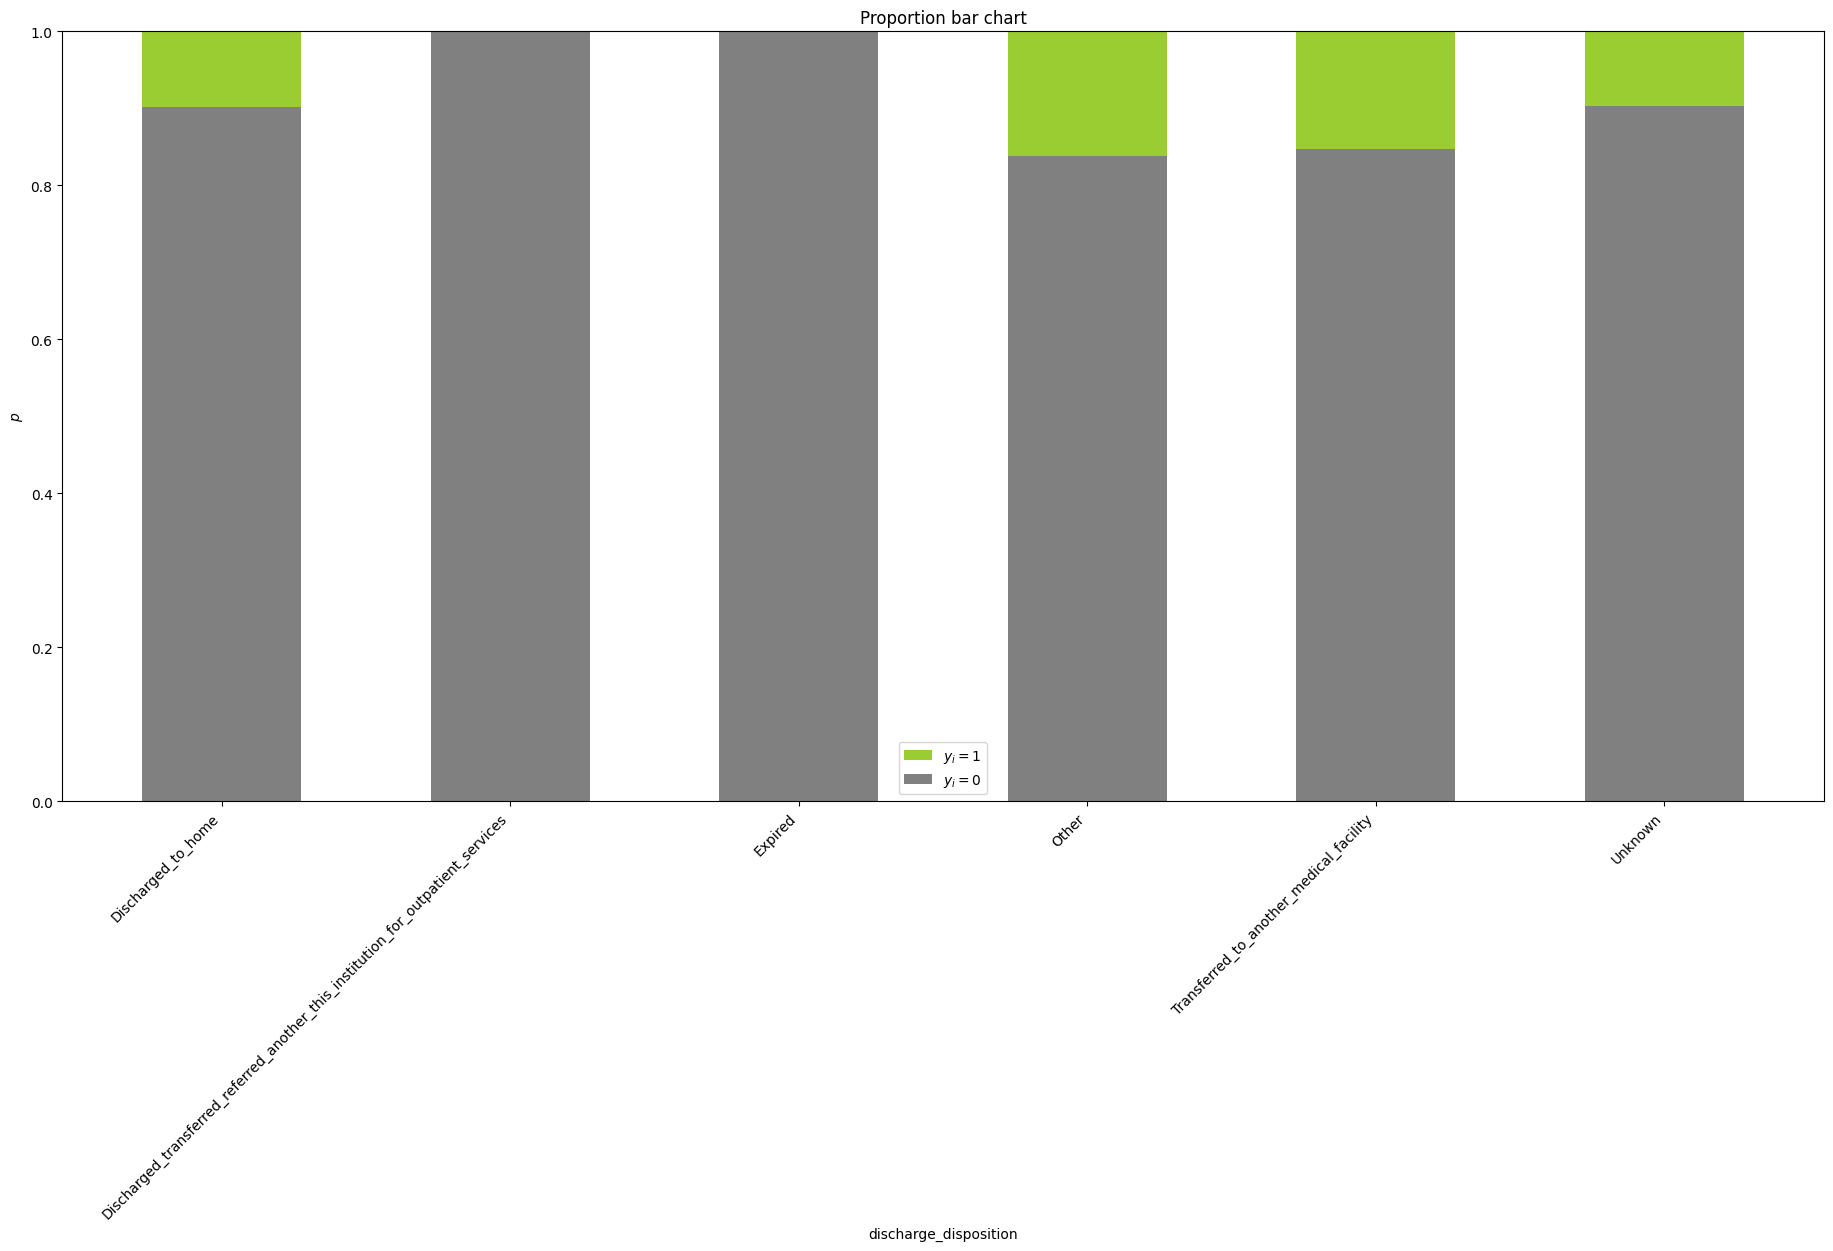

In [57]:
bar_charts_categorical(train, "discharge_disposition", "readmitted_binary")

In [58]:
unknown = [' Not Mapped',' Not Available']
train['admission_source'] = train['admission_source'].replace(unknown, 'Unknown')
train['admission_source'].value_counts(normalize=True)

admission_source
 Emergency Room                                               0.565992
 Physician Referral                                           0.290275
Unknown                                                       0.068968
Transfer from a hospital                                      0.031304
 Transfer from another health care facility                   0.021927
Clinic Referral                                               0.010935
 Transfer from a Skilled Nursing Facility (SNF)               0.008353
HMO Referral                                                  0.001811
 Court/Law Enforcement                                        0.000154
 Transfer from hospital inpt/same fac reslt in a sep claim    0.000112
 Transfer from critial access hospital                        0.000098
 Transfer from Ambulatory Surgery Center                      0.000028
 Extramural Birth                                             0.000014
Normal Delivery                                             

In [59]:
train['admission_source'].unique()

array([' Emergency Room', 'Clinic Referral', 'Unknown',
       ' Transfer from another health care facility',
       ' Physician Referral', 'Transfer from a hospital', 'HMO Referral',
       ' Transfer from a Skilled Nursing Facility (SNF)',
       ' Court/Law Enforcement',
       ' Transfer from hospital inpt/same fac reslt in a sep claim',
       ' Transfer from critial access hospital', ' Extramural Birth',
       'Normal Delivery', ' Transfer from Ambulatory Surgery Center',
       ' Sick Baby'], dtype=object)

In [60]:
train['admission_source'] = train['admission_source'].str.strip().str.replace(' ', '_')

In [61]:
train['admission_source'].unique()

array(['Emergency_Room', 'Clinic_Referral', 'Unknown',
       'Transfer_from_another_health_care_facility', 'Physician_Referral',
       'Transfer_from_a_hospital', 'HMO_Referral',
       'Transfer_from_a_Skilled_Nursing_Facility_(SNF)',
       'Court/Law_Enforcement',
       'Transfer_from_hospital_inpt/same_fac_reslt_in_a_sep_claim',
       'Transfer_from_critial_access_hospital', 'Extramural_Birth',
       'Normal_Delivery', 'Transfer_from_Ambulatory_Surgery_Center',
       'Sick_Baby'], dtype=object)

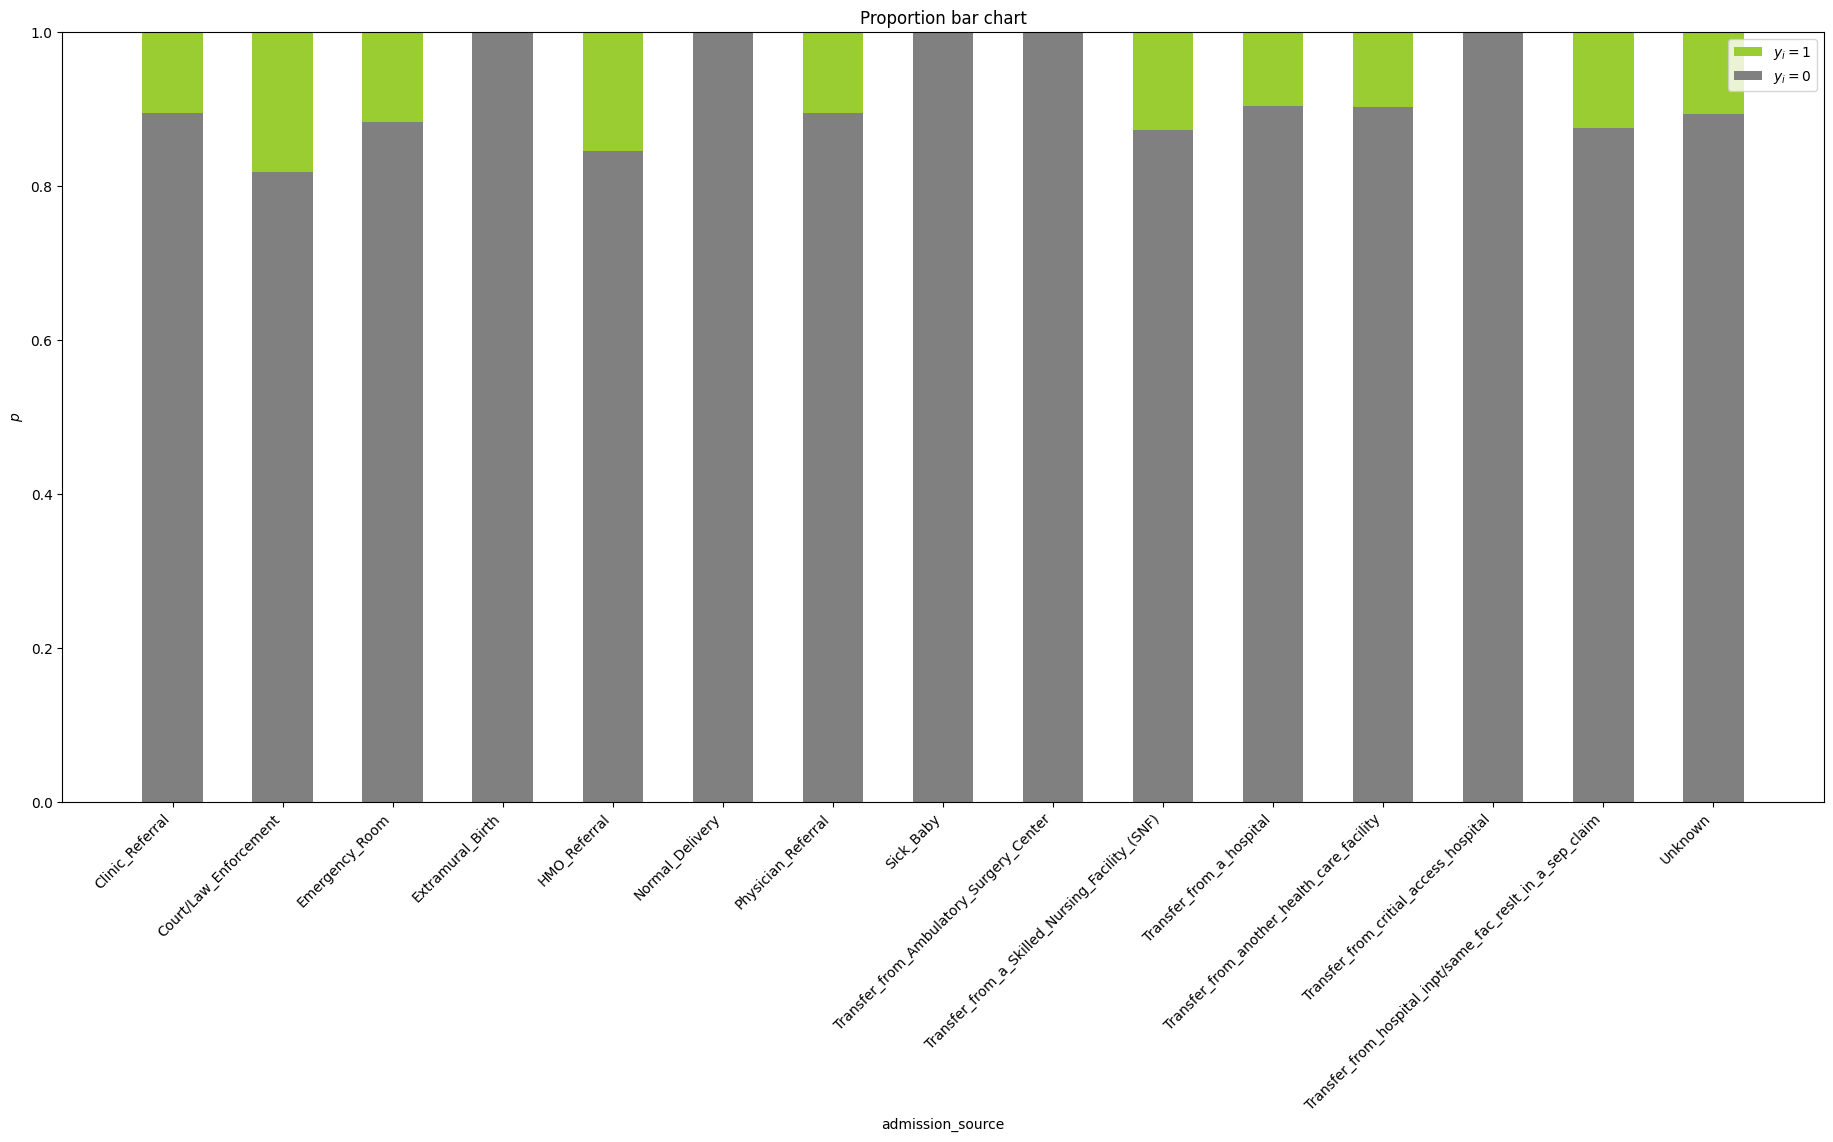

In [62]:
bar_charts_categorical(train, "admission_source", "readmitted_binary")

In [63]:
# Unknown provavelmente é os casos onde nao vem de lado nenhum

In [64]:
value_counts = train['admission_source'].value_counts(normalize=True)
replace_admission_source = value_counts[value_counts < 0.05].index

train['admission_source'] = train['admission_source'].replace(replace_admission_source, 'Other_source')
train['admission_source'] = train['admission_source'].replace('Unknown', 'Other_source')
train['admission_source'].value_counts(normalize=True)

admission_source
Emergency_Room        0.565992
Physician_Referral    0.290275
Other_source          0.143734
Name: proportion, dtype: float64

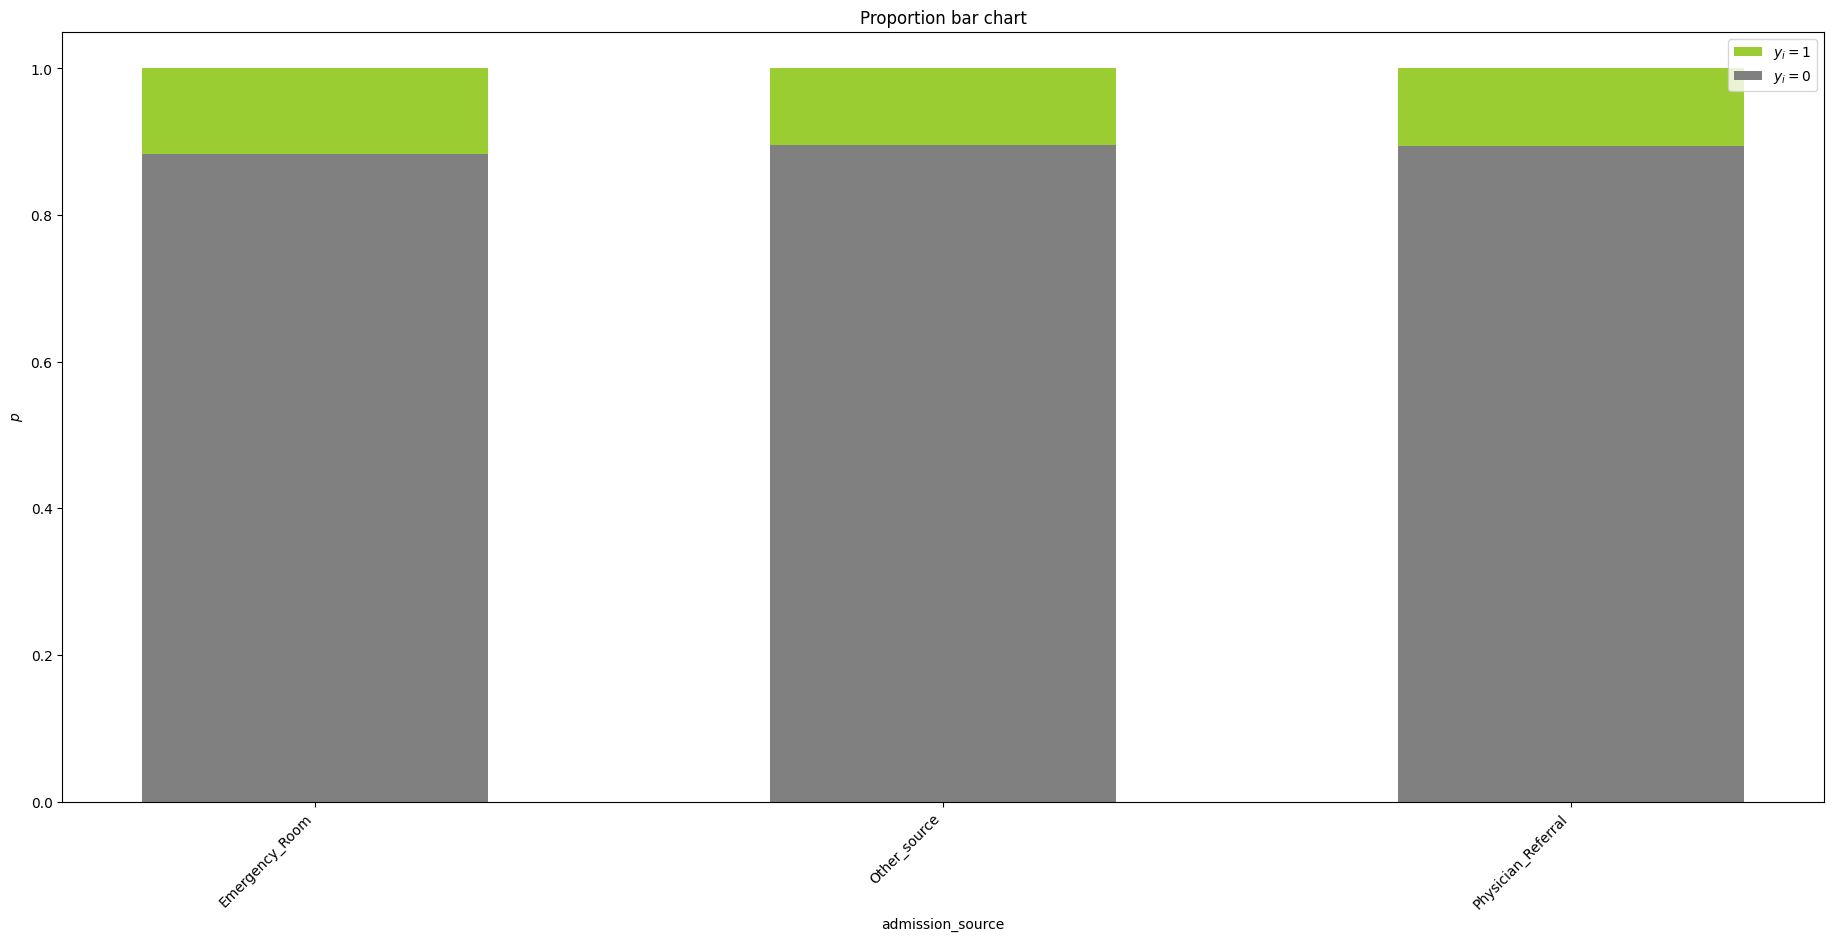

In [65]:
bar_charts_categorical(train, "admission_source", "readmitted_binary")

In [66]:
def diagosis_types_division(x):
    try:
        x = int(x)
        if x <= 139 and x>=1:
            return 'Infectious_and_parasitic_diseases'
        elif x <= 239 and x>=140:
            return 'Neoplasms'
        elif x <= 279 and x>=240:
            return 'Endocrine_nutritional_and_metabolic_diseases_and_immunity_disorders'
        elif x <= 289 and x>=280:
            return 'Diseases_of_the_blood_and_blood_forming_organs'
        elif x <= 319 and x>=290:
            return 'Mental_disorders'
        elif x <= 389 and x>=320:
            return 'Diseases_of_the_nervous_system_and_sense_organs'
        elif x <= 459 and x>=390:
            return 'Diseases_of_the_circulatory_system'
        elif x <= 519 and x>=460:
            return 'Diseases_of_the_respiratory_system'
        elif x <= 579 and x>=520:
            return 'Diseases_of_the_digestive_system'
        elif x <= 629 and x>=580:
            return 'Diseases_of_the_genitourinary_system'
        elif x <= 679 and x>=630:
            return 'Complications_of_pregnancy_childbirth_and_the_puerperium'
        elif x <= 709 and x>=680:
            return 'Diseases_of_the_skin_and_subcutaneous_tissue'
        elif x <= 739 and x>=710:
            return 'Diseases_of_the_musculoskeletal_system_and_connective_tissue'
        elif x <= 759 and x>=740:
            return 'Congenital_anomalies'
        elif x <= 779 and x>=760:
            return 'Certain_conditions_originating_in_the_perinatal_period'
        elif x <= 799 and x>=780:
            return 'Symptoms_signs_and_ill_defined_conditions'
        elif x <= 999 and x>=800:
            return 'Injury_and_poisoning'
        else:
            return 'External_causes_of_injury_and_supplemental_classification'
    except ValueError:
        return 'External_causes_of_injury_and_supplemental_classification'

train['primary_diagnosis_types'] = train['primary_diagnosis'].apply(diagosis_types_division)
train['secondary_diagnosis_types'] = train['secondary_diagnosis'].apply(diagosis_types_division)
train['additional_diagnosis_types'] = train['additional_diagnosis'].apply(diagosis_types_division)
train.drop(['primary_diagnosis','secondary_diagnosis','additional_diagnosis'], axis=1, inplace=True)

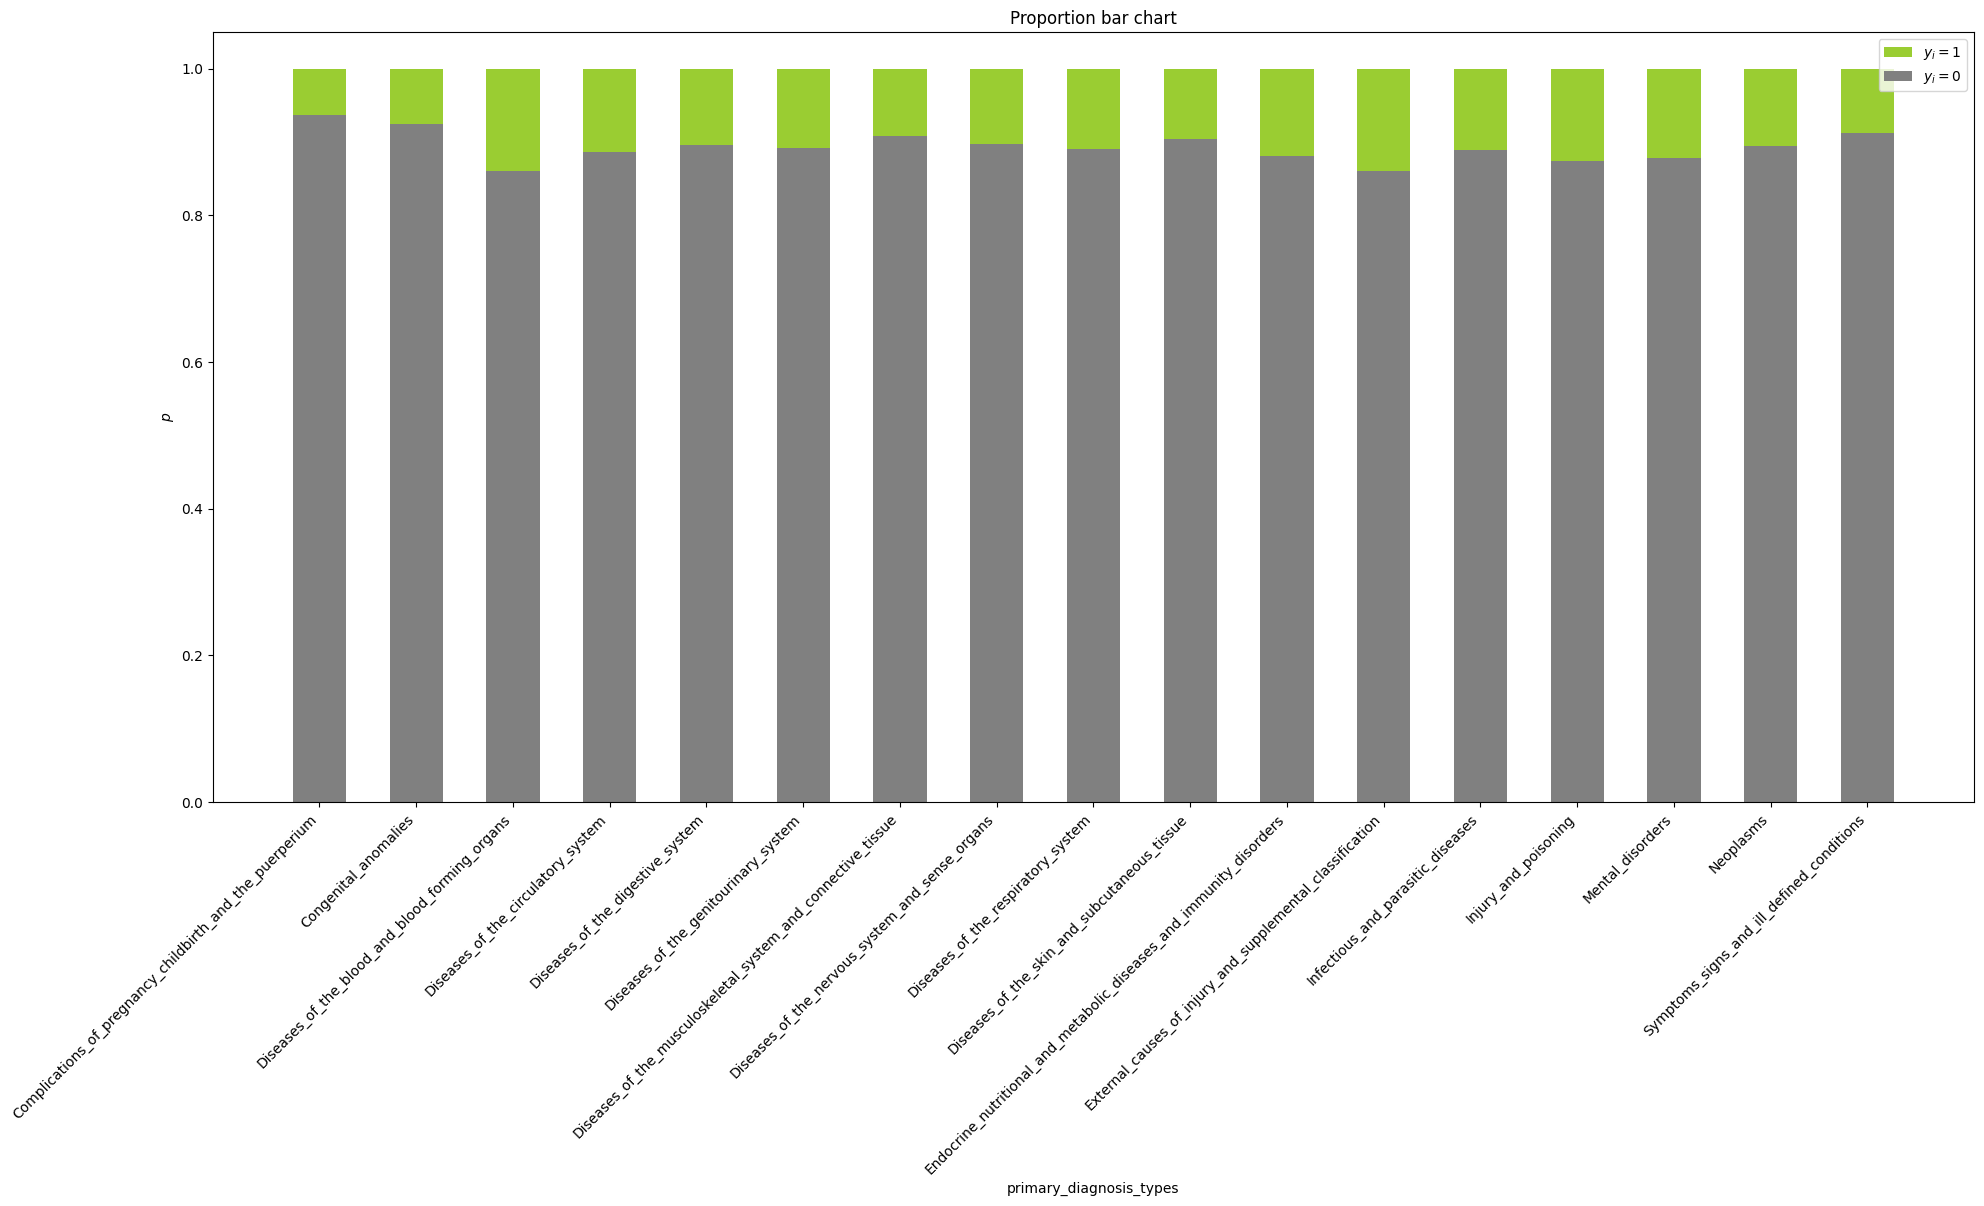

In [67]:
bar_charts_categorical(train, "primary_diagnosis_types", "readmitted_binary")

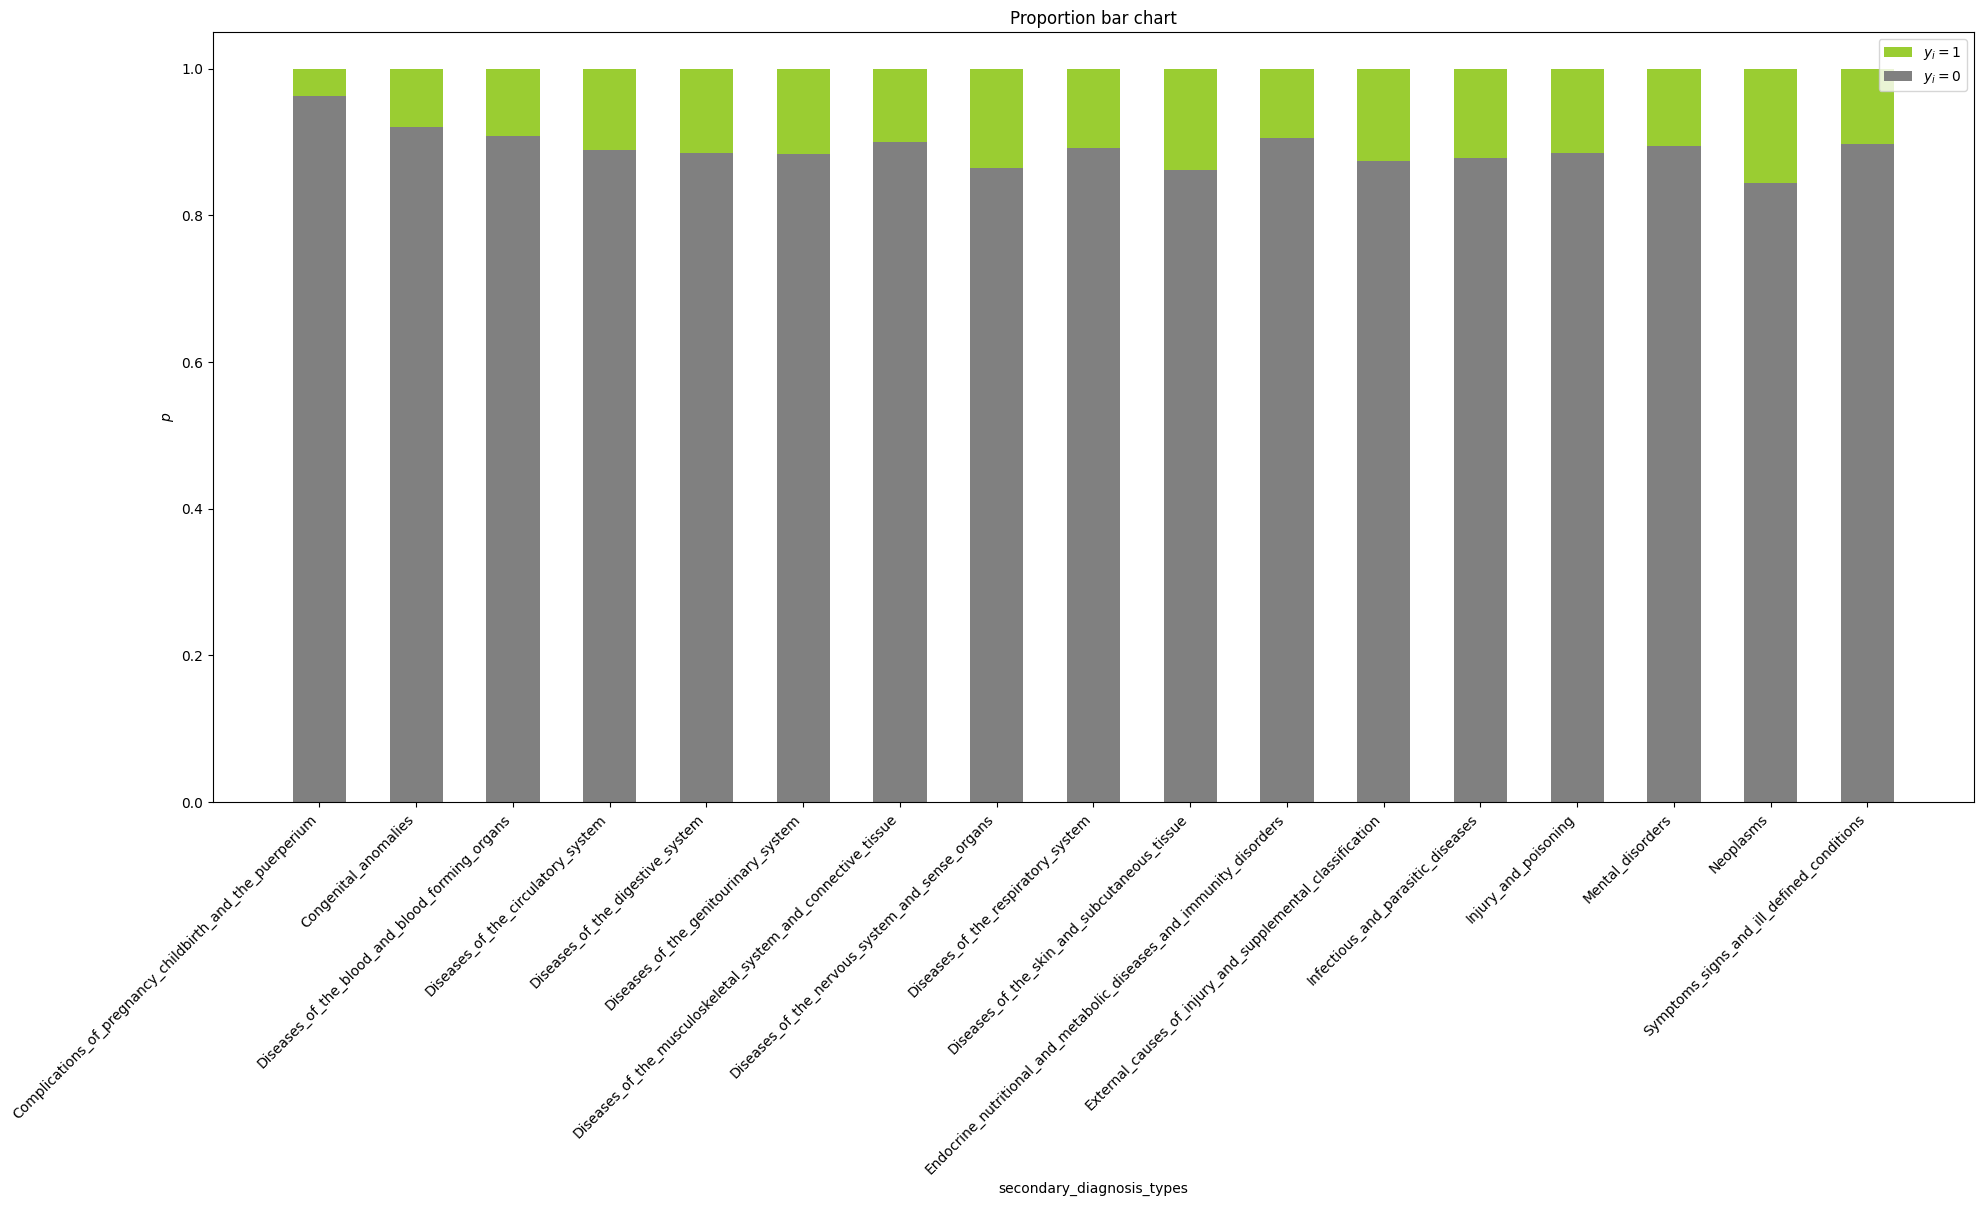

In [68]:
bar_charts_categorical(train, "secondary_diagnosis_types", "readmitted_binary")

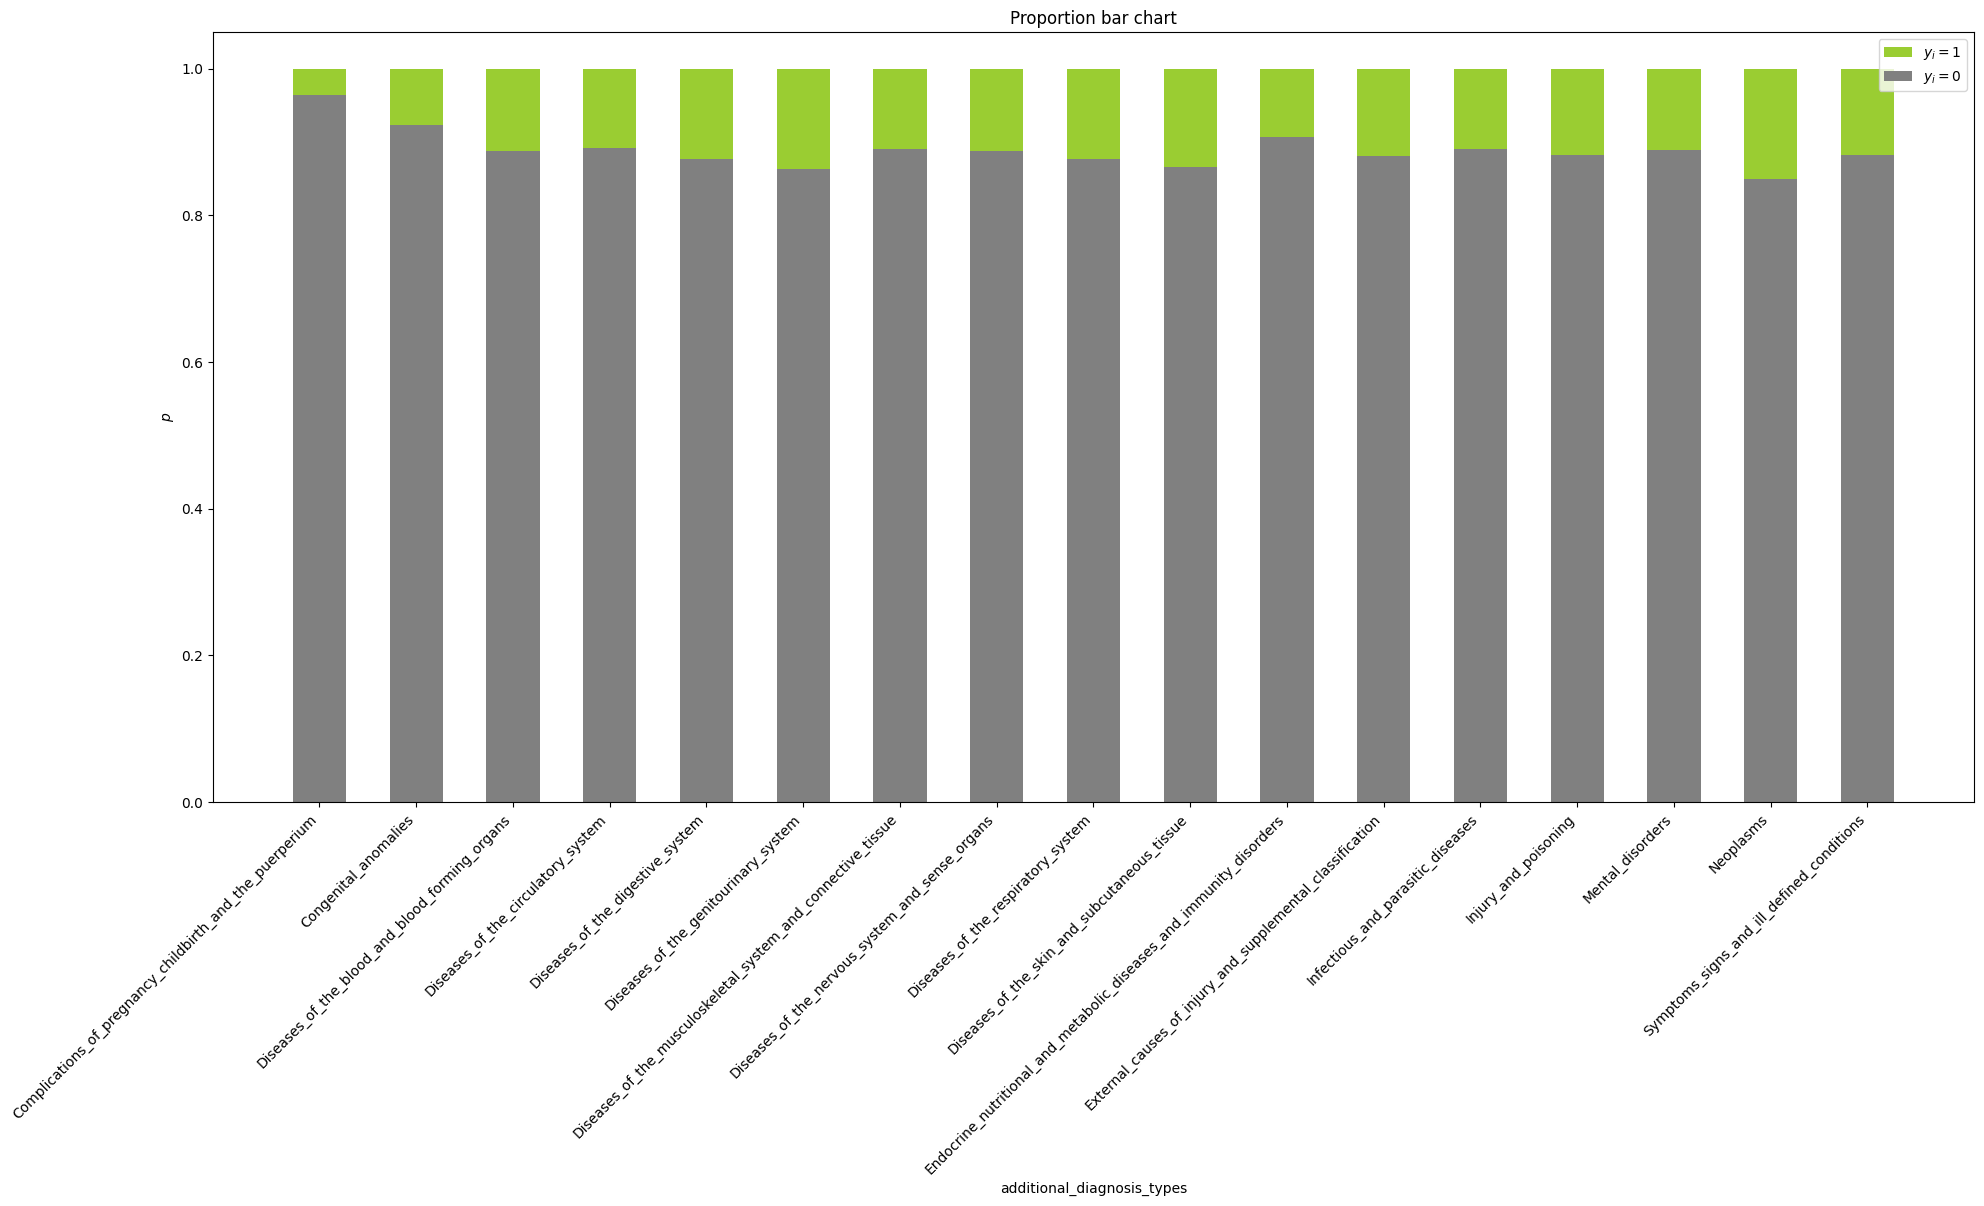

In [69]:
bar_charts_categorical(train, "additional_diagnosis_types", "readmitted_binary")

In [70]:
value_counts = train['primary_diagnosis_types'].value_counts(normalize=True)
replace_primary_diagnosis = value_counts[value_counts < 0.05].index

train['primary_diagnosis_types'] = train['primary_diagnosis_types'].replace(replace_primary_diagnosis, 'Other_type')
train['primary_diagnosis_types'].value_counts(normalize=True)

primary_diagnosis_types
Diseases_of_the_circulatory_system                           0.297925
Other_type                                                   0.265063
Diseases_of_the_respiratory_system                           0.102350
External_causes_of_injury_and_supplemental_classification    0.099753
Diseases_of_the_digestive_system                             0.090909
Symptoms_signs_and_ill_defined_conditions                    0.075481
Injury_and_poisoning                                         0.068519
Name: proportion, dtype: float64

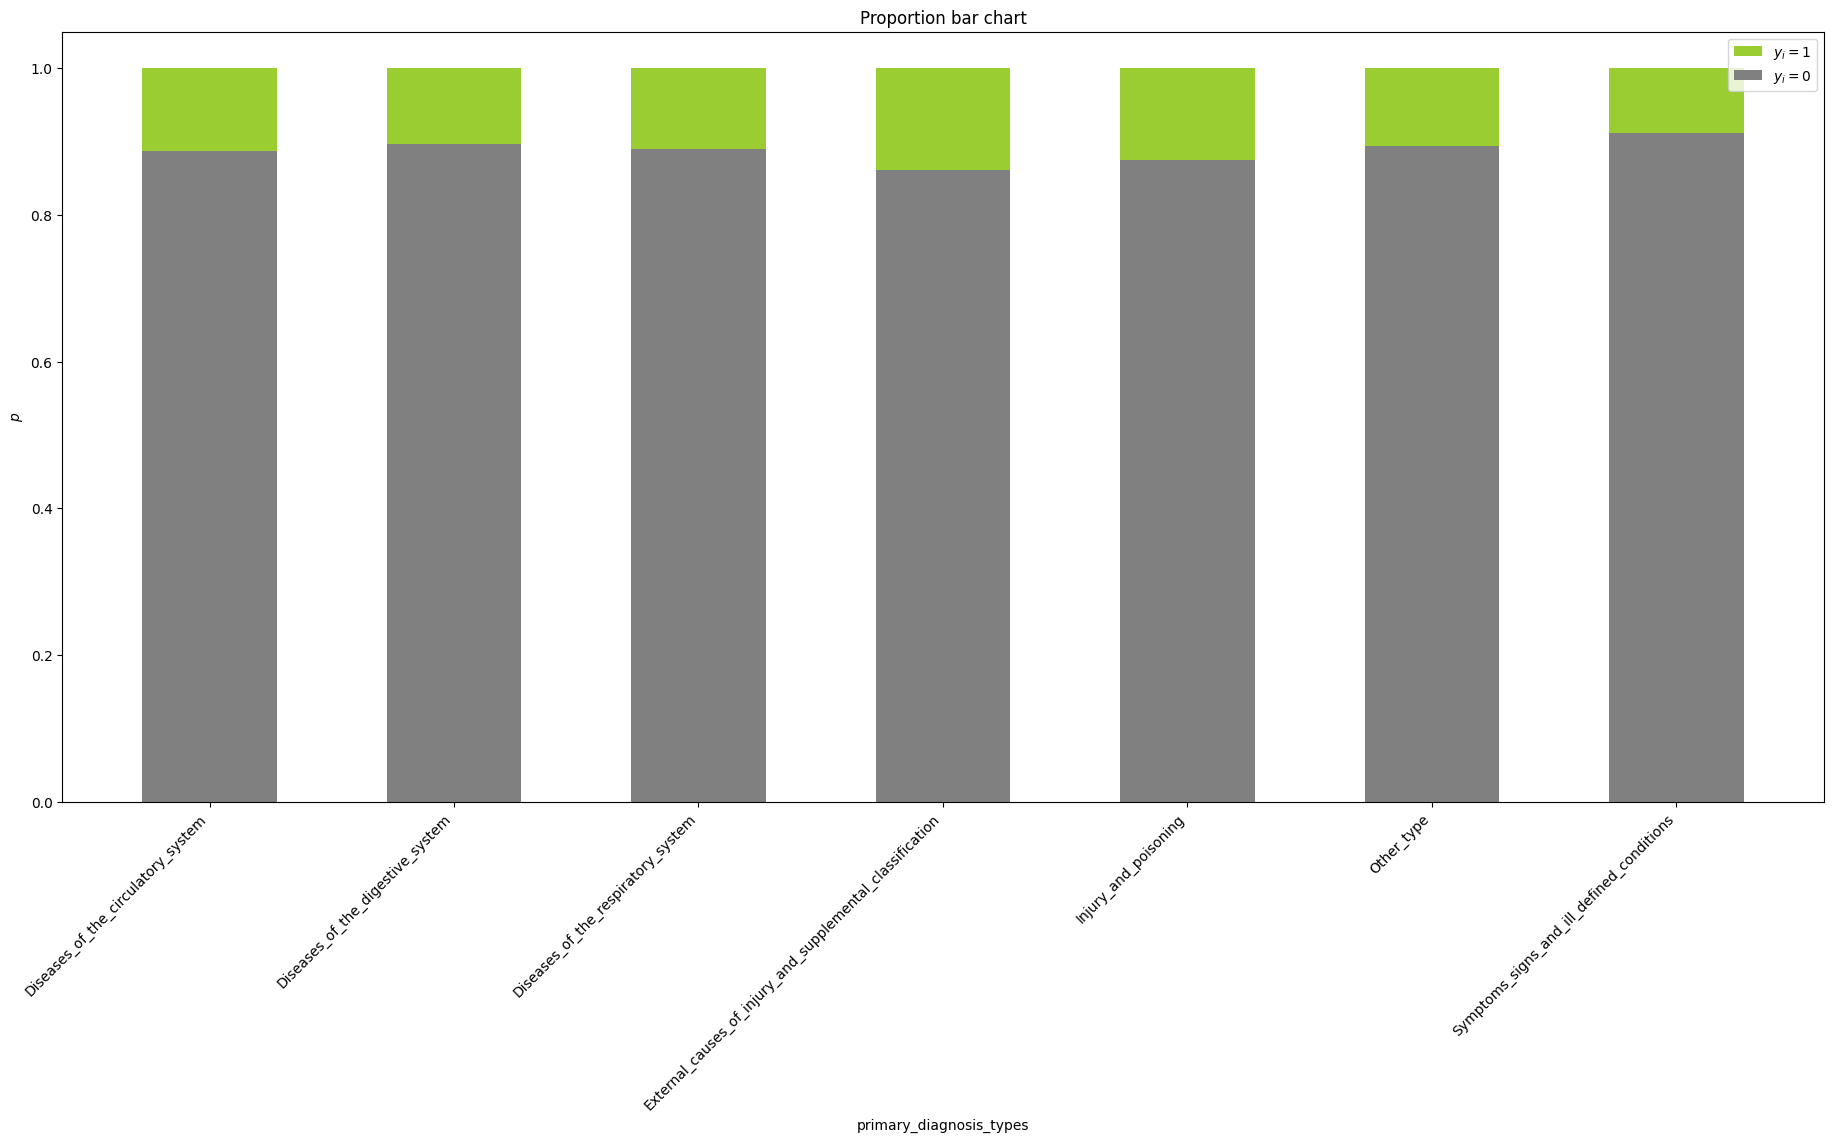

In [71]:
bar_charts_categorical(train, "primary_diagnosis_types", "readmitted_binary")

In [72]:
value_counts = train['secondary_diagnosis_types'].value_counts(normalize=True)
replace_secondary_diagnosis = value_counts[value_counts < 0.05].index

train['secondary_diagnosis_types'] = train['secondary_diagnosis_types'].replace(replace_secondary_diagnosis, 'Other_type')
train['secondary_diagnosis_types'].value_counts(normalize=True)

secondary_diagnosis_types
Diseases_of_the_circulatory_system                                     0.308819
Other_type                                                             0.276700
Endocrine_nutritional_and_metabolic_diseases_and_immunity_disorders    0.140421
Diseases_of_the_respiratory_system                                     0.100960
External_causes_of_injury_and_supplemental_classification              0.094376
Diseases_of_the_genitourinary_system                                   0.078724
Name: proportion, dtype: float64

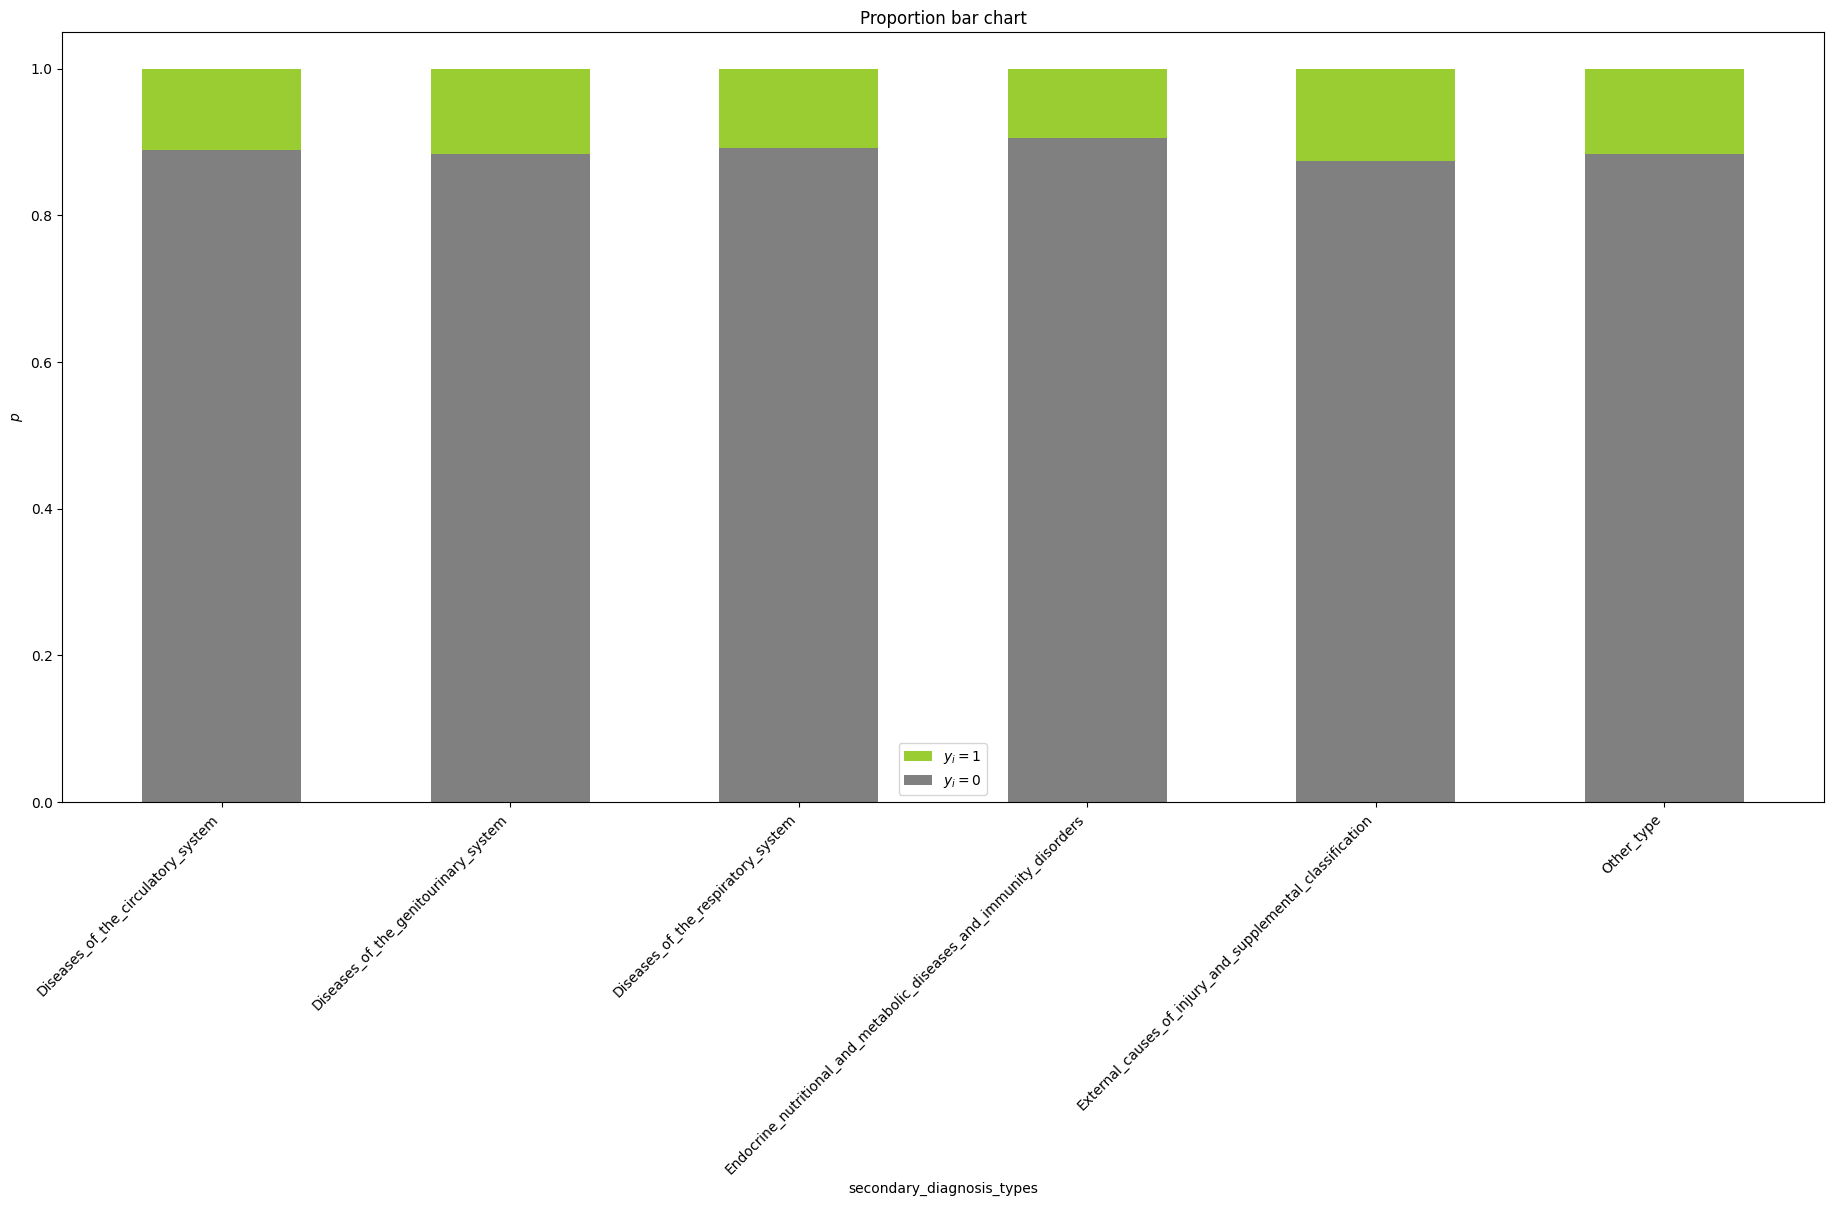

In [73]:
bar_charts_categorical(train, "secondary_diagnosis_types", "readmitted_binary")

In [74]:
value_counts = train['additional_diagnosis_types'].value_counts(normalize=True)
replace_additional_diagnosis = value_counts[value_counts < 0.05].index

train['additional_diagnosis_types'] = train['additional_diagnosis_types'].replace(replace_additional_diagnosis, 'Other_type')
train['additional_diagnosis_types'].value_counts(normalize=True)

additional_diagnosis_types
Diseases_of_the_circulatory_system                                     0.294219
Other_type                                                             0.255966
Endocrine_nutritional_and_metabolic_diseases_and_immunity_disorders    0.202678
External_causes_of_injury_and_supplemental_classification              0.118016
Diseases_of_the_respiratory_system                                     0.066385
Diseases_of_the_genitourinary_system                                   0.062735
Name: proportion, dtype: float64

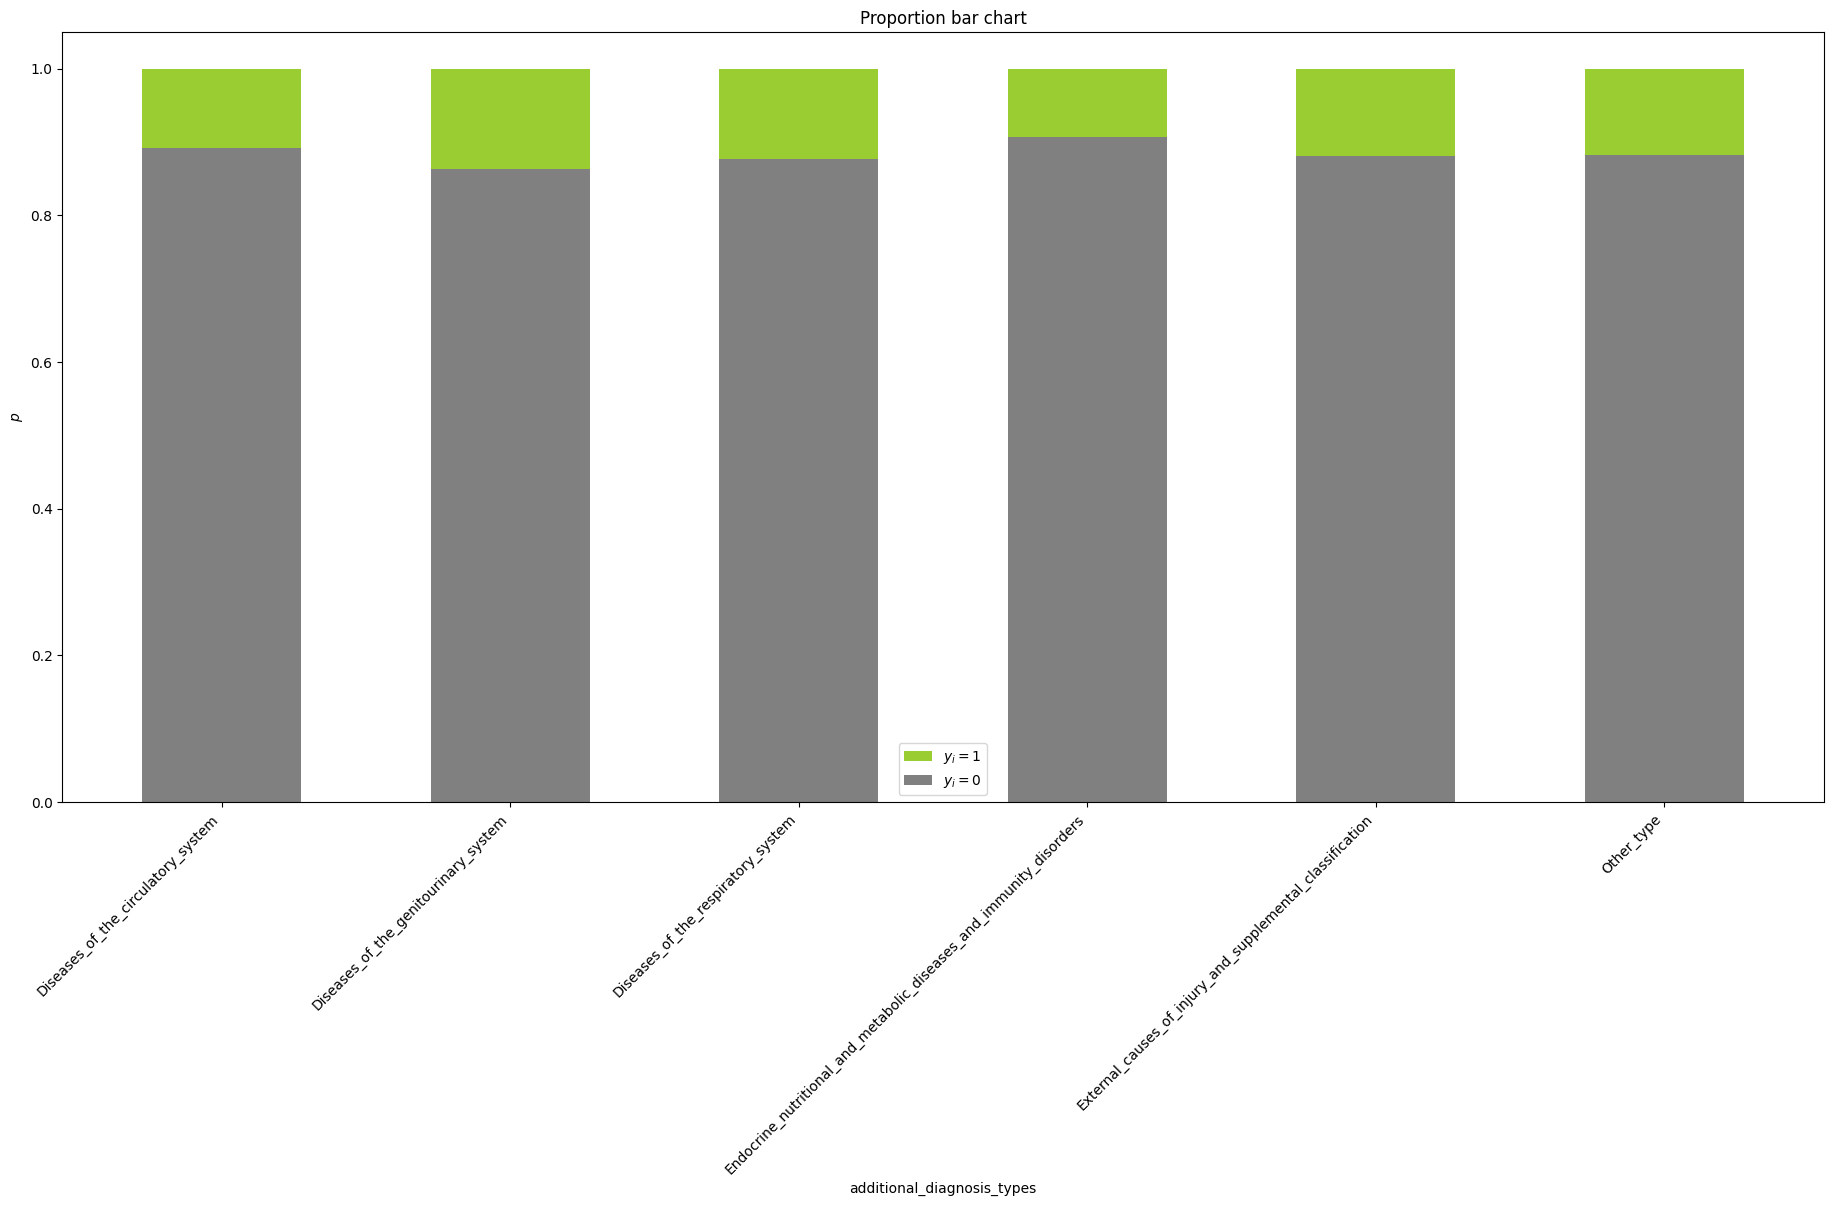

In [75]:
bar_charts_categorical(train, "additional_diagnosis_types", "readmitted_binary")

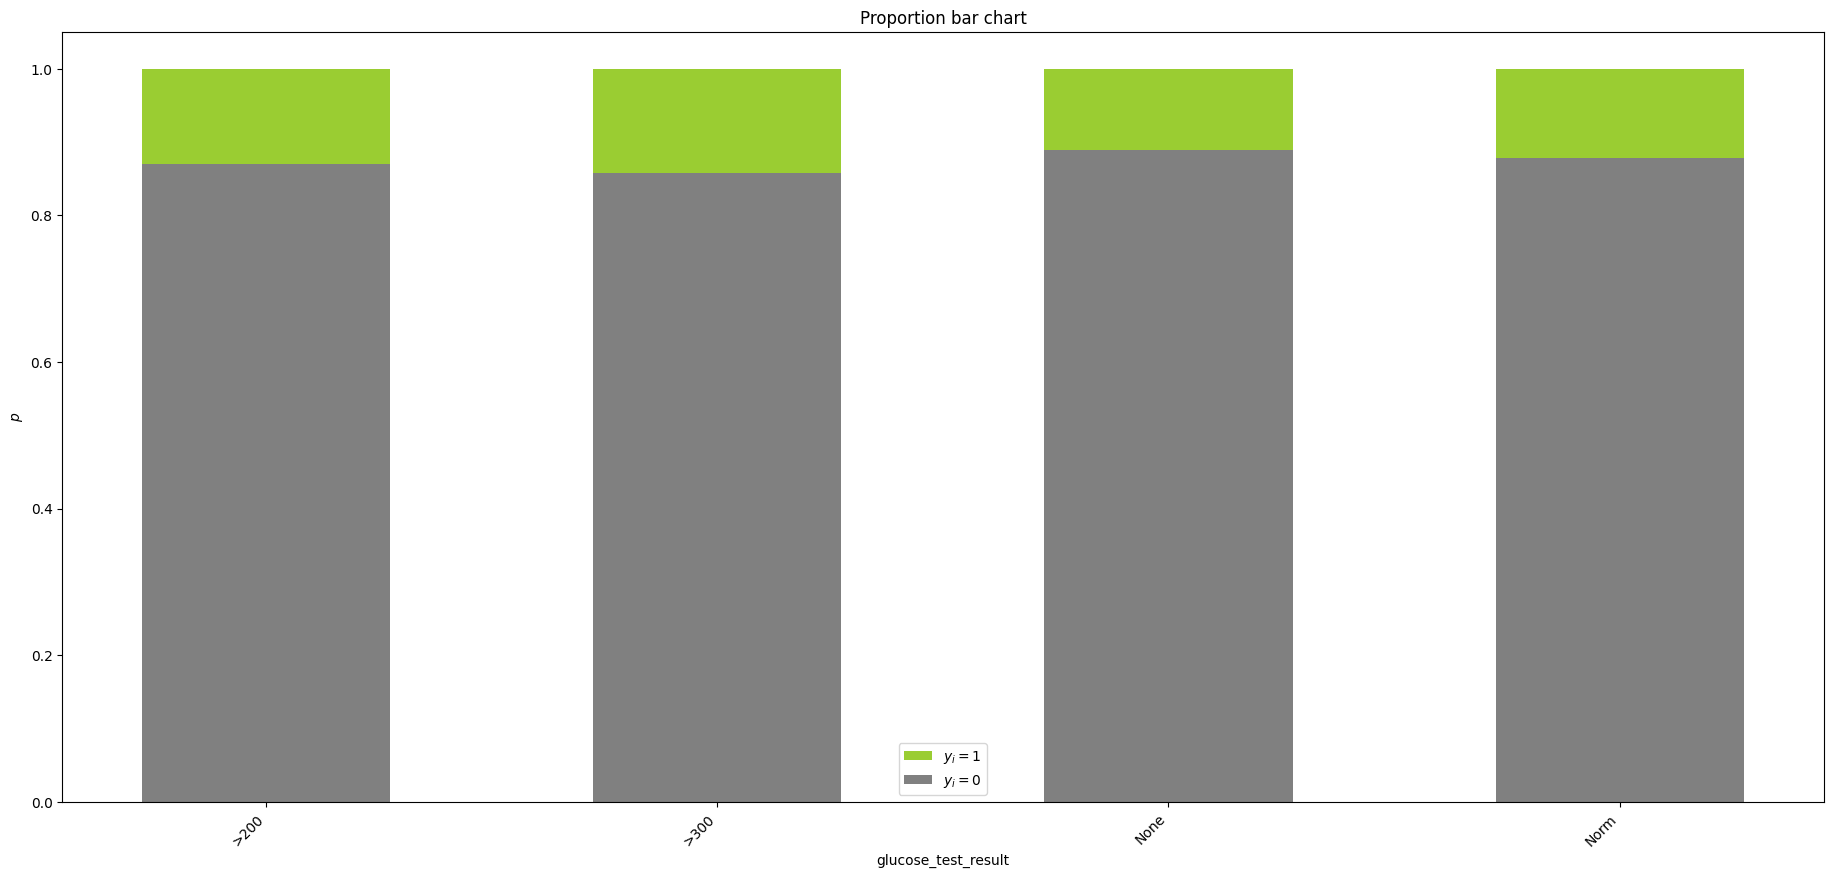

In [76]:
bar_charts_categorical(train, "glucose_test_result", "readmitted_binary")

In [77]:
train['glucose_test_result'].value_counts(normalize=True)

glucose_test_result
None    0.948228
Norm    0.025352
>200    0.014810
>300    0.011609
Name: proportion, dtype: float64

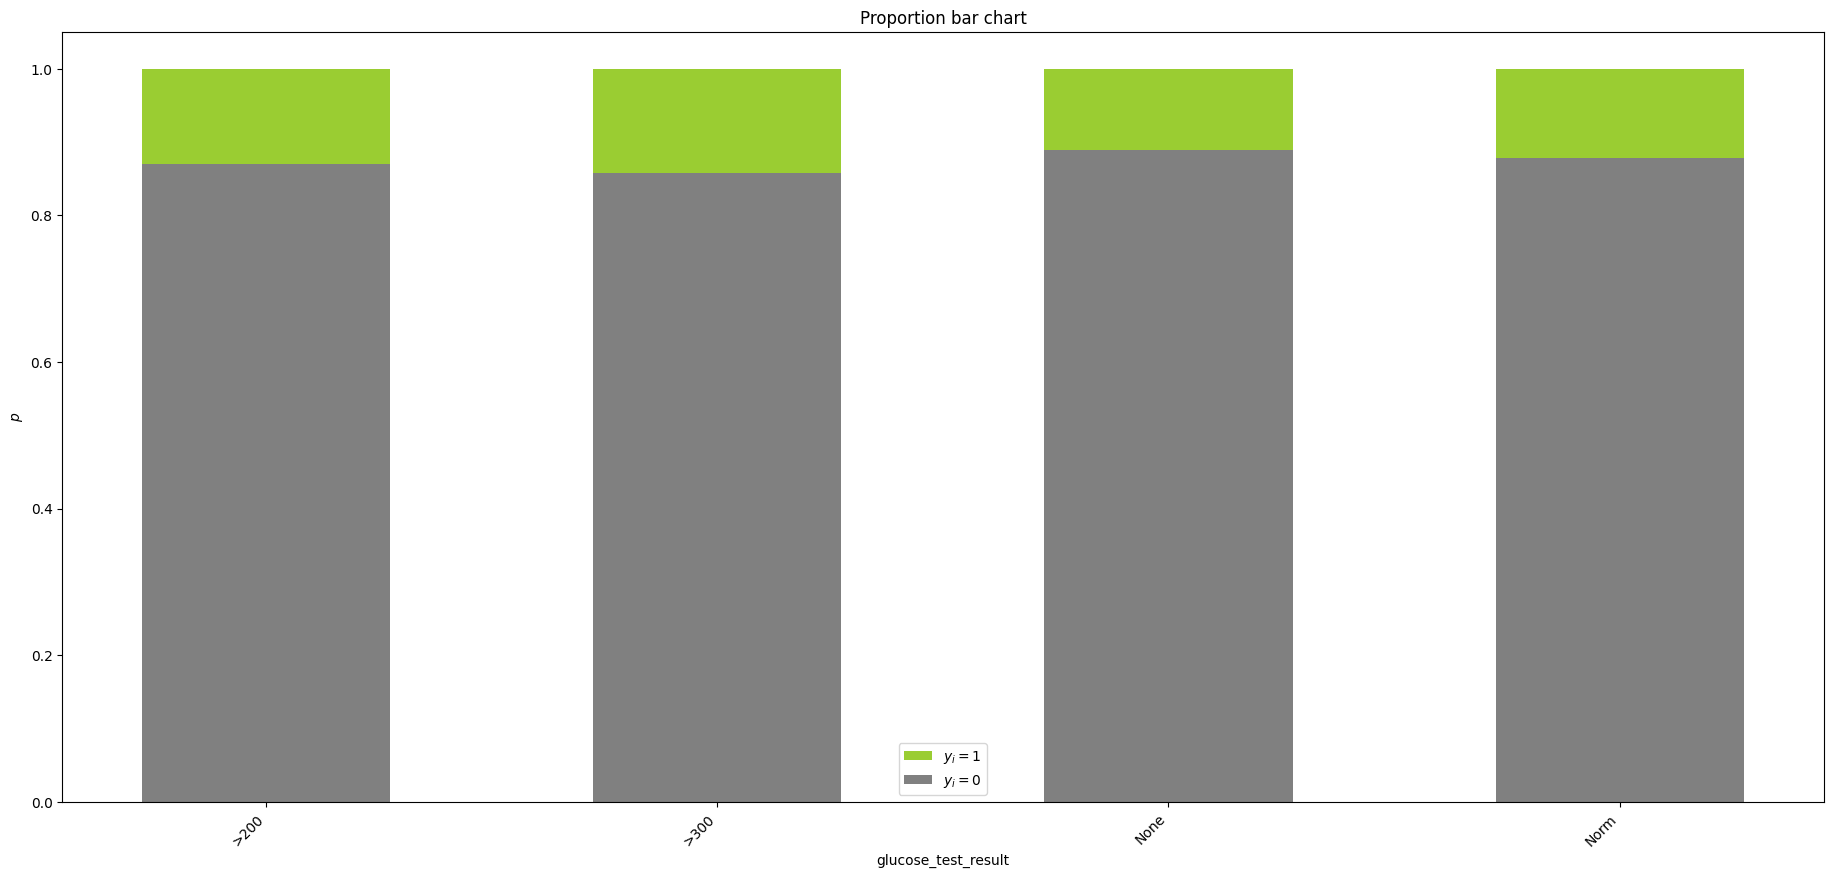

In [78]:
bar_charts_categorical(train, "glucose_test_result", "readmitted_binary")

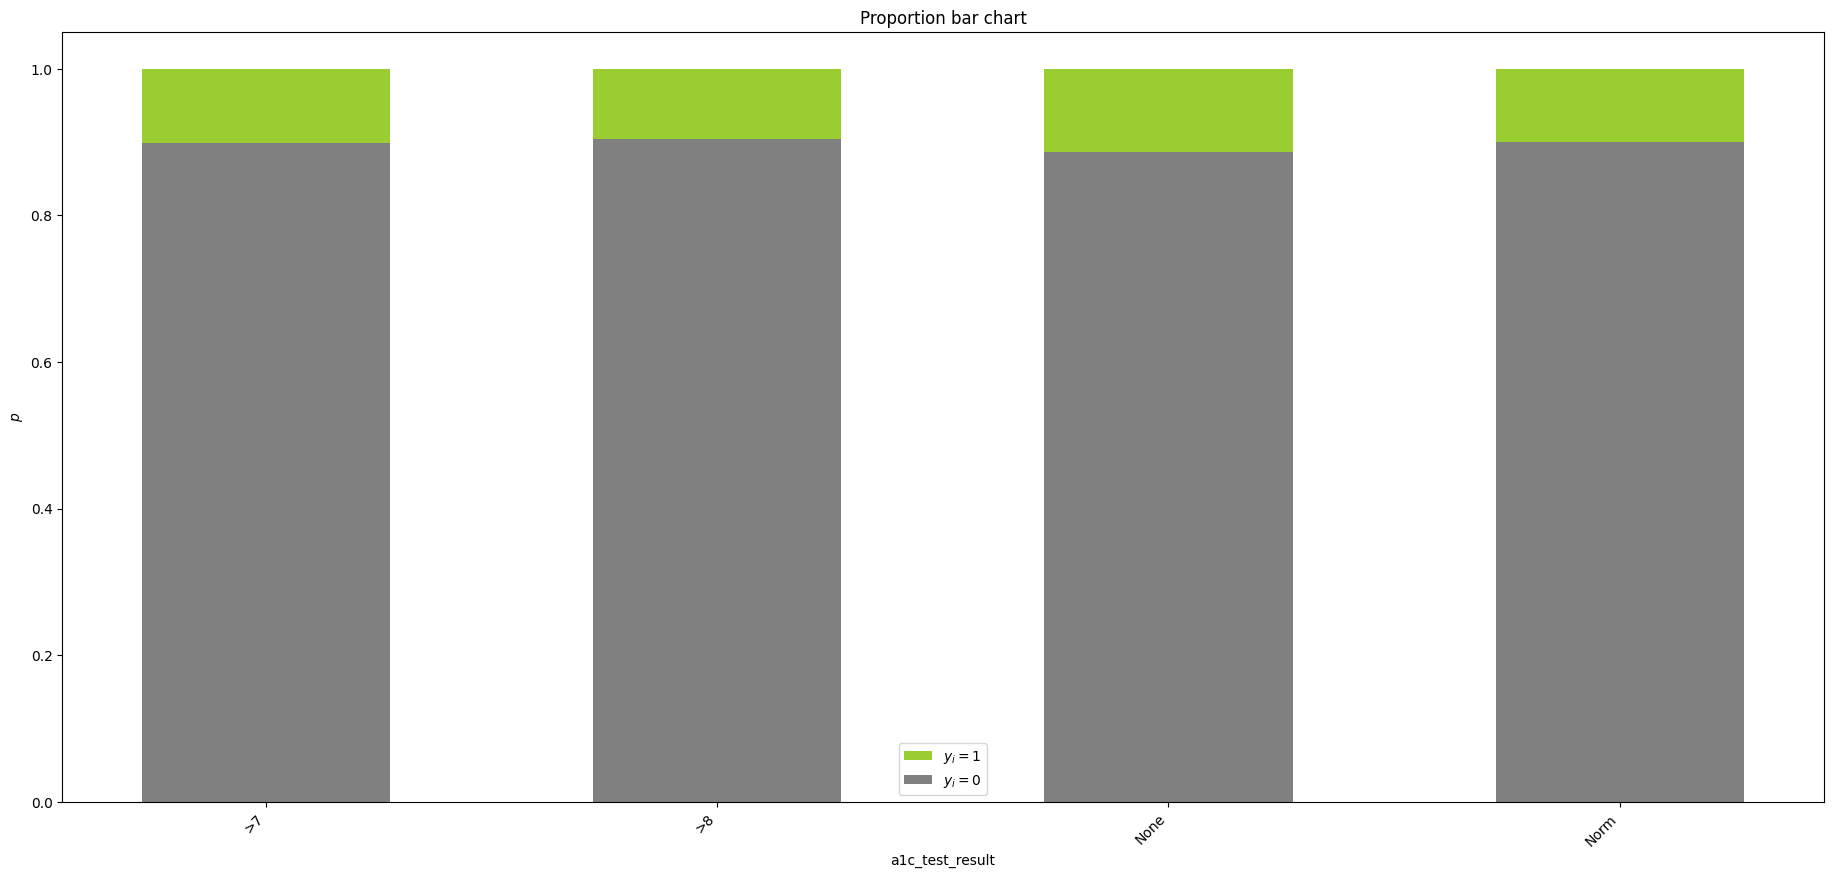

In [79]:
bar_charts_categorical(train, "a1c_test_result", "readmitted_binary")

In [80]:
train['a1c_test_result'].value_counts(normalize=True)

a1c_test_result
None    0.832725
>8      0.080086
Norm    0.049175
>7      0.038014
Name: proportion, dtype: float64

In [81]:
type(train['Midpoint_Age'].iloc[0])

numpy.float64

In [82]:
def label_pulse(row):
    if row['Midpoint_Age']==5.0:
        if row['average_pulse_bpm'] >= 70 and row['average_pulse_bpm'] <= 130:
            return 1
        else:
            return 0
    elif row['Midpoint_Age']<= 45.0 and row['Midpoint_Age'] >= 25.0:
        if row['average_pulse_bpm'] >= 60 and row['average_pulse_bpm'] <= 110:
            return 1
        else:
            return 0
    elif row['Midpoint_Age']==55.0:
        if row['average_pulse_bpm'] >= 60 and row['average_pulse_bpm'] <= 100:
            return 1
        else:
            return 0
    elif row['Midpoint_Age']>=65.0:
        if row['average_pulse_bpm'] >= 60 and row['average_pulse_bpm'] <= 95:
            return 1
        else:
            return 0
    else:
        if row['average_pulse_bpm'] >= 60 and row['average_pulse_bpm'] <= 100:
            return 1
        else:
            return 0

train['is_normal_pulse'] = train.apply(lambda row: label_pulse(row), axis=1)

In [83]:
train['is_normal_pulse'].value_counts(normalize=True)

is_normal_pulse
0    0.512044
1    0.487956
Name: proportion, dtype: float64

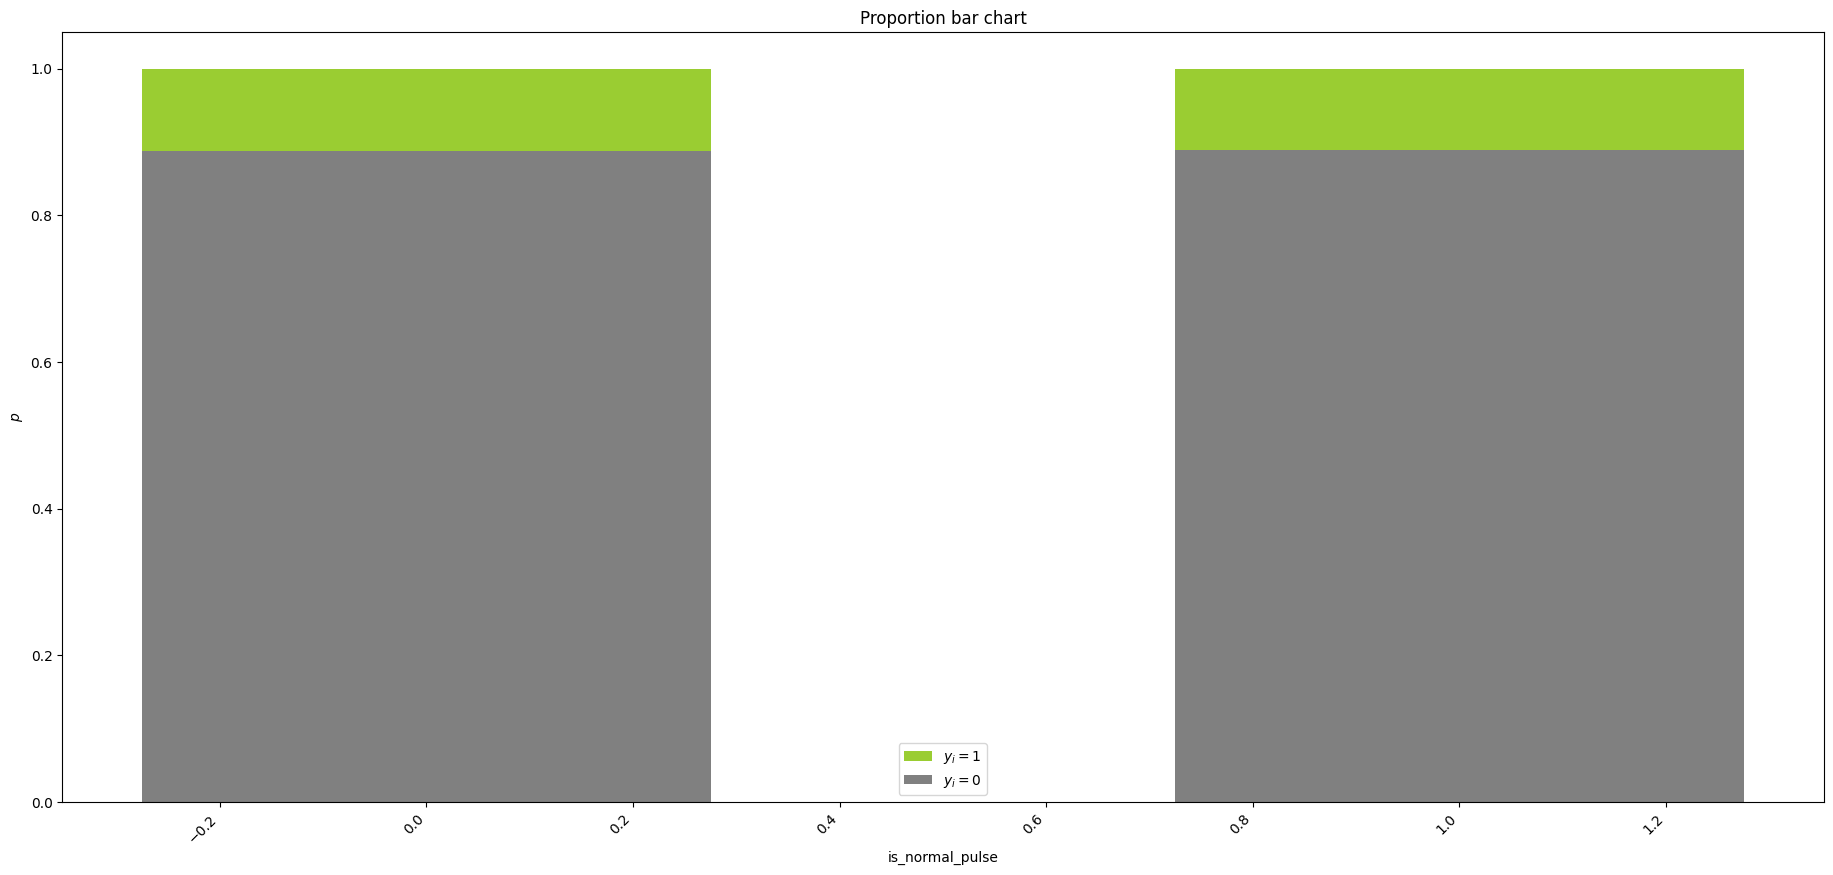

In [84]:
bar_charts_categorical(train, "is_normal_pulse", "readmitted_binary")

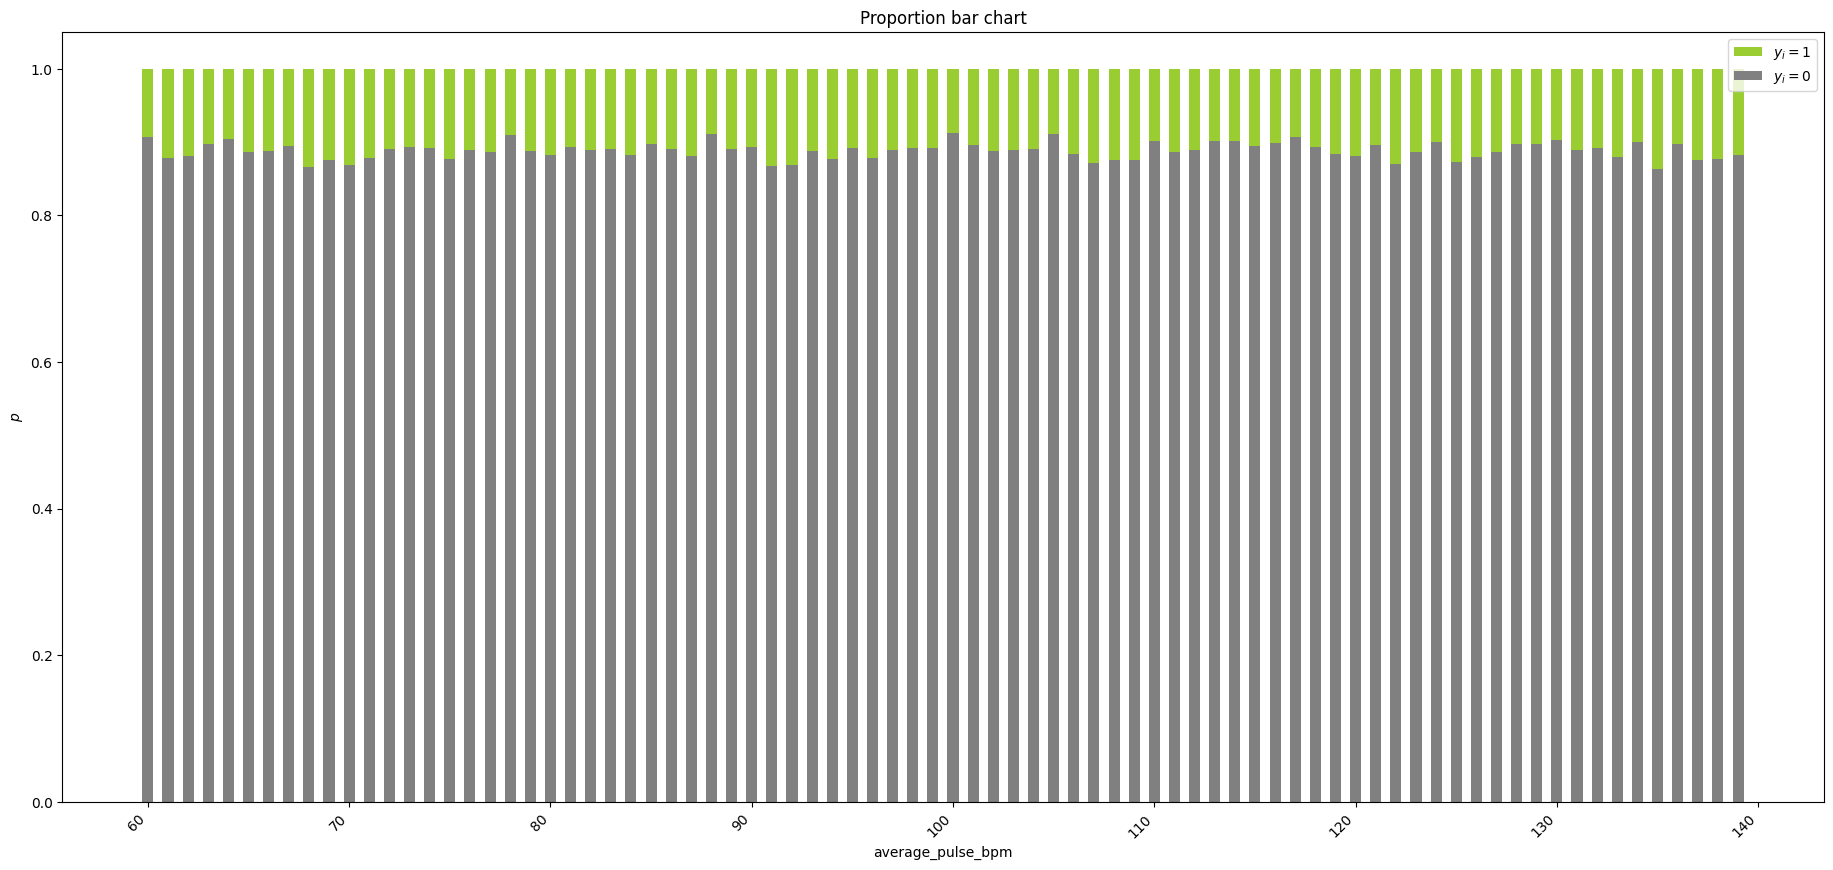

In [85]:
bar_charts_categorical(train, "average_pulse_bpm", "readmitted_binary")

In [86]:
train.drop(['patient_id'], axis = 1, inplace = True) 

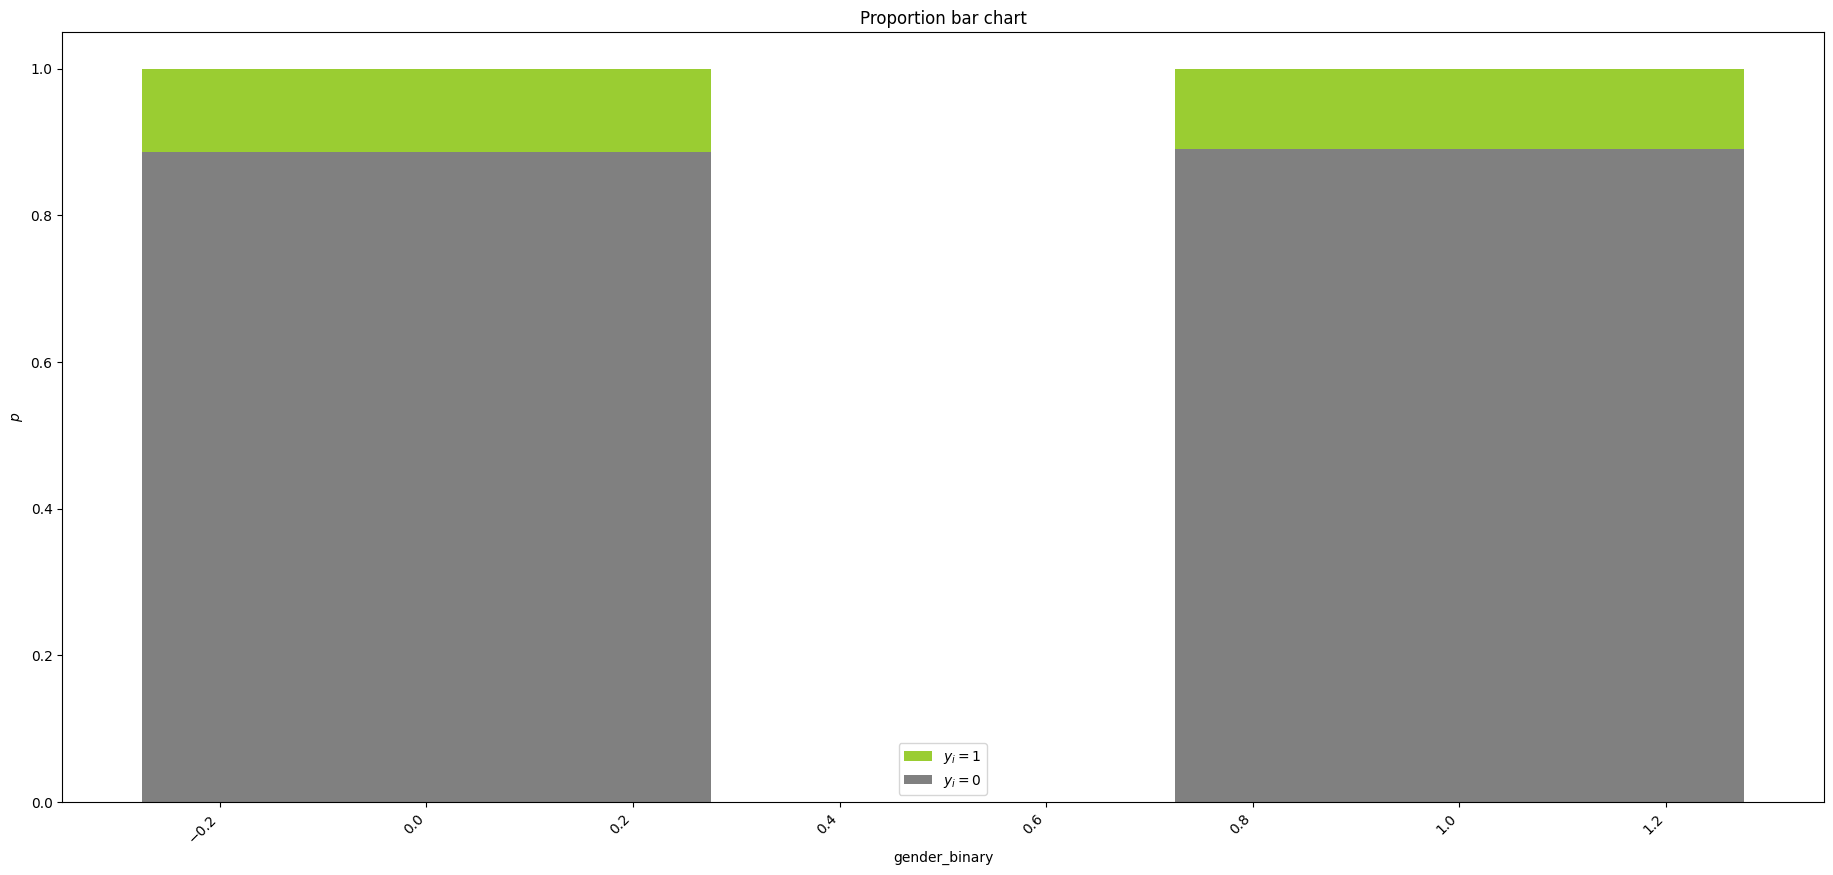

In [87]:
bar_charts_categorical(train, 'gender_binary', "readmitted_binary")

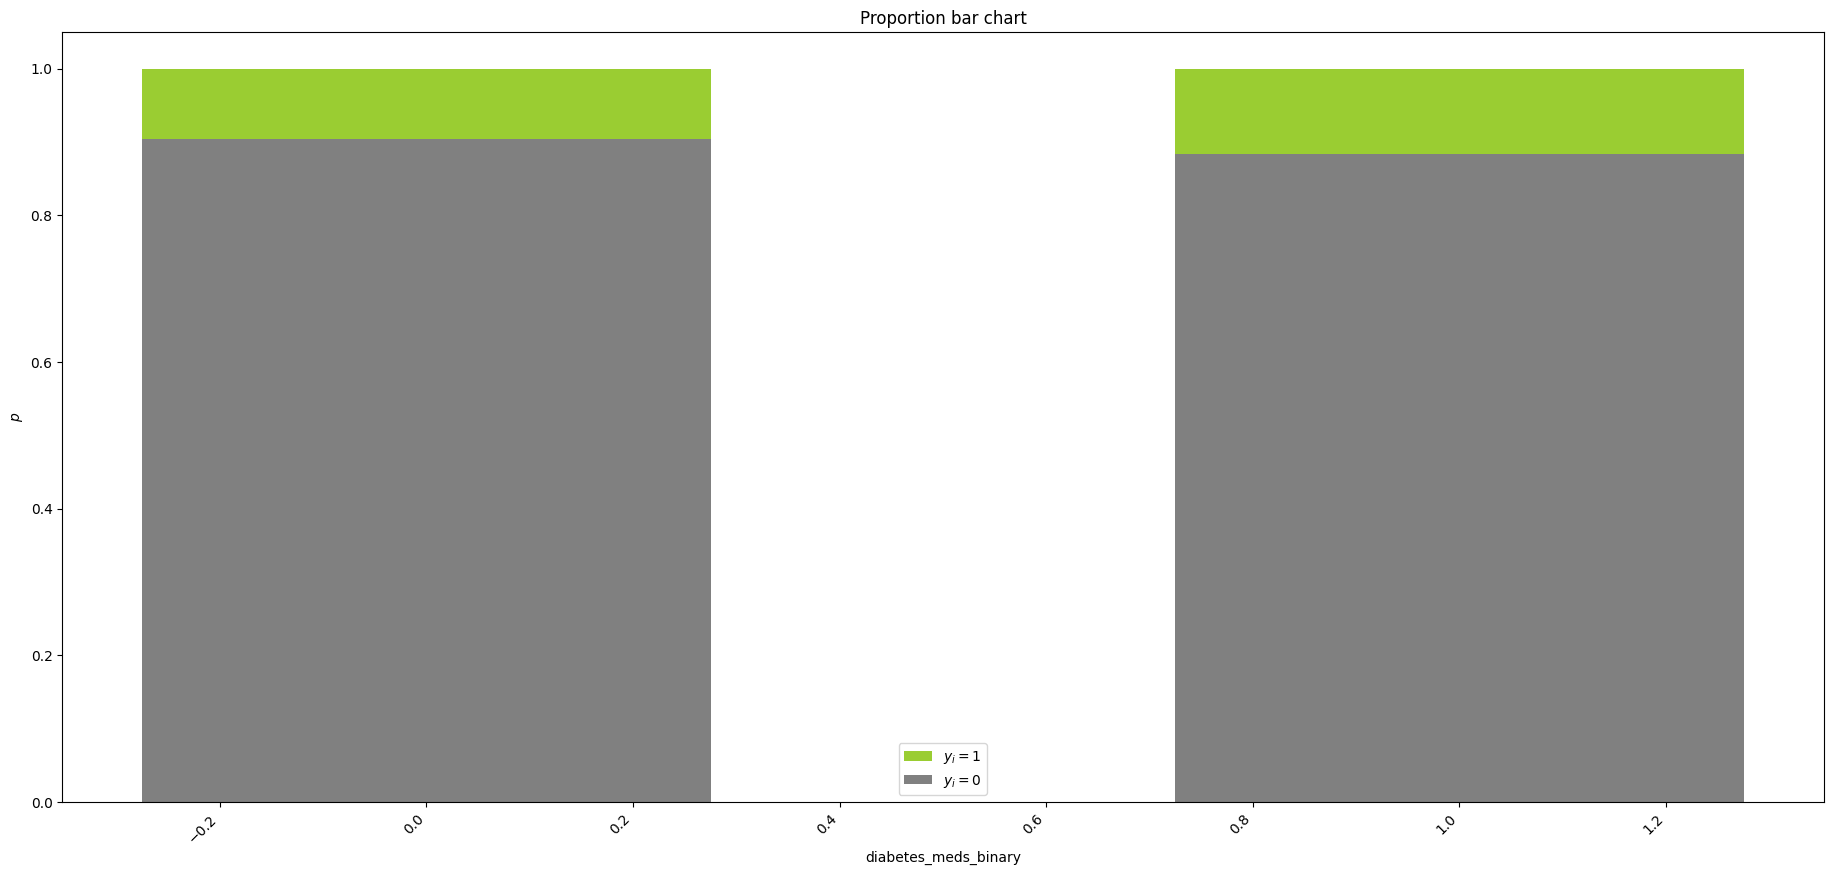

In [88]:
bar_charts_categorical(train, 'diabetes_meds_binary', "readmitted_binary")

In [89]:
train['diabetes_meds_binary'].value_counts()

diabetes_meds_binary
1    54890
0    16346
Name: count, dtype: int64

In [90]:
train['change_in_meds_binary'].value_counts()

change_in_meds_binary
0    38326
1    32910
Name: count, dtype: int64

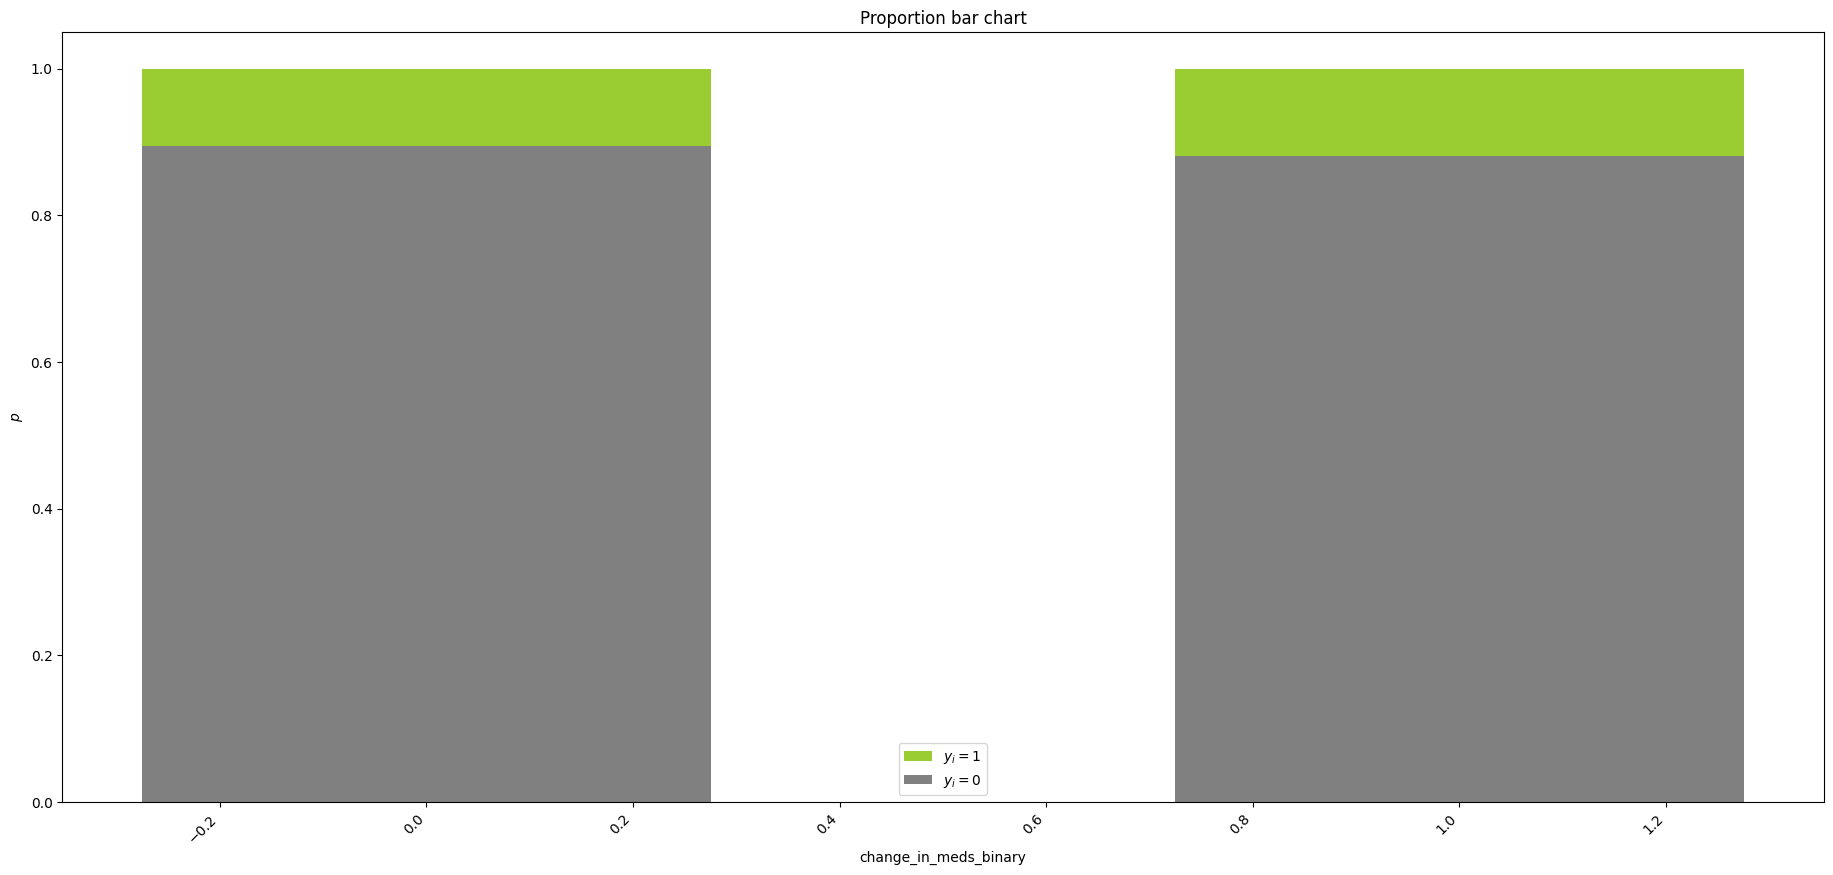

In [91]:
bar_charts_categorical(train, 'change_in_meds_binary', "readmitted_binary")

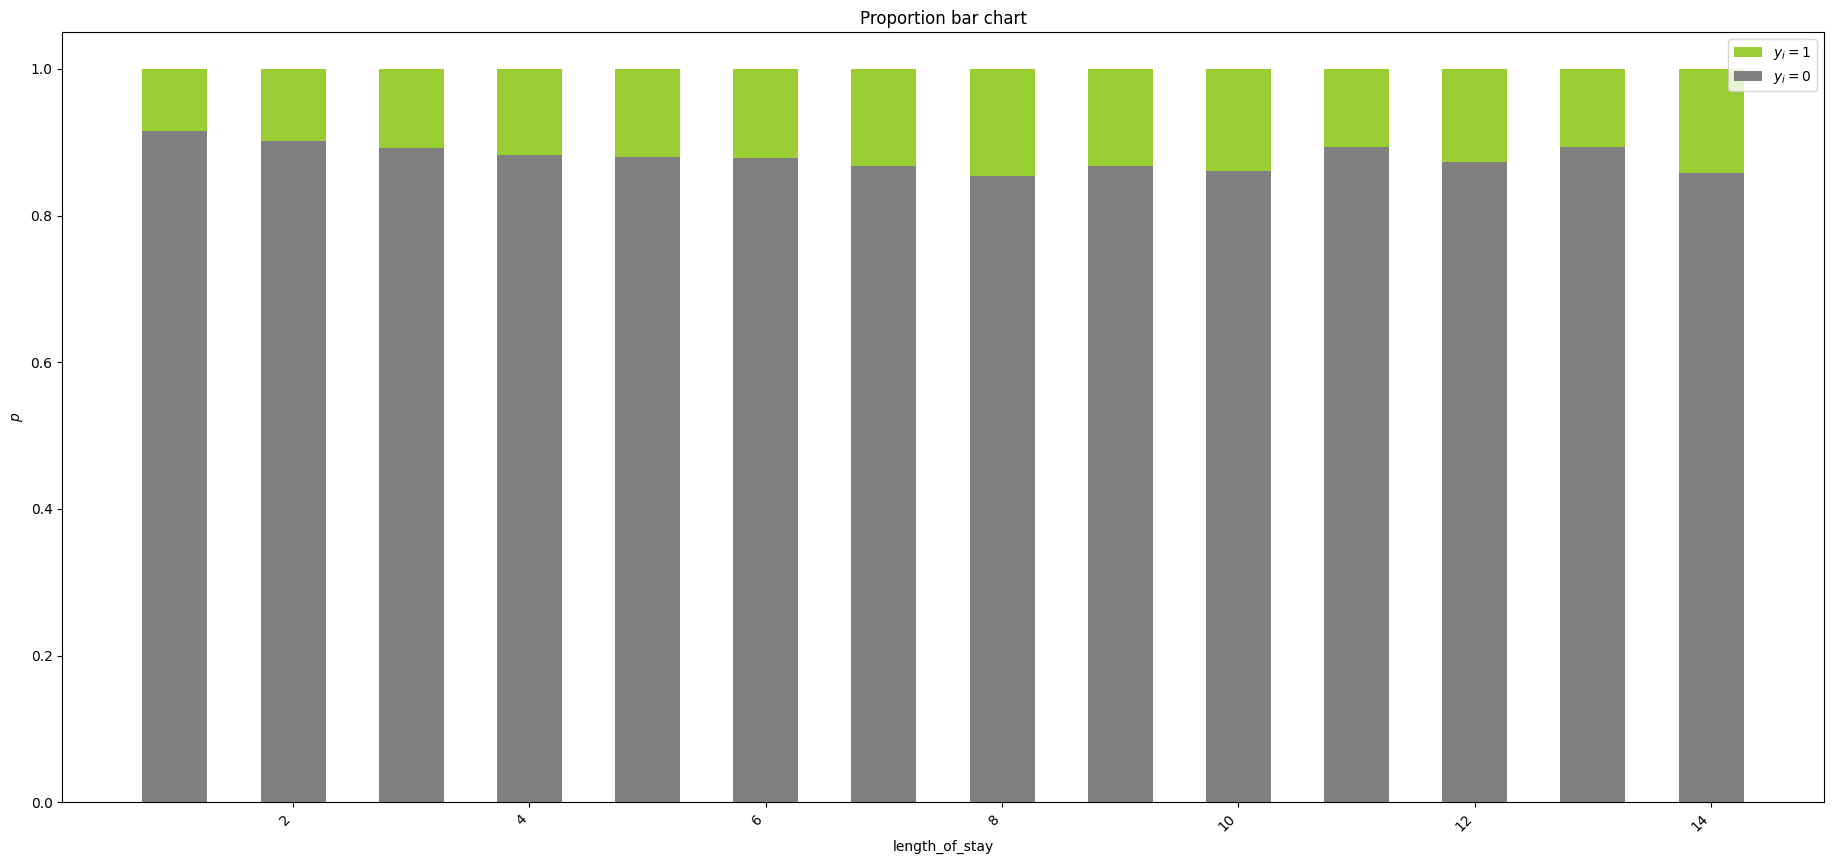

In [92]:
bar_charts_categorical(train, 'length_of_stay', "readmitted_binary")

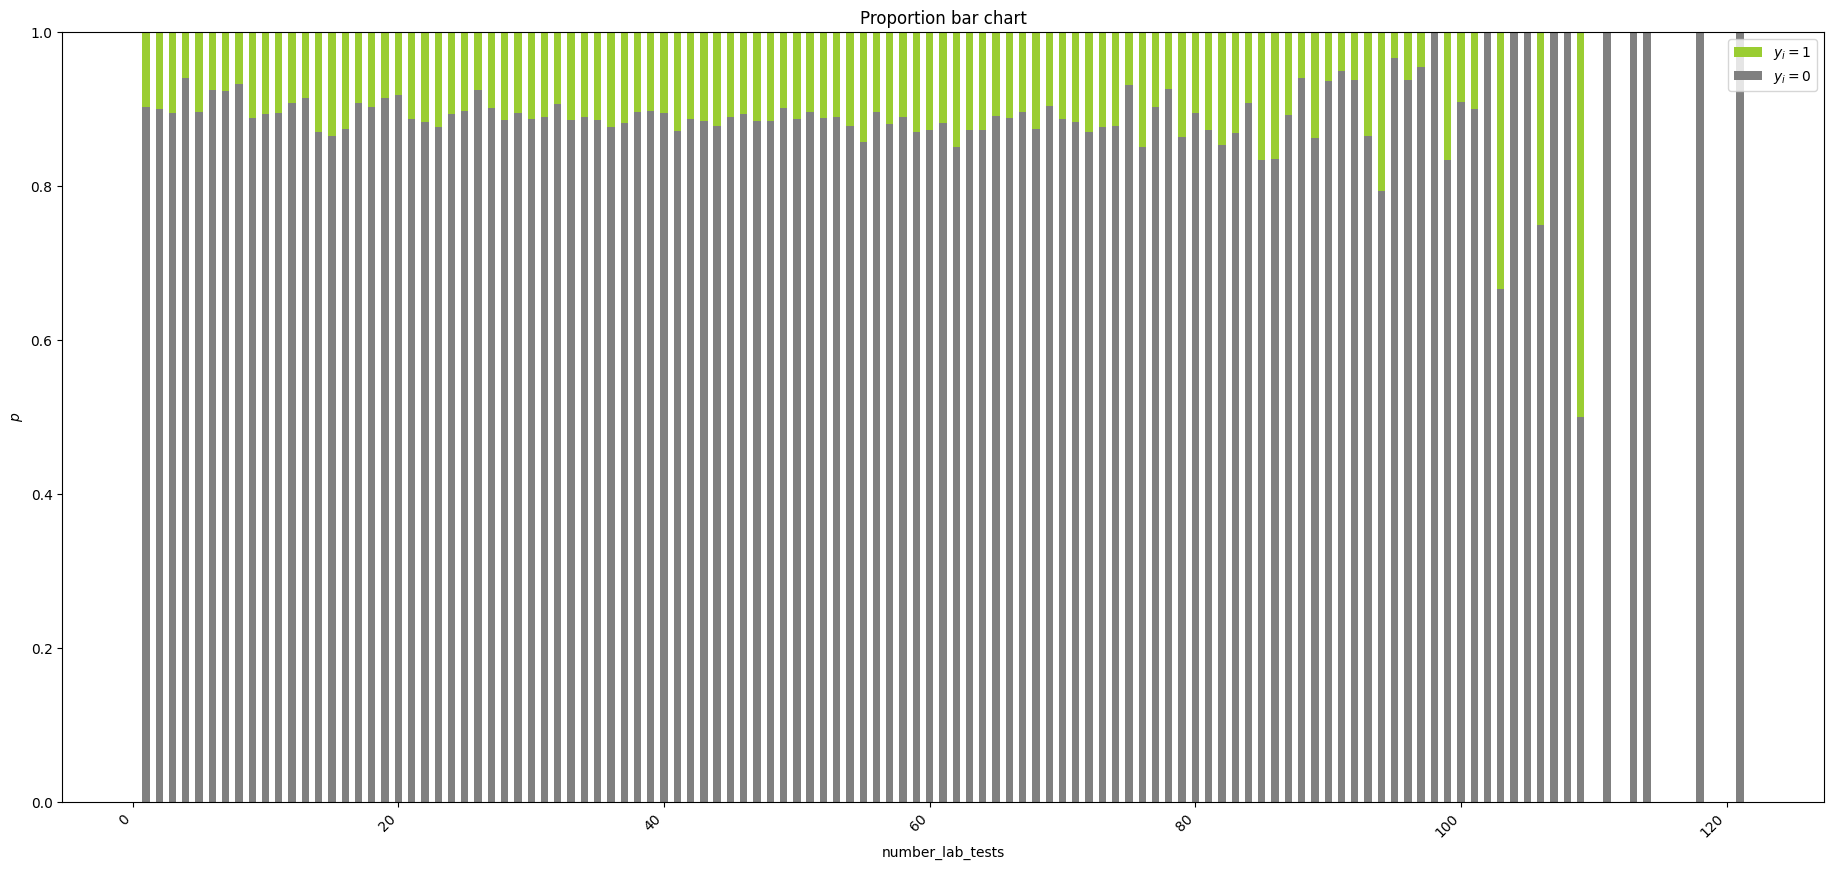

In [93]:
bar_charts_categorical(train, 'number_lab_tests', "readmitted_binary")

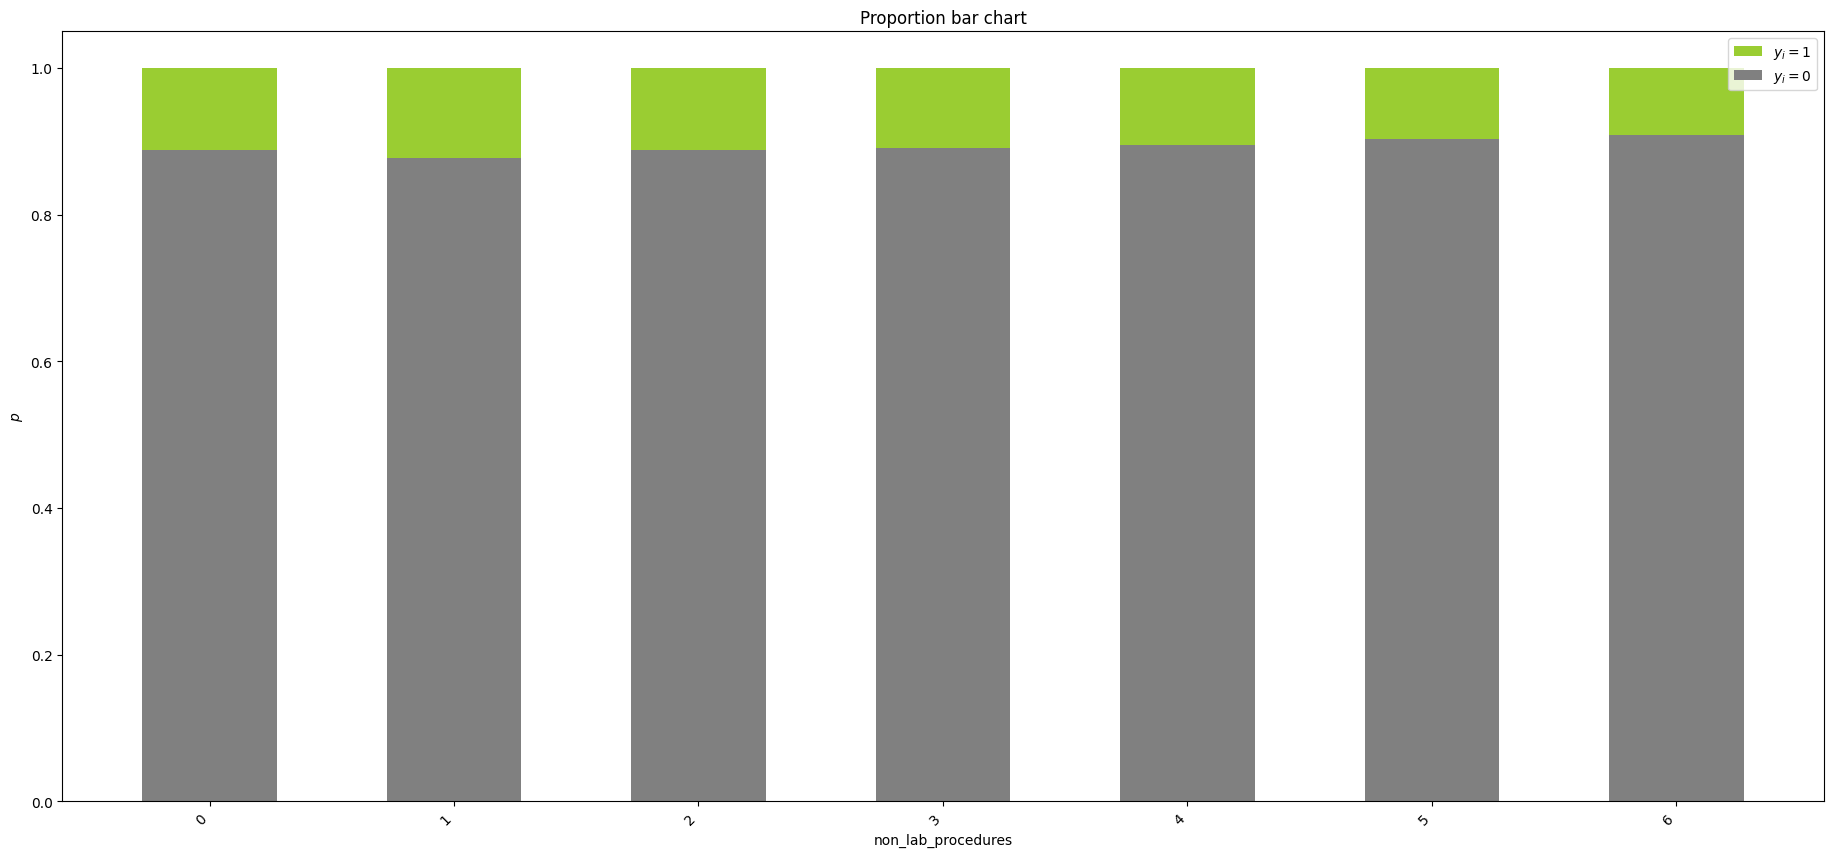

In [94]:
bar_charts_categorical(train, 'non_lab_procedures', "readmitted_binary")

In [95]:
train['non_lab_procedures'].value_counts(normalize=True)

non_lab_procedures
0    0.458083
1    0.204012
2    0.124881
3    0.092846
6    0.048824
4    0.041103
5    0.030252
Name: proportion, dtype: float64

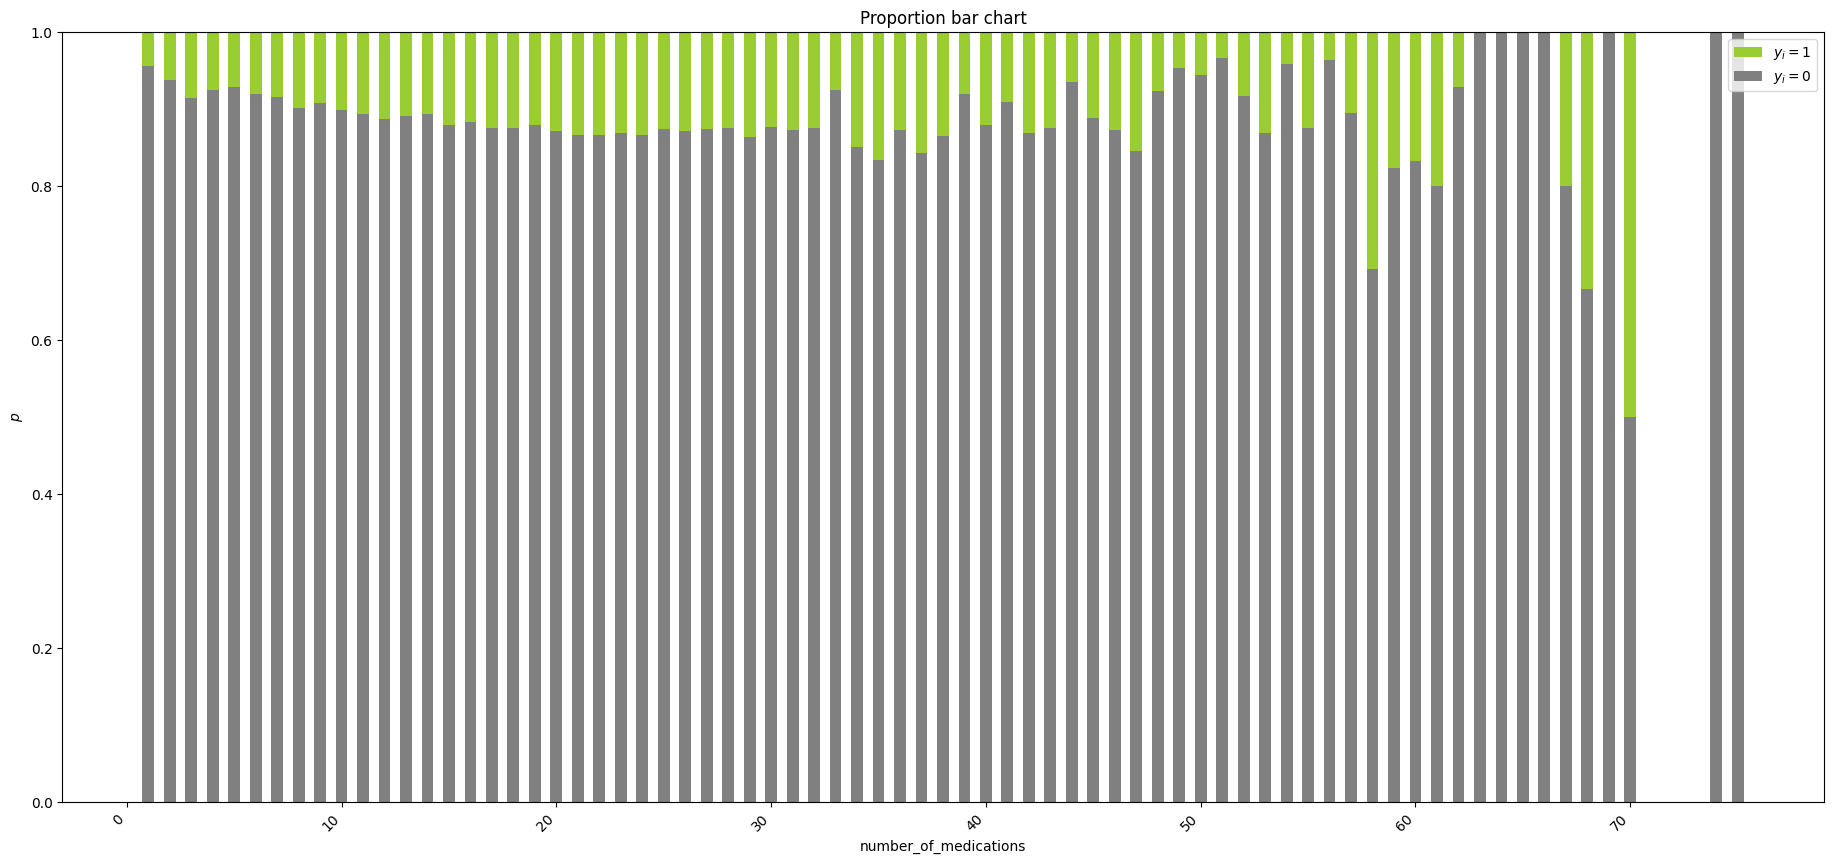

In [96]:
bar_charts_categorical(train, 'number_of_medications', "readmitted_binary")

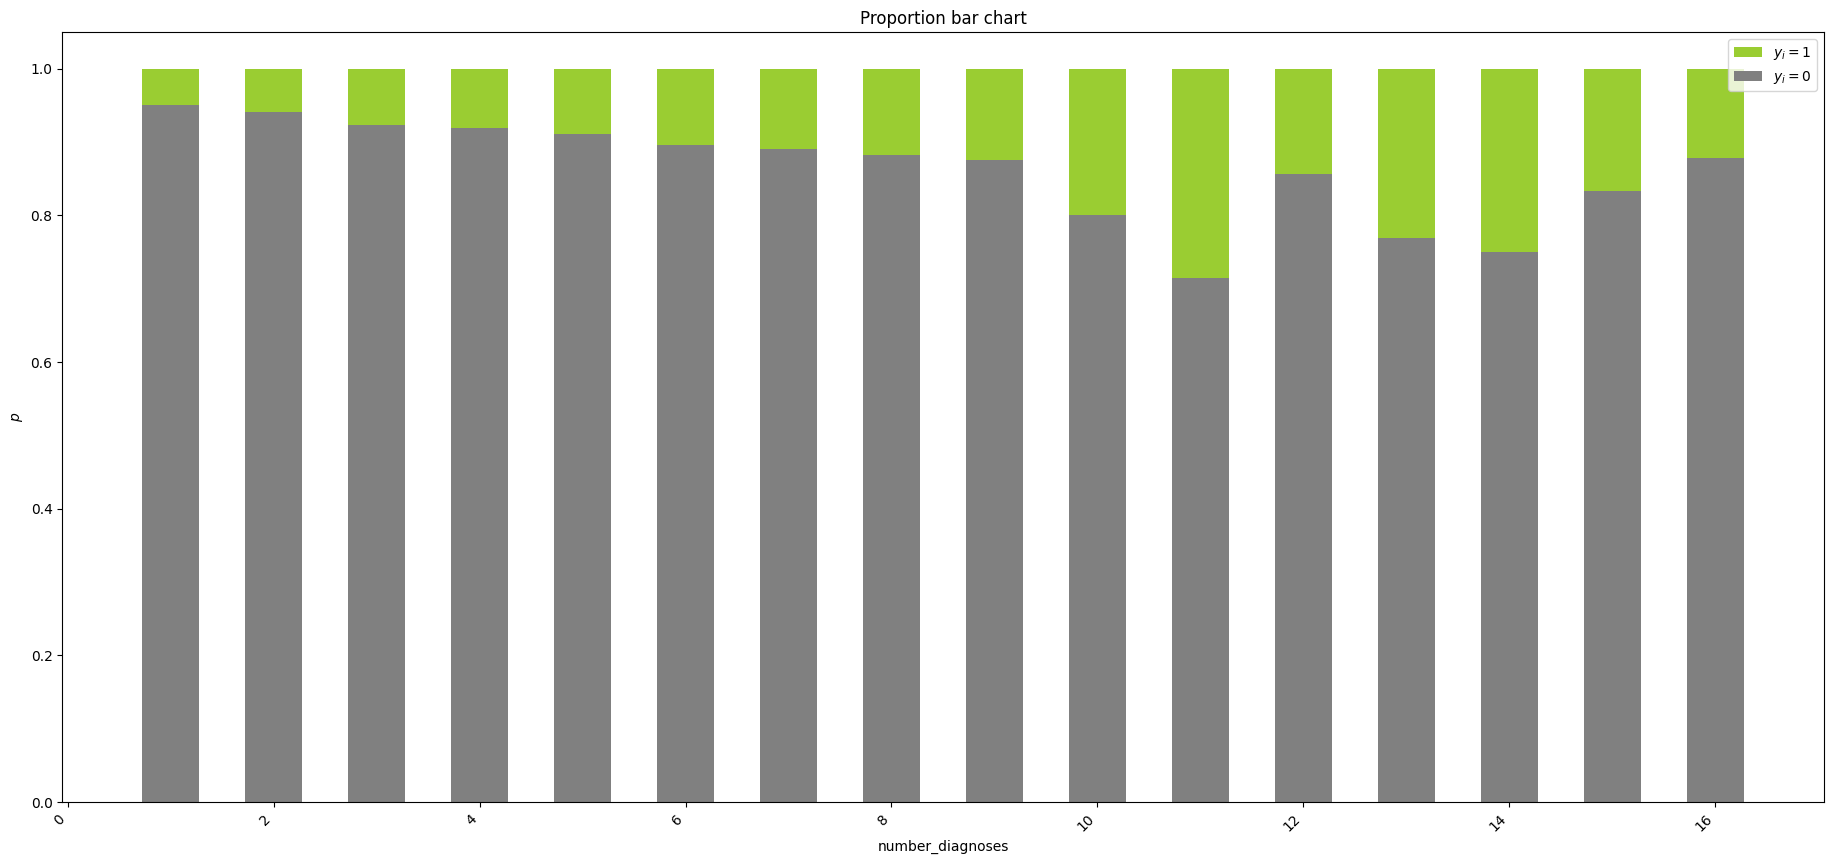

In [97]:
bar_charts_categorical(train, 'number_diagnoses', "readmitted_binary")

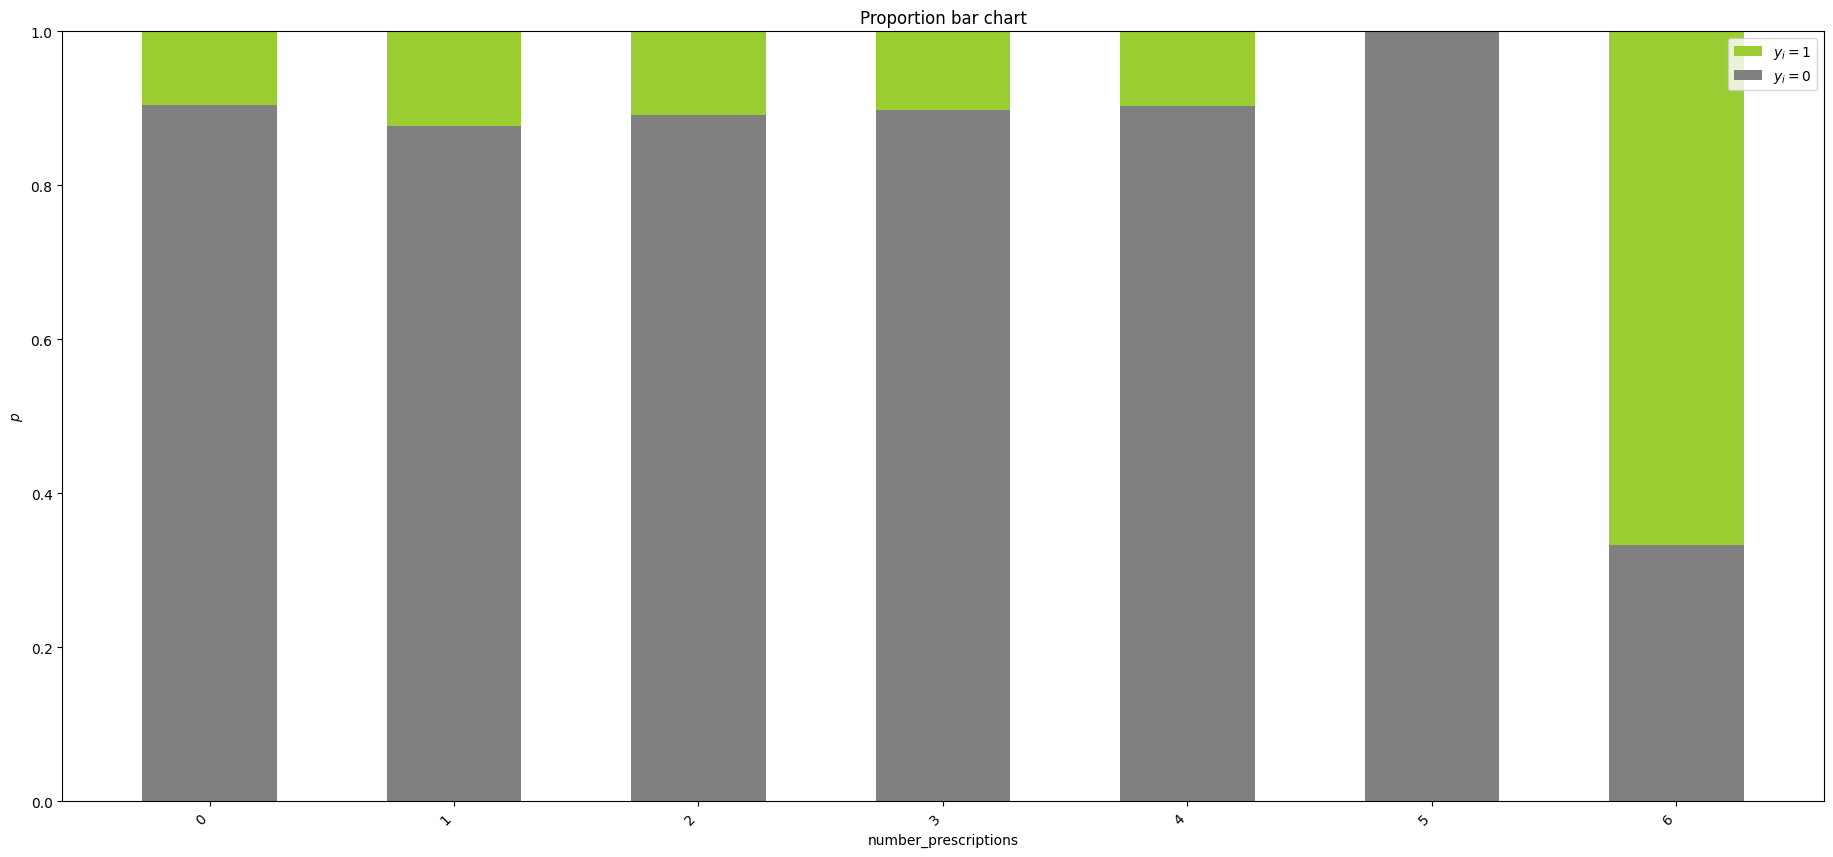

In [98]:
bar_charts_categorical(train, 'number_prescriptions', "readmitted_binary")

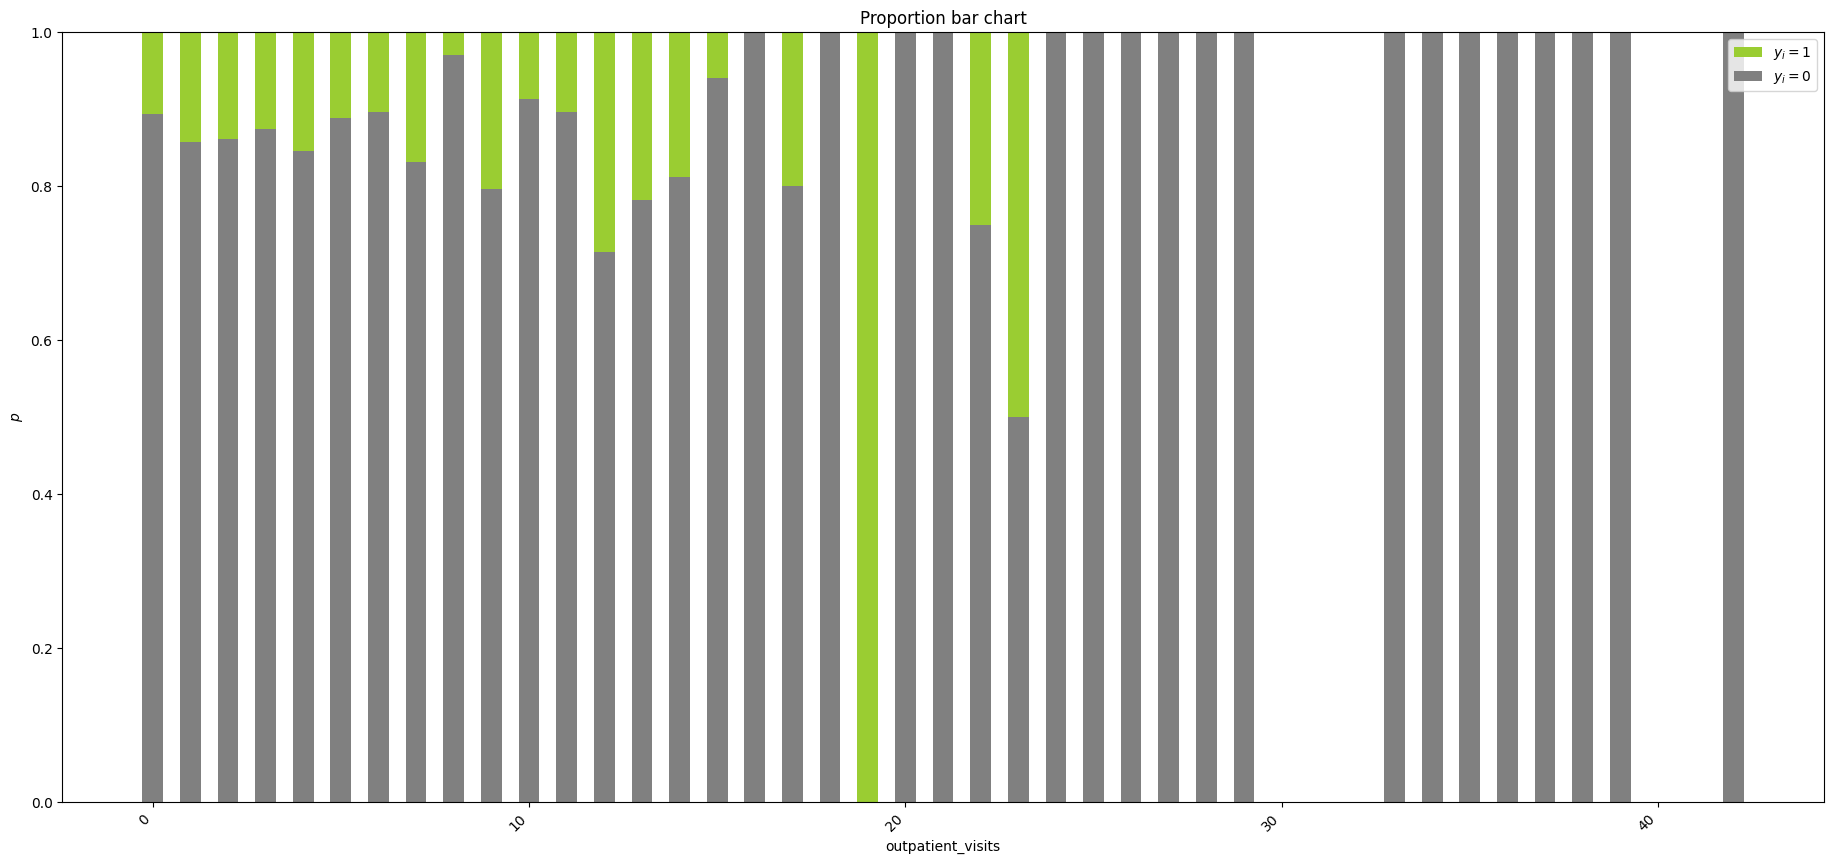

In [99]:
bar_charts_categorical(train, 'outpatient_visits', "readmitted_binary")

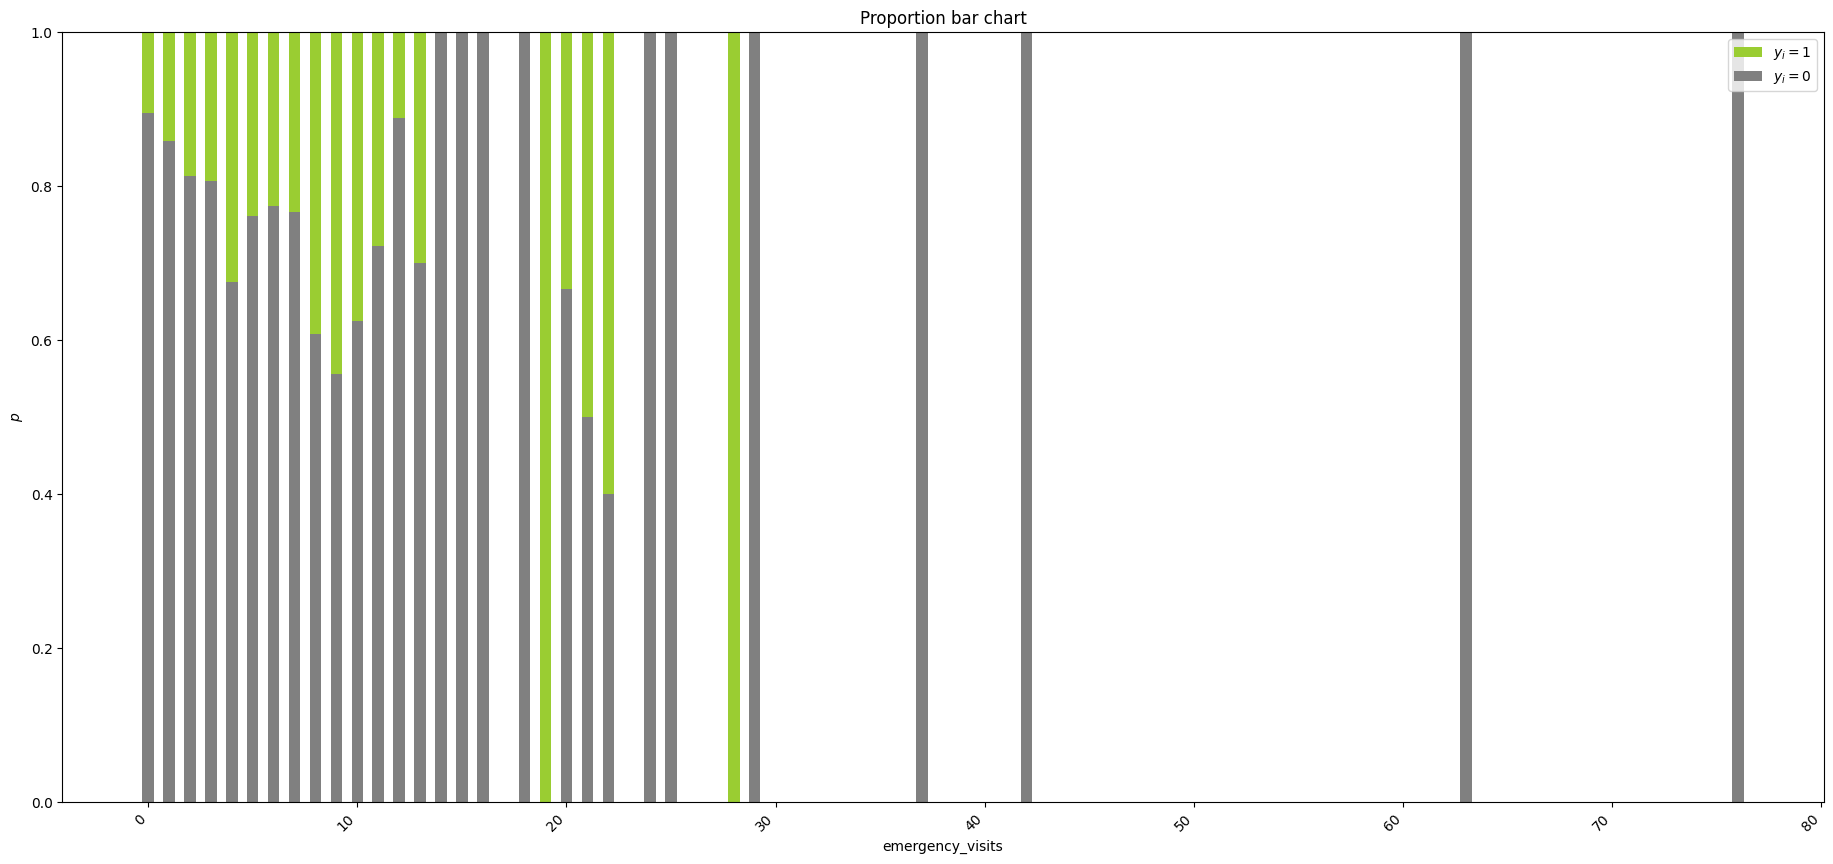

In [100]:
bar_charts_categorical(train, 'emergency_visits', "readmitted_binary")

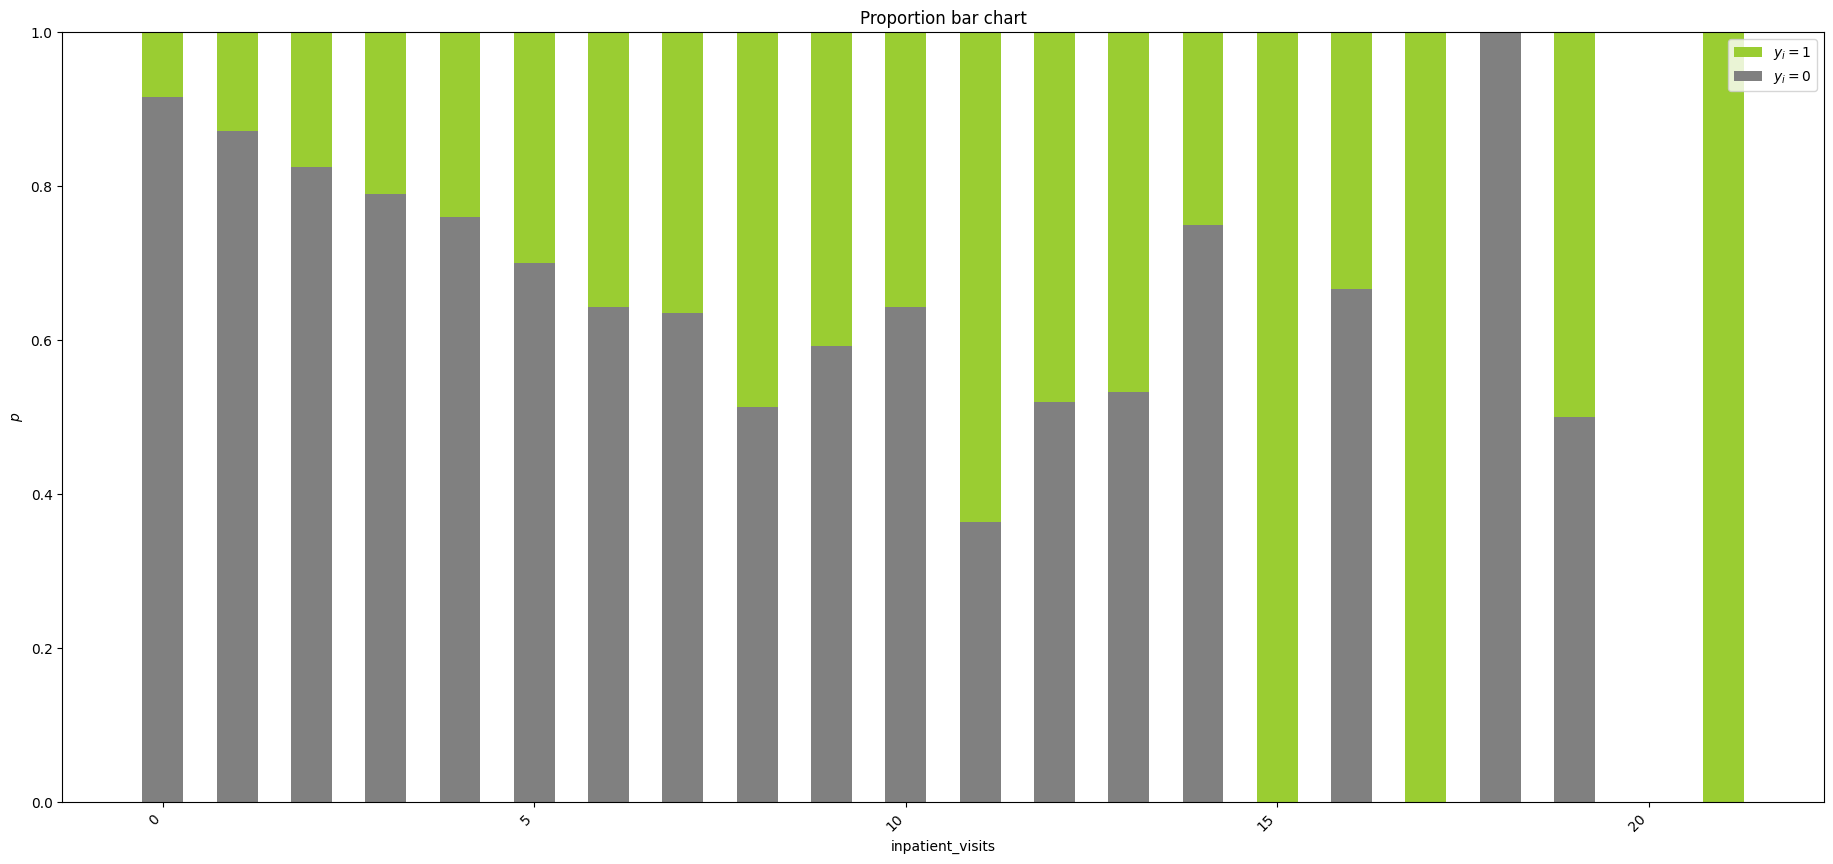

In [101]:
bar_charts_categorical(train, 'inpatient_visits', "readmitted_binary")

In [102]:
# Select the features
features = ['average_pulse_bpm', 'length_of_stay', 'number_lab_tests', 'non_lab_procedures',
            'number_of_medications', 'number_diagnoses', 'number_prescriptions', 'outpatient_visits',
            'emergency_visits', 'inpatient_visits']

for i in features:
    correlation, p_value = pointbiserialr(train[i], train['readmitted_binary'].map({'Yes': True, 'No': False}))
    print(i)
    print(f'Correlation: {correlation}')
    print('')

average_pulse_bpm
Correlation: 0.00015244874294701382

length_of_stay
Correlation: 0.041071472402752086

number_lab_tests
Correlation: 0.018789446962013706

non_lab_procedures
Correlation: -0.014872653389925562

number_of_medications
Correlation: 0.03744604352242986

number_diagnoses
Correlation: 0.051739054047743906

number_prescriptions
Correlation: 0.0021529357106976413

outpatient_visits
Correlation: 0.018379638304906153

emergency_visits
Correlation: 0.05931370511526261

inpatient_visits
Correlation: 0.166710282305087



# Train Test Split

In [103]:
X = train.drop(['readmitted_binary', 'readmitted_multiclass'], axis=1)
y_binary = train['readmitted_binary']

In [104]:
X_train_bin, X_val_bin, y_train_bin, y_val_bin = train_test_split(X, y_binary,
                                                  test_size = 0.25, 
                                                  random_state = 0, 
                                                  stratify = y_binary, 
                                                  shuffle = True)

# Outliers

In [105]:
metric_features=['outpatient_visits','emergency_visits','inpatient_visits','average_pulse_bpm','length_of_stay','number_lab_tests',
                'non_lab_procedures','number_of_medications','number_diagnoses','number_prescriptions']           

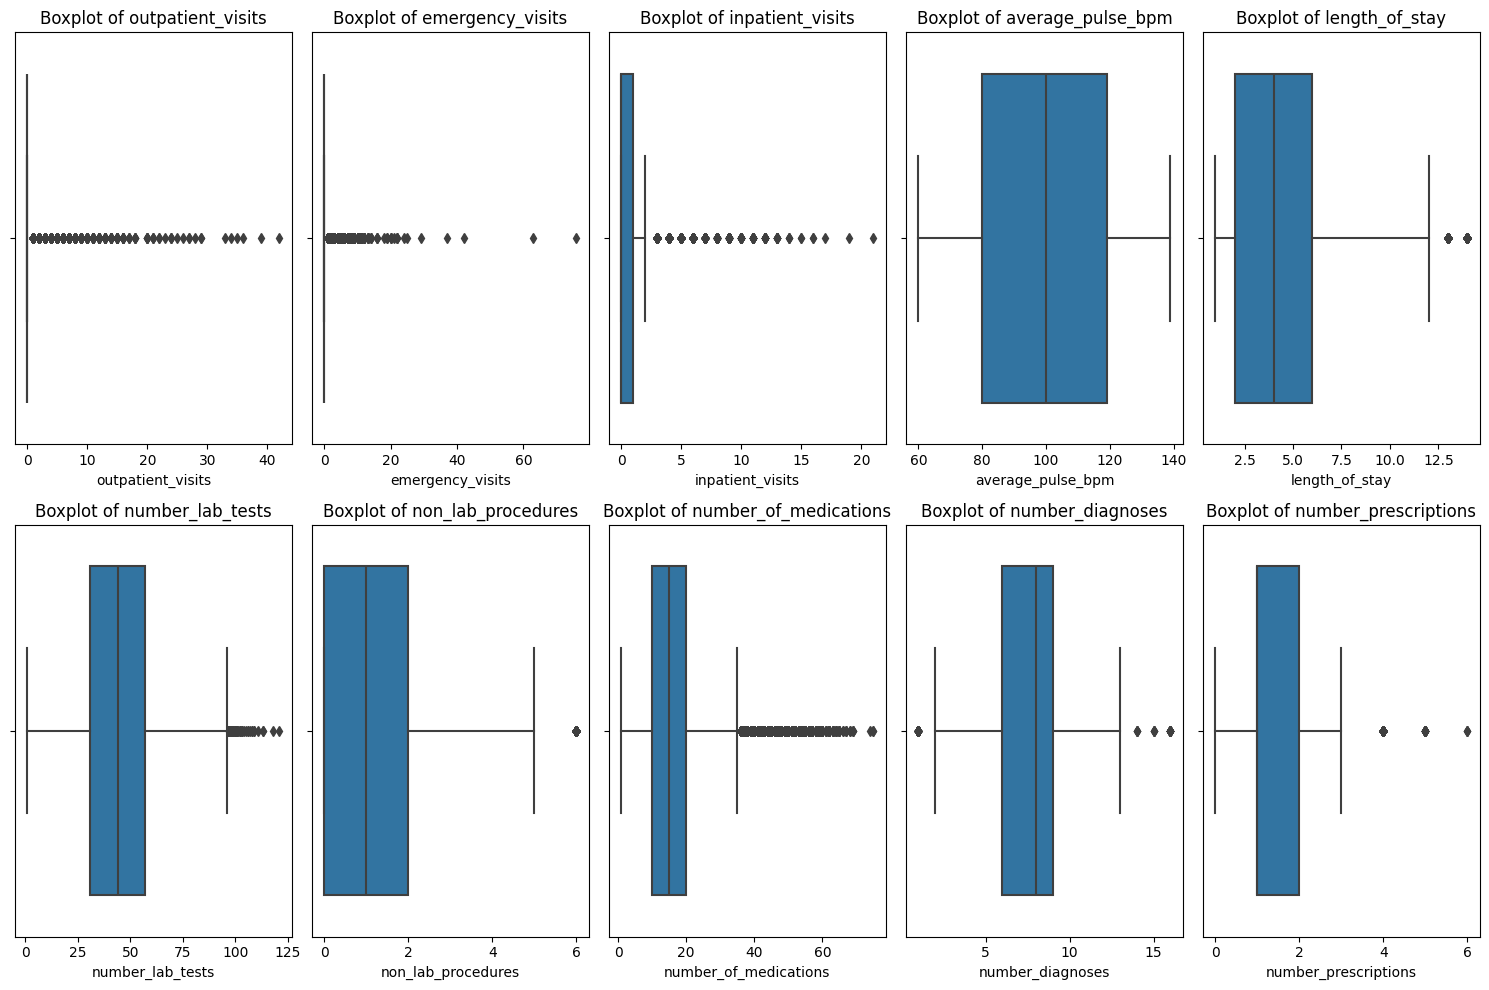

In [106]:
# Determine the number of rows needed for the plot
n_rows = int(np.ceil(len(metric_features) / 5))

# Create a figure and axes objects
fig, axs = plt.subplots(n_rows, 5, figsize=(15, n_rows * 5))

# Flatten the axes array and remove extra subplots
axs = axs.flatten()
for ax in axs[len(metric_features):]:
    fig.delaxes(ax)

# Create a boxplot for each column
for i, feature in enumerate(metric_features):
    sns.boxplot(x=X_train_bin[feature], ax=axs[i])
    axs[i].set_title(f'Boxplot of {feature}')

# Display the plot
plt.tight_layout()
plt.show()

In [107]:
categorical_columns = ['race', 'payer_code', 'admission_type', 'medical_specialty','discharge_disposition', 'admission_source',
                     'primary_diagnosis_types', 'secondary_diagnosis_types', 'additional_diagnosis_types', 'glucose_test_result', 
                     'a1c_test_result', 'is_normal_pulse', 'gender_binary', 'diabetes_meds_binary', 'change_in_meds_binary',
                      'medication']

In [108]:
def TestIndependence(X,y,var,alpha=0.05):        
    dfObserved = pd.crosstab(y,X) 
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)
    if p<alpha:
        result="{0} is IMPORTANT for Prediction".format(var)
    else:
        result="{0} is NOT an important predictor. (Discard {0} from model)".format(var)
    print(result)

In [109]:
for categorical_columns in X_train_bin:
    TestIndependence(X_train_bin[categorical_columns],y_train_bin, categorical_columns)

race is IMPORTANT for Prediction
payer_code is IMPORTANT for Prediction
outpatient_visits is IMPORTANT for Prediction
emergency_visits is IMPORTANT for Prediction
inpatient_visits is IMPORTANT for Prediction
admission_type is IMPORTANT for Prediction
medical_specialty is IMPORTANT for Prediction
average_pulse_bpm is NOT an important predictor. (Discard average_pulse_bpm from model)
discharge_disposition is IMPORTANT for Prediction
admission_source is IMPORTANT for Prediction
length_of_stay is IMPORTANT for Prediction
number_lab_tests is IMPORTANT for Prediction
non_lab_procedures is IMPORTANT for Prediction
number_of_medications is IMPORTANT for Prediction
number_diagnoses is IMPORTANT for Prediction
glucose_test_result is IMPORTANT for Prediction
a1c_test_result is IMPORTANT for Prediction
medication is IMPORTANT for Prediction
number_prescriptions is IMPORTANT for Prediction
Midpoint_Age is IMPORTANT for Prediction
gender_binary is NOT an important predictor. (Discard gender_binary f

In [110]:
for categorical_columns in X_train_bin:
    TestIndependence(X_train_bin[categorical_columns],y_train_bin, categorical_columns, 0.04)

race is IMPORTANT for Prediction
payer_code is IMPORTANT for Prediction
outpatient_visits is IMPORTANT for Prediction
emergency_visits is IMPORTANT for Prediction
inpatient_visits is IMPORTANT for Prediction
admission_type is IMPORTANT for Prediction
medical_specialty is IMPORTANT for Prediction
average_pulse_bpm is NOT an important predictor. (Discard average_pulse_bpm from model)
discharge_disposition is IMPORTANT for Prediction
admission_source is IMPORTANT for Prediction
length_of_stay is IMPORTANT for Prediction
number_lab_tests is IMPORTANT for Prediction
non_lab_procedures is IMPORTANT for Prediction
number_of_medications is IMPORTANT for Prediction
number_diagnoses is IMPORTANT for Prediction
glucose_test_result is NOT an important predictor. (Discard glucose_test_result from model)
a1c_test_result is IMPORTANT for Prediction
medication is IMPORTANT for Prediction
number_prescriptions is IMPORTANT for Prediction
Midpoint_Age is IMPORTANT for Prediction
gender_binary is NOT an i

In [111]:
for categorical_columns in X_train_bin:
    TestIndependence(X_train_bin[categorical_columns],y_train_bin, categorical_columns, 0.03)

race is IMPORTANT for Prediction
payer_code is IMPORTANT for Prediction
outpatient_visits is IMPORTANT for Prediction
emergency_visits is IMPORTANT for Prediction
inpatient_visits is IMPORTANT for Prediction
admission_type is IMPORTANT for Prediction
medical_specialty is IMPORTANT for Prediction
average_pulse_bpm is NOT an important predictor. (Discard average_pulse_bpm from model)
discharge_disposition is IMPORTANT for Prediction
admission_source is IMPORTANT for Prediction
length_of_stay is IMPORTANT for Prediction
number_lab_tests is NOT an important predictor. (Discard number_lab_tests from model)
non_lab_procedures is IMPORTANT for Prediction
number_of_medications is IMPORTANT for Prediction
number_diagnoses is IMPORTANT for Prediction
glucose_test_result is NOT an important predictor. (Discard glucose_test_result from model)
a1c_test_result is IMPORTANT for Prediction
medication is IMPORTANT for Prediction
number_prescriptions is IMPORTANT for Prediction
Midpoint_Age is IMPORTANT

## Encoding categrical variables

In [112]:
enc1 = OrdinalEncoder() 

In [113]:
columns_to_encode = ['race', 'payer_code', 'admission_type', 'medical_specialty','discharge_disposition', 'admission_source',
                     'primary_diagnosis_types', 'secondary_diagnosis_types', 'additional_diagnosis_types', 'glucose_test_result', 
                     'a1c_test_result']

other_columns_train = pd.DataFrame(X_train_bin.drop(columns_to_encode, axis=1))
other_columns_val = pd.DataFrame(X_val_bin.drop(columns_to_encode, axis=1))

In [114]:
# Perform one-hot encoding on the specified columns
train_encoded_1 = pd.get_dummies(X_train_bin[columns_to_encode])
train_encoded_1 = train_encoded_1.astype(int)

X_train_bin_encoded = pd.concat([train_encoded_1, other_columns_train], axis=1)
X_train_bin_encoded

,race_AfricanAmerican,race_Caucasian,race_Other,payer_code_HM,payer_code_MC,payer_code_None,payer_code_Other_code,admission_type_Elective,admission_type_Emergency,admission_type_Other_type,...,non_lab_procedures,number_of_medications,number_diagnoses,medication,number_prescriptions,Midpoint_Age,gender_binary,diabetes_meds_binary,change_in_meds_binary,is_normal_pulse
encounter_id,,,,,,,,,,,,,,,,,,,,,
119133,1,0,0,0,0,0,1,0,0,0,...,0,8,6,1,1,55.0,1,1,0,0
532575,1,0,0,0,0,1,0,0,0,0,...,0,2,2,1,1,15.0,0,1,0,1
909215,0,0,1,0,0,1,0,0,0,1,...,0,19,5,1,2,55.0,1,1,1,1
662753,1,0,0,0,0,0,1,0,1,0,...,1,10,9,0,0,65.0,0,0,0,1
694319,1,0,0,0,0,0,1,1,0,0,...,1,28,2,1,3,45.0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327556,0,1,0,0,0,1,0,0,0,1,...,1,10,6,0,0,75.0,0,0,0,1
998331,0,1,0,0,0,0,1,0,1,0,...,0,16,7,1,3,55.0,1,1,1,0
210258,0,1,0,0,1,0,0,0,1,0,...,1,17,9,0,0,35.0,1,0,0,0


In [115]:
# Perform one-hot encoding on the specified columns
val_encoded_1 = pd.get_dummies(X_val_bin[columns_to_encode])
val_encoded_1 = val_encoded_1.astype(int)

X_val_bin_encoded = pd.concat([val_encoded_1, other_columns_val], axis=1)
X_val_bin_encoded

,race_AfricanAmerican,race_Caucasian,race_Other,payer_code_HM,payer_code_MC,payer_code_None,payer_code_Other_code,admission_type_Elective,admission_type_Emergency,admission_type_Other_type,...,non_lab_procedures,number_of_medications,number_diagnoses,medication,number_prescriptions,Midpoint_Age,gender_binary,diabetes_meds_binary,change_in_meds_binary,is_normal_pulse
encounter_id,,,,,,,,,,,,,,,,,,,,,
274568,0,1,0,0,0,1,0,1,0,0,...,1,20,5,0,0,55.0,0,0,0,1
768397,1,0,0,1,0,0,0,0,1,0,...,0,7,9,1,1,55.0,1,1,0,0
897606,0,1,0,0,0,1,0,0,1,0,...,4,11,9,1,1,45.0,1,1,0,1
827973,1,0,0,0,0,1,0,0,1,0,...,0,11,9,1,1,75.0,0,1,0,0
806134,0,1,0,0,0,1,0,0,0,0,...,4,25,7,1,1,55.0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158462,0,1,0,0,0,1,0,0,1,0,...,0,14,9,1,1,65.0,0,1,1,1
599332,0,1,0,0,1,0,0,0,1,0,...,1,18,5,1,1,85.0,0,1,0,0
432909,0,1,0,0,1,0,0,0,1,0,...,1,16,9,1,1,85.0,0,1,1,1


In [116]:
# X_train_bin_encoded = enc1.fit_transform(categorical_columns_train)
# X_train_bin_encoded = pd.DataFrame(X_train_bin_encoded, columns = categorical_columns_train.columns)
# X_train_bin_encoded.set_index(X_train_bin.index, inplace=True)

# X_train_bin_encoded = pd.concat([X_train_bin_encoded, numerical_columns_train], axis=1)

In [117]:
# X_val_bin_encoded = enc1.transform(categorical_columns_val)
# X_val_bin_encoded = pd.DataFrame(X_val_bin_encoded, columns=enc1.get_feature_names_out(categorical_columns_val.columns))
# X_val_bin_encoded.set_index(X_val_bin.index, inplace=True)

# X_val_bin_encoded = pd.concat([X_val_bin_encoded, numerical_columns_val], axis=1)

In [118]:
# X_val_bin_encoded = enc1.transform(categorical_columns_val)
# X_val_bin_encoded = pd.DataFrame(X_val_bin_encoded, columns = categorical_columns_val.columns)
# X_val_bin_encoded.set_index(X_val_bin.index, inplace=True)

# X_val_bin_encoded = pd.concat([X_val_bin_encoded, numerical_columns_val], axis=1)

## Imputing age

In [119]:
known_age = X_train_bin_encoded[X_train_bin_encoded['Midpoint_Age'].notnull()]
unknown_age = X_train_bin_encoded[X_train_bin_encoded['Midpoint_Age'].isnull()]

# Reset indices
known_age = known_age.reset_index(drop=True)
unknown_age = unknown_age.reset_index(drop=True)

# Create the training data for the model
X = known_age.drop(['Midpoint_Age'], axis=1)
y = known_age['Midpoint_Age']

# Fit the model
regr = RandomForestRegressor(random_state=0, n_estimators=200, n_jobs=-1)
regr.fit(X, y)

# Predict the missing ages
predicted_ages = regr.predict(unknown_age.drop(['Midpoint_Age'], axis=1))

# Fill in the missing values using the original indices
X_train_bin_encoded.loc[X_train_bin_encoded['Midpoint_Age'].isnull(), 'Midpoint_Age'] = predicted_ages

In [120]:
known_age = X_val_bin_encoded[X_val_bin_encoded['Midpoint_Age'].notnull()]
unknown_age = X_val_bin_encoded[X_val_bin_encoded['Midpoint_Age'].isnull()]

# Reset indices
known_age = known_age.reset_index(drop=True)
unknown_age = unknown_age.reset_index(drop=True)

# Predict the missing ages
predicted_ages = regr.predict(unknown_age.drop(['Midpoint_Age'], axis=1))

# Fill in the missing values using the original indices
X_val_bin_encoded.loc[X_val_bin_encoded['Midpoint_Age'].isnull(), 'Midpoint_Age'] = predicted_ages

In [121]:
X_train_bin_encoded.head()

,race_AfricanAmerican,race_Caucasian,race_Other,payer_code_HM,payer_code_MC,payer_code_None,payer_code_Other_code,admission_type_Elective,admission_type_Emergency,admission_type_Other_type,...,non_lab_procedures,number_of_medications,number_diagnoses,medication,number_prescriptions,Midpoint_Age,gender_binary,diabetes_meds_binary,change_in_meds_binary,is_normal_pulse
encounter_id,,,,,,,,,,,,,,,,,,,,,
119133,1,0,0,0,0,0,1,0,0,0,...,0,8,6,1,1,55.0,1,1,0,0
532575,1,0,0,0,0,1,0,0,0,0,...,0,2,2,1,1,15.0,0,1,0,1
909215,0,0,1,0,0,1,0,0,0,1,...,0,19,5,1,2,55.0,1,1,1,1
662753,1,0,0,0,0,0,1,0,1,0,...,1,10,9,0,0,65.0,0,0,0,1
694319,1,0,0,0,0,0,1,1,0,0,...,1,28,2,1,3,45.0,0,1,1,1


In [122]:
X_val_bin_encoded.head()

,race_AfricanAmerican,race_Caucasian,race_Other,payer_code_HM,payer_code_MC,payer_code_None,payer_code_Other_code,admission_type_Elective,admission_type_Emergency,admission_type_Other_type,...,non_lab_procedures,number_of_medications,number_diagnoses,medication,number_prescriptions,Midpoint_Age,gender_binary,diabetes_meds_binary,change_in_meds_binary,is_normal_pulse
encounter_id,,,,,,,,,,,,,,,,,,,,,
274568,0,1,0,0,0,1,0,1,0,0,...,1,20,5,0,0,55.0,0,0,0,1
768397,1,0,0,1,0,0,0,0,1,0,...,0,7,9,1,1,55.0,1,1,0,0
897606,0,1,0,0,0,1,0,0,1,0,...,4,11,9,1,1,45.0,1,1,0,1
827973,1,0,0,0,0,1,0,0,1,0,...,0,11,9,1,1,75.0,0,1,0,0
806134,0,1,0,0,0,1,0,0,0,0,...,4,25,7,1,1,55.0,1,1,0,1


In [123]:
y_train_bin

encounter_id
119133     No
532575     No
909215     No
662753     No
694319     No
         ... 
327556    Yes
998331     No
210258    Yes
875904    Yes
828160     No
Name: readmitted_binary, Length: 53427, dtype: object

In [124]:
y_val_bin

encounter_id
274568     No
768397     No
897606     No
827973     No
806134     No
         ... 
158462     No
599332     No
432909    Yes
289564     No
703184     No
Name: readmitted_binary, Length: 17809, dtype: object

In [125]:
X_train_bin_encoded.columns

Index(['race_AfricanAmerican', 'race_Caucasian', 'race_Other', 'payer_code_HM',
       'payer_code_MC', 'payer_code_None', 'payer_code_Other_code',
       'admission_type_Elective', 'admission_type_Emergency',
       'admission_type_Other_type', 'admission_type_Urgent',
       'medical_specialty_Cardiology', 'medical_specialty_Emergency_Trauma',
       'medical_specialty_Family_GeneralPractice',
       'medical_specialty_InternalMedicine',
       'medical_specialty_Other_specialty', 'medical_specialty_Surgery',
       'discharge_disposition_Discharged_to_home',
       'discharge_disposition_Discharged_transferred_referred_another_this_institution_for_outpatient_services',
       'discharge_disposition_Expired', 'discharge_disposition_Other',
       'discharge_disposition_Transferred_to_another_medical_facility',
       'discharge_disposition_Unknown', 'admission_source_Emergency_Room',
       'admission_source_Other_source', 'admission_source_Physician_Referral',
       'primary_diagno

In [126]:
X_train_bin_encoded['secondary_diagnosis_types_Endocrine_nutritional_and_metabolic_diseases_and_immunity_disorders']

encounter_id
119133    0
532575    0
909215    0
662753    1
694319    1
         ..
327556    0
998331    0
210258    0
875904    0
828160    0
Name: secondary_diagnosis_types_Endocrine_nutritional_and_metabolic_diseases_and_immunity_disorders, Length: 53427, dtype: int32

In [127]:
X_train_bin_encoded['additional_diagnosis_types_Diseases_of_the_genitourinary_system']

encounter_id
119133    0
532575    0
909215    0
662753    1
694319    0
         ..
327556    0
998331    0
210258    0
875904    0
828160    0
Name: additional_diagnosis_types_Diseases_of_the_genitourinary_system, Length: 53427, dtype: int32

In [128]:
X_train_bin_encoded.to_csv('X_train_binary_1.csv', index=True)
X_val_bin_encoded.to_csv('X_val_binary_1.csv', index=True)
y_train_bin.to_csv('y_train_binary_1.csv', index=True)
y_val_bin.to_csv('y_val_binary_1.csv', index=True)

# Chi-square for categorical data

In [108]:
categorical_columns_2 = ['race_AfricanAmerican', 'race_Caucasian', 'race_Other', 'payer_code_HM',
       'payer_code_MC', 'payer_code_None', 'payer_code_Other_code',
       'admission_type_Elective', 'admission_type_Emergency',
       'admission_type_Other_type', 'admission_type_Urgent',
       'medical_specialty_Cardiology', 'medical_specialty_Emergency/Trauma',
       'medical_specialty_Family/GeneralPractice',
       'medical_specialty_InternalMedicine',
       'medical_specialty_Other_specialty', 'medical_specialty_Surgery',
       'discharge_disposition_Discharged to home',
       'discharge_disposition_Expired', 'discharge_disposition_Other',
       'discharge_disposition_Transferred to another medical facility',
       'discharge_disposition_Unknown', 'admission_source_ Emergency Room',
       'admission_source_ Physician Referral', 'admission_source_Other_source',
       'primary_diagnosis_types_Diseases of the circulatory system',
       'primary_diagnosis_types_Diseases of the digestive system',
       'primary_diagnosis_types_Diseases of the respiratory system',
       'primary_diagnosis_types_External causes of injury and supplemental classification',
       'primary_diagnosis_types_Injury and poisoning',
       'primary_diagnosis_types_Other_type',
       'primary_diagnosis_types_Symptoms, signs, and ill-defined conditions',
       'secondary_diagnosis_types_Diseases of the circulatory system',
       'secondary_diagnosis_types_Diseases of the genitourinary system',
       'secondary_diagnosis_types_Diseases of the respiratory system',
       'secondary_diagnosis_types_Endocrine, nutritional and metabolic diseases, and immunity disorders',
       'secondary_diagnosis_types_External causes of injury and supplemental classification',
       'secondary_diagnosis_types_Other_type',
       'additional_diagnosis_types_Diseases of the circulatory system',
       'additional_diagnosis_types_Diseases of the genitourinary system',
       'additional_diagnosis_types_Diseases of the respiratory system',
       'additional_diagnosis_types_Endocrine, nutritional and metabolic diseases, and immunity disorders',
       'additional_diagnosis_types_External causes of injury and supplemental classification',
       'additional_diagnosis_types_Other_type', 'glucose_test_result_>200',
       'glucose_test_result_>300', 'glucose_test_result_None', 'diabetes_meds_binary', 'change_in_meds_binary',
       'glucose_test_result_Norm', 'a1c_test_result_>7', 'a1c_test_result_>8',
       'a1c_test_result_None', 'a1c_test_result_Norm', 'is_normal_pulse', 'medication', 'gender_binary']

In [112]:
len(categorical_columns_2)

57

In [109]:
for categorical_columns2 in X_train_bin_encoded:
    TestIndependence(X_train_bin_encoded[categorical_columns2],y_train_bin, categorical_columns2)

race_AfricanAmerican is NOT an important predictor. (Discard race_AfricanAmerican from model)
race_Caucasian is IMPORTANT for Prediction
race_Other is IMPORTANT for Prediction
payer_code_HM is IMPORTANT for Prediction
payer_code_MC is IMPORTANT for Prediction
payer_code_None is NOT an important predictor. (Discard payer_code_None from model)
payer_code_Other_code is IMPORTANT for Prediction
admission_type_Elective is IMPORTANT for Prediction
admission_type_Emergency is IMPORTANT for Prediction
admission_type_Other_type is NOT an important predictor. (Discard admission_type_Other_type from model)
admission_type_Urgent is NOT an important predictor. (Discard admission_type_Urgent from model)
medical_specialty_Cardiology is IMPORTANT for Prediction
medical_specialty_Emergency/Trauma is NOT an important predictor. (Discard medical_specialty_Emergency/Trauma from model)
medical_specialty_Family/GeneralPractice is NOT an important predictor. (Discard medical_specialty_Family/GeneralPractice 

In [122]:
important_features = ['race_Caucasian','race_Other','payer_code_HM','payer_code_MC','payer_code_Other_code',
                      'admission_type_Elective','admission_type_Emergency','medical_specialty_Cardiology',
                      'medical_specialty_Other_specialty','discharge_disposition_Discharged to home',
                      'discharge_disposition_Expired','discharge_disposition_Other',
                      'discharge_disposition_Transferred to another medical facility','admission_source_ Emergency Room',
                      'admission_source_ Physician Referral','primary_diagnosis_types_External causes of injury and supplemental classification',
                      'primary_diagnosis_types_Injury and poisoning','primary_diagnosis_types_Other_type',
                      'primary_diagnosis_types_Symptoms, signs, and ill-defined conditions',
                      'secondary_diagnosis_types_Endocrine, nutritional and metabolic diseases, and immunity disorders',
                      'secondary_diagnosis_types_External causes of injury and supplemental classification',
                      'secondary_diagnosis_types_Other_type','additional_diagnosis_types_Diseases of the circulatory system',
                      'additional_diagnosis_types_Diseases of the genitourinary system',
                      'additional_diagnosis_types_Endocrine, nutritional and metabolic diseases, and immunity disorders',
                      'additional_diagnosis_types_Other_type','glucose_test_result_None','a1c_test_result_>8',
                      'a1c_test_result_None','a1c_test_result_Norm','medication','diabetes_meds_binary','change_in_meds_binary'
                     ]

In [111]:
len(important_features)

33

# Recursive Feature Selection

In [125]:
scaler = StandardScaler().fit(X_train_bin_encoded)
scaler_X_train = scaler.transform(X_train_bin_encoded)
scaler_X_val = scaler.transform(X_val_bin_encoded)

In [130]:
scaler_X_train

array([[ 2.11136469, -1.6303775 , -0.31475741, ...,  0.54577872,
        -0.92747335, -0.97414877],
       [ 2.11136469, -1.6303775 , -0.31475741, ...,  0.54577872,
        -0.92747335,  1.02653725],
       [-0.47362732, -1.6303775 ,  3.17704992, ...,  0.54577872,
         1.07819809,  1.02653725],
       ...,
       [-0.47362732,  0.61335488, -0.31475741, ..., -1.8322444 ,
        -0.92747335, -0.97414877],
       [ 2.11136469, -1.6303775 , -0.31475741, ...,  0.54577872,
        -0.92747335,  1.02653725],
       [-0.47362732,  0.61335488, -0.31475741, ...,  0.54577872,
         1.07819809, -0.97414877]])

In [136]:
y_train_bin.value_counts(normalize=True)

readmitted_binary
No     0.88839
Yes    0.11161
Name: proportion, dtype: float64

In [137]:
y_train_bin = y_train_bin.map({'Yes': 1, 'No': 0})

In [141]:
y_val_bin = y_val_bin.map({'Yes': 1, 'No': 0})

In [138]:
# Initialize the Logistic Regression classifier
clf = LogisticRegression(random_state=0)

# Define a scorer for the cross-validation
f1_scorer = make_scorer(f1_score)

# Initialize RFE with a step of 1
rfecv = RFECV(estimator=clf, step=1, cv=StratifiedKFold(10), scoring=f1_scorer, verbose=10, n_jobs=-1)

# Fit RFE
rfecv.fit(scaler_X_train, y_train_bin)

Fitting estimator with 68 features.
Fitting estimator with 67 features.
Fitting estimator with 66 features.
Fitting estimator with 65 features.
Fitting estimator with 64 features.
Fitting estimator with 63 features.
Fitting estimator with 62 features.
Fitting estimator with 61 features.
Fitting estimator with 60 features.
Fitting estimator with 59 features.
Fitting estimator with 58 features.
Fitting estimator with 57 features.
Fitting estimator with 56 features.
Fitting estimator with 55 features.
Fitting estimator with 54 features.
Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 fe

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=LogisticRegression(random_state=0), n_jobs=-1,
      scoring=make_scorer(f1_score), verbose=10)

In [142]:
# Optimal number of features
nof = rfecv.n_features_
print("Optimum number of features: %d" % nof)

# Score with optimal number of features
high_score = rfecv.cv_results_['mean_test_score'][nof-1]
print("Score with %d features: %f" % (nof, high_score))

# Features to select
features_to_select = X_train_bin_encoded.columns[rfecv.support_]
print(f"Features to select: \n{features_to_select}")

scaler_rfe = StandardScaler().fit(X_train_bin_encoded[features_to_select])
scaler_X_train_rfe = scaler_rfe.transform(X_train_bin_encoded[features_to_select])
scaler_X_val_rfe = scaler_rfe.transform(X_val_bin_encoded[features_to_select])

# Fit the model on the training data
clf.fit(scaler_X_train_rfe, y_train_bin)

# Predict the target variable for the validation set
y_val_pred = clf.predict(scaler_X_val_rfe)

# Calculate the F1 score for the validation set
f1_val = f1_score(y_val_bin, y_val_pred)

print(f"F1 score on validation set: {f1_val}")

Optimum number of features: 4
Score with 4 features: 0.028457
Features to select: 
Index(['discharge_disposition_Expired', 'discharge_disposition_Other',
       'discharge_disposition_Transferred to another medical facility',
       'inpatient_visits'],
      dtype='object')
F1 score on validation set: 0.028361858190709046


In [146]:
#no of features
nof_list=np.arange(1,20)            
high_score=0
#Variable to store the optimum features
nof=0           
train_score_list =[]
val_score_list = []

for n in range(len(nof_list)):
    model = LogisticRegression()
    
    rfe = RFE(estimator = model,n_features_to_select = nof_list[n])
    X_train_rfe = rfe.fit_transform(scaler_X_train, y_train_bin)
    X_val_rfe = rfe.transform(scaler_X_val)
    model.fit(X_train_rfe,y_train_bin)
    
    #storing results on training data
    train_score = model.score(X_train_rfe,y_train_bin)
    train_score_list.append(train_score)
    
    #storing results on training data
    val_score = model.score(X_val_rfe,y_val_bin)
    val_score_list.append(val_score)
    
    #check best score
    if(val_score >= high_score):
        high_score = val_score
        nof = nof_list[n]
        
        #adding mention of variables to keep
        features_to_select = pd.Series(rfe.support_, index = X_train_bin_encoded.columns)
        
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))
print(f"Features to select: \n{features_to_select}")

Optimum number of features: 2
Score with 2 features: 0.888764
Features to select: 
race_AfricanAmerican     False
race_Caucasian           False
race_Other               False
payer_code_HM            False
payer_code_MC            False
                         ...  
Midpoint_Age             False
gender_binary            False
diabetes_meds_binary     False
change_in_meds_binary    False
is_normal_pulse          False
Length: 68, dtype: bool


In [148]:
features_to_select[features_to_select==True]

discharge_disposition_Expired    True
inpatient_visits                 True
dtype: bool

In [149]:
train_score_list

[0.8883897654743856,
 0.8879967057854643,
 0.8879031201452449,
 0.8877533831208939,
 0.8878844030172011,
 0.8878844030172011,
 0.8877721002489378,
 0.8877721002489378,
 0.8877721002489378,
 0.8879967057854643,
 0.8879779886574204,
 0.8879592715293765,
 0.8879779886574204,
 0.8879967057854643,
 0.8879967057854643,
 0.8879967057854643,
 0.8880154229135081,
 0.8879218372732888,
 0.8878844030172011]

In [150]:
val_score_list

[0.8884271997304733,
 0.8887641080352631,
 0.8885395024987366,
 0.8884271997304733,
 0.8884271997304733,
 0.8884271997304733,
 0.8884271997304733,
 0.888483351114605,
 0.888483351114605,
 0.8887079566511314,
 0.8883710483463417,
 0.8884271997304733,
 0.8883710483463417,
 0.888483351114605,
 0.8885956538828682,
 0.8885395024987366,
 0.8883710483463417,
 0.8885395024987366,
 0.8885395024987366]

# Random Forest

In [151]:
# Initialize the Logistic Regression classifier
clf = RandomForestClassifier(random_state=0)

# Define a scorer for the cross-validation
f1_scorer = make_scorer(f1_score)

# Initialize RFE with a step of 1
rfecv = RFECV(estimator=clf, step=1, cv=StratifiedKFold(10), scoring=f1_scorer, verbose=10, n_jobs=-1)

# Fit RFE
rfecv.fit(scaler_X_train, y_train_bin)

Fitting estimator with 68 features.
Fitting estimator with 67 features.
Fitting estimator with 66 features.
Fitting estimator with 65 features.
Fitting estimator with 64 features.
Fitting estimator with 63 features.
Fitting estimator with 62 features.
Fitting estimator with 61 features.
Fitting estimator with 60 features.
Fitting estimator with 59 features.
Fitting estimator with 58 features.
Fitting estimator with 57 features.
Fitting estimator with 56 features.
Fitting estimator with 55 features.
Fitting estimator with 54 features.
Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 fe

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
      scoring=make_scorer(f1_score), verbose=10)

In [152]:
# Optimal number of features
nof = rfecv.n_features_
print("Optimum number of features: %d" % nof)

# Score with optimal number of features
high_score = rfecv.cv_results_['mean_test_score'][nof-1]
print("Score with %d features: %f" % (nof, high_score))

# Features to select
features_to_select = X_train_bin_encoded.columns[rfecv.support_]
print(f"Features to select: \n{features_to_select}")

scaler_rfe = StandardScaler().fit(X_train_bin_encoded[features_to_select])
scaler_X_train_rfe = scaler_rfe.transform(X_train_bin_encoded[features_to_select])
scaler_X_val_rfe = scaler_rfe.transform(X_val_bin_encoded[features_to_select])

# Fit the model on the training data
clf.fit(scaler_X_train_rfe, y_train_bin)

# Predict the target variable for the validation set
y_val_pred = clf.predict(scaler_X_val_rfe)

# Calculate the F1 score for the validation set
f1_val = f1_score(y_val_bin, y_val_pred)

print(f"F1 score on validation set: {f1_val}")

Optimum number of features: 3
Score with 3 features: 0.056678
Features to select: 
Index(['average_pulse_bpm', 'number_lab_tests', 'number_of_medications'], dtype='object')
F1 score on validation set: 0.05722779635823114
